In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from PIL import Image
import numpy as np
import sys
import os
import csv

# Function to create a list of files, labels, and names
def createFileList(myDir, format='.jpg'):
    fileList = []
    labels = []
    names = []
    for root, dirs, files in os.walk(myDir, topdown=True):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)
                # Infer the class based on the file name
                if name.lower().startswith('healthy'):
                    labels.append('0')
                elif name.lower().startswith('unhealthy'):
                    labels.append('1')
                else:
                    labels.append('-1')  # A placeholder value for files with unknown class
                names.append(name)
    return fileList, labels, names

# Function to reduce the dimensions of the image
def reduce_dimensions(image_path, new_width=100, new_height=100):
    img = Image.open(image_path)
    img = img.resize((new_width, new_height))
    return img

# Directory where the images are located
image_dir = '/content/drive/MyDrive/Rice Seed Dataset'

# Create a list of files, labels, and names
myFileList, labels, names = createFileList(image_dir, '.jpg')

# Loop through each file in the list
i = 0
for file in myFileList:
    print(file)

    # Reduce the dimensions of the image while keeping 3 color channels
    reduced_img = reduce_dimensions(file, new_width=100, new_height=100)

    # Continue with the rest of your code...
    width, height = reduced_img.size
    format = reduced_img.format
    mode = reduced_img.mode

    # Convert to numpy array while keeping 3 channels
    value = np.array(reduced_img).reshape((width, height, 3))

    # Flatten the array and append the label
    value = value.flatten()
    value = np.append(value, labels[i])
    i += 1

    print(value)
    with open("inalproj.csv", 'a') as f:
        writer = csv.writer(f)
        writer.writerow(value)


In [3]:
df=pd.read_csv('Finalproj.csv')

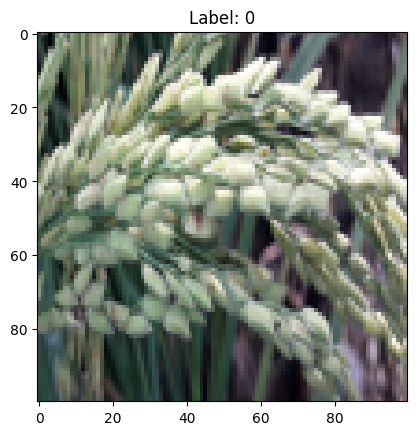

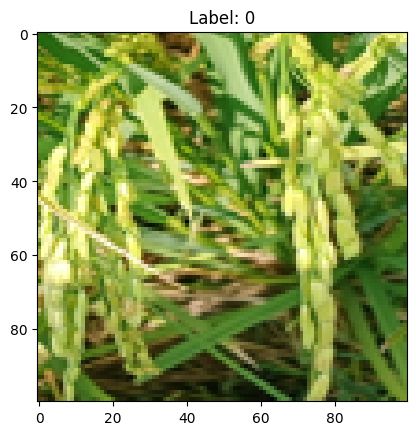

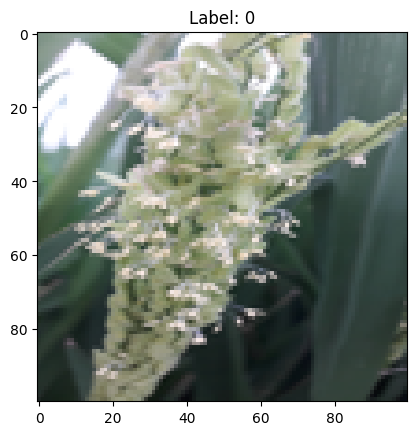

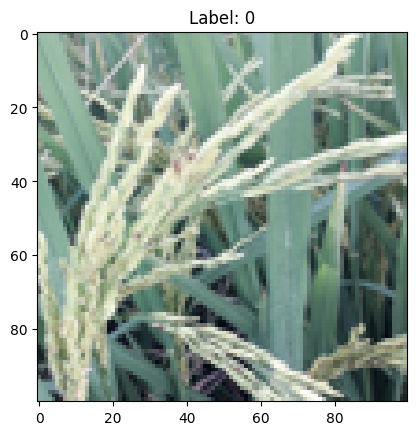

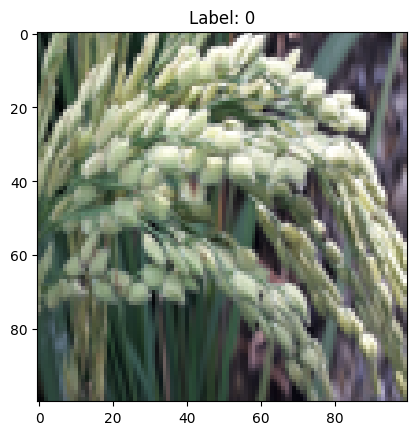

In [4]:
import numpy as np
import csv
from PIL import Image
import matplotlib.pyplot as plt

# Load data from the CSV file
csv_file = 'Finalproj.csv'
data = np.loadtxt(csv_file, delimiter=',')

# Extract image data and labels
images = data[:, :-1]
labels = data[:, -1]

# Choose how many images you want to display
num_images_to_display = 5

# Loop through and display some images
for i in range(num_images_to_display):
    # Reshape the flattened image data to its original shape
    image_shape = (100, 100 , 3)  # Change this based on your image dimensions
    img_data = images[i, :].reshape(image_shape)

    # Convert to PIL image for display
    img = Image.fromarray(img_data.astype(np.uint8))

    # Display the image with its label
    plt.imshow(img, cmap='gray')  # Assuming images are grayscale
    plt.title(f"Label: {int(labels[i])}")
    plt.show()


In [5]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split

# Load data from the CSV file
csv_file = 'Finalproj.csv'
data = np.loadtxt(csv_file, delimiter=',')

# Extract features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

image_shape = (100, 100, 3)
X = X.reshape(-1, *image_shape).astype(np.uint8)

# Reshape y to a column vector if it's a 1D array
y = y.reshape(-1, 1)

# Split the data into training and testing sets
test_size = 0.3  # You can adjust the test size as needed
random_state = 42  # Set a seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Print the shape of the training and testing sets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (679, 100, 100, 3)
y_train shape: (679, 1)
X_test shape: (291, 100, 100, 3)
y_test shape: (291, 1)


In [6]:
BATCH_SIZE = 32
IMG_SIZE = (100,100,3)
IMG_SHAPE = IMG_SIZE +(3,)

In [7]:
class_names= ["healthy" ,"Unhealthy"]

In [8]:
import tensorflow as tf


# Create the ResNet model
resnet = tf.keras.applications.ResNet50(input_shape=(100,100,3),include_top=False,weights='imagenet')

In [9]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# Create a Sequential model and add the ResNet model
model = Sequential()
model.add(resnet)

# Add your custom layers
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(1, activation="sigmoid", name="classification"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 1)                 513       
                                                        

In [11]:
type(model)
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [12]:
nb_layers = len(model.layers)
print("Numbers of Layers =" , nb_layers)
print(model.layers[nb_layers - 2].name)
print(model.layers[nb_layers - 1].name)

Numbers of Layers = 6
dense_1
classification


In [13]:
Rice_Leaf_Model = model

In [14]:
base_learning_rate = 0.04
Rice_Leaf_Model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [15]:
history = Rice_Leaf_Model.fit(X_train,y_train, verbose=2 , epochs=10 , validation_data=(X_test,y_test))

Epoch 1/10


22/22 - 56s - loss: 0.6918 - accuracy: 0.7143 - val_loss: 141683.5312 - val_accuracy: 0.5636 - 56s/epoch - 3s/step
Epoch 2/10
22/22 - 38s - loss: 0.6928 - accuracy: 0.8189 - val_loss: 2333872.5000 - val_accuracy: 0.5636 - 38s/epoch - 2s/step
Epoch 3/10
22/22 - 38s - loss: 0.5087 - accuracy: 0.8395 - val_loss: 56811.0898 - val_accuracy: 0.4364 - 38s/epoch - 2s/step
Epoch 4/10
22/22 - 38s - loss: 0.2819 - accuracy: 0.8910 - val_loss: 626.3031 - val_accuracy: 0.5636 - 38s/epoch - 2s/step
Epoch 5/10
22/22 - 39s - loss: 0.2161 - accuracy: 0.9308 - val_loss: 166.4690 - val_accuracy: 0.5808 - 39s/epoch - 2s/step
Epoch 6/10
22/22 - 41s - loss: 0.1775 - accuracy: 0.9308 - val_loss: 440.9283 - val_accuracy: 0.6392 - 41s/epoch - 2s/step
Epoch 7/10
22/22 - 40s - loss: 0.2620 - accuracy: 0.9043 - val_loss: 2297.1250 - val_accuracy: 0.5361 - 40s/epoch - 2s/step
Epoch 8/10
22/22 - 41s - loss: 0.1878 - accuracy: 0.9485 - val_loss: 338.8529 - val_accuracy: 0.5773 - 41s/epoch - 2s/step
Epoc

In [16]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 5s 469ms/step - loss: 1.7429 - accuracy: 0.7388


[1.742868423461914, 0.738831639289856]

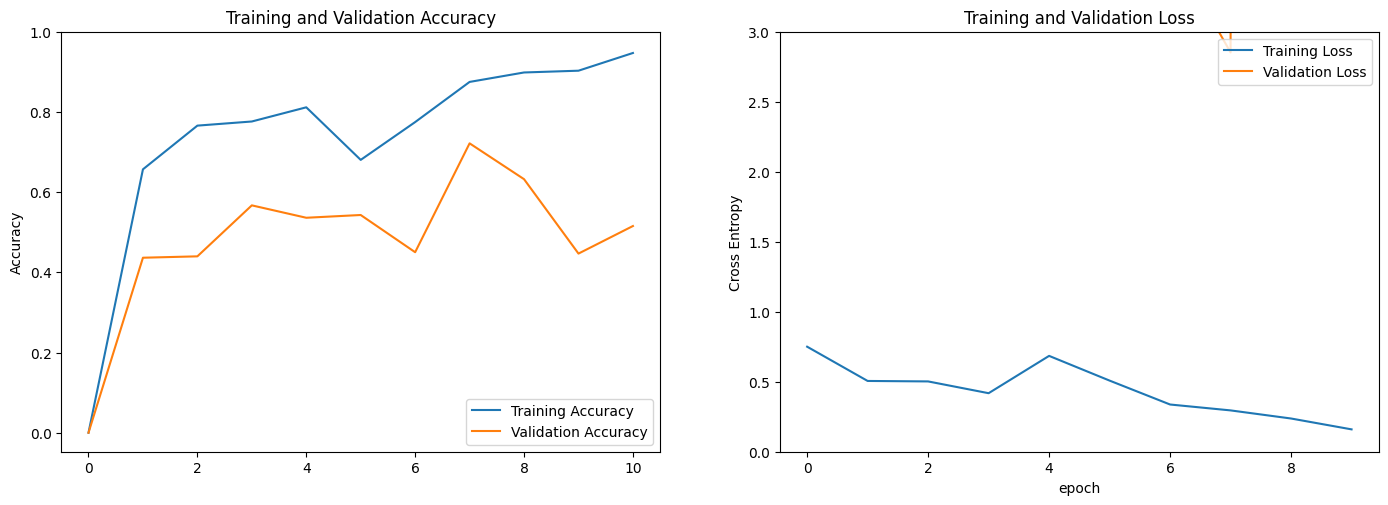

In [17]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

true_labels = y_test
predictions = Rice_Leaf_Model.predict(X_test)
predicted_labels = np.round(predictions)

precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

10/10 [==============================] - 4s 350ms/step
Precision: 0.7948717948717948
Recall: 0.18902439024390244
F1-score: 0.3054187192118227

Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      0.94      0.63       127
         1.0       0.79      0.19      0.31       164

    accuracy                           0.52       291
   macro avg       0.63      0.56      0.47       291
weighted avg       0.65      0.52      0.45       291



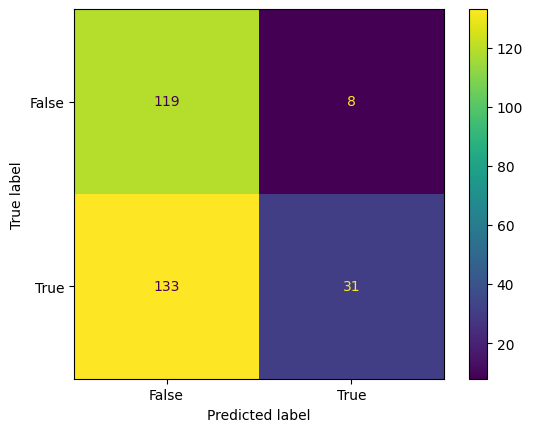

In [19]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

In [17]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input
from keras.callbacks import EarlyStopping
from keras.callbacks import EarlyStopping
from time import time
from sklearn import datasets
%matplotlib inline

In [19]:
def RESNET(optimizer,neurons,batch_size,epochs,activation,patience):
    model = Sequential()
    model.add(resnet)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid' , name="classification"))
    model.compile(optimizer=optimizer, loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor="loss", patience = patience)
    history = model.fit(X_train, y_train, epochs=epochs, callbacks = [early_stopping],batch_size=batch_size,verbose=1)
    return model

In [22]:
RESNET(optimizer='adam',neurons=512,batch_size=32,epochs=10,activation='sigmoid',patience=5)

Epoch 1/10
22/22 [==============================] - 46s 2s/step - loss: 0.3855 - accuracy: 0.8424
Epoch 2/10
22/22 [==============================] - 41s 2s/step - loss: 0.2263 - accuracy: 0.9116
Epoch 3/10
22/22 [==============================] - 42s 2s/step - loss: 0.1974 - accuracy: 0.9264
Epoch 4/10
22/22 [==============================] - 44s 2s/step - loss: 0.1578 - accuracy: 0.9499
Epoch 5/10
22/22 [==============================] - 43s 2s/step - loss: 0.1192 - accuracy: 0.9543
Epoch 6/10
22/22 [==============================] - 41s 2s/step - loss: 0.1208 - accuracy: 0.9720
Epoch 7/10
22/22 [==============================] - 42s 2s/step - loss: 0.0818 - accuracy: 0.9691
Epoch 8/10
22/22 [==============================] - 42s 2s/step - loss: 0.1142 - accuracy: 0.9588
Epoch 9/10
22/22 [==============================] - 40s 2s/step - loss: 0.0667 - accuracy: 0.9764
Epoch 10/10
22/22 [==============================] - 40s 2s/step - loss: 0.1072 - accuracy: 0.9720


In [62]:
resnet_example_model = RESNET(
    optimizer='rmsprop',neurons=64,batch_size=64,epochs=5,activation='relu',patience=13

)

Epoch 1/5
11/11 [==============================] - 36s 2s/step - loss: 0.1233 - accuracy: 0.9573
Epoch 2/5
11/11 [==============================] - 23s 2s/step - loss: 0.0045 - accuracy: 0.9985
Epoch 3/5
11/11 [==============================] - 28s 3s/step - loss: 0.0040 - accuracy: 0.9985
Epoch 4/5
11/11 [==============================] - 32s 3s/step - loss: 0.0359 - accuracy: 0.9897
Epoch 5/5
11/11 [==============================] - 31s 3s/step - loss: 0.0229 - accuracy: 0.9956


In [24]:
resnet_example_model.evaluate(X_test,y_test)

10/10 [==============================] - 7s 505ms/step - loss: 11.4387 - accuracy: 0.6564


[11.438651084899902, 0.6563574075698853]

In [27]:
!pip install scikit-optimize

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [28]:
!pip install scikit-learn
from sklearn.wrappers import KerasClassifier

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


ModuleNotFoundError: No module named 'sklearn.wrappers'

In [29]:
!pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [30]:
from skopt import BayesSearchCV
from time import time
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import xlsxwriter
from xlsxwriter import Workbook


# Assuming you have a function CNN defined for your Keras model

# Define the parameter search space
rf_params = {
    'optimizer': ['adam', 'rmsprop', 'sgd'],
    'activation': ['relu', 'tanh','leaky_relu','sigmoid','softmax'],
    'batch_size': (16,32, 64),  # Adjust based on your preference
    'neurons': (16, 32,64,128,256,512),
    'epochs': (5,),
    'patience': (3, 20)
}

# Create a KerasClassifier instance
clf = KerasClassifier(build_fn=RESNET, verbose=0)

# Create a BayesSearchCV instance
ga1 = BayesSearchCV(
    estimator=clf,
    search_spaces=rf_params,
    scoring="accuracy",
    cv=3,
    verbose=1,
    n_iter=5,  # Number of evaluations
    n_jobs=1
)

results = []

for i in range(10):  # Iterate over different runs
    start = time()
    ga1.fit(X_train, y_train)
    end = time()

    # Calculate precision, recall, and F1 score
    y_pred = ga1.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    result = {
        'Hyperparameters': ga1.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Time taken (s)': end - start,
        'Accuracy':ga1.best_score_
    }
    results.append(result)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Write results to Excel
with pd.ExcelWriter('parameter_search_results1.xlsx') as writer:
    results_df.to_excel(writer, sheet_name='Results1', index=False)


/tmp/ipykernel_3491/3580722868.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=RESNET, verbose=0)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Epoch 1/5
11/11 [==============================] - 18s 1s/step - loss: 0.6575 - accuracy: 0.6701
Epoch 2/5
11/11 [==============================] - 13s 1s/step - loss: 0.5912 - accuracy: 0.8041
Epoch 3/5
11/11 [==============================] - 13s 1s/step - loss: 0.5520 - accuracy: 0.9485
Epoch 4/5
11/11 [==============================] - 13s 1s/step - loss: 0.5142 - accuracy: 0.9013
Epoch 5/5
8/8 [==============================] - 2s 205ms/step
Epoch 1/5
11/11 [==============================] - 16s 1s/step - loss: 0.6446 - accuracy: 0.6112
Epoch 2/5
11/11 [==============================] - 12s 1s/step - loss: 0.5494 - accuracy: 0.7541
Epoch 3/5
11/11 [==============================] - 12s 1s/step - loss: 0.5000 - accuracy: 0.8262
Epoch 4/5
11/11 [==============================] - 12s 1s/step - loss: 0.4654 - accuracy: 0.8498
Epoch 5/5
8/8 [==============================] - 2s 199ms/step
Epoch 1/5
11/11 [======================

In [31]:
import math
print(ga1.best_params_)
print("Accuracy:"+ str(ga1.best_score_))
total = end-start
seconds = int(total % 60)
minutes = int((total//60)%60)
hours = int((total//60)//60)
print('{0}h:{1}m:{2}s'.format(hours, minutes, seconds))

OrderedDict([('activation', 'tanh'), ('batch_size', 16), ('epochs', 5), ('neurons', 32), ('optimizer', 'rmsprop'), ('patience', 10)])
Accuracy:1.0
0h:34m:31s


In [61]:
test_model = RESNET(
    optimizer='rmsprop',
    activation='tanh',
    batch_size=16,
    neurons=32,
    epochs=5,
    patience=10
)

Epoch 1/5
43/43 [==============================] - 53s 1s/step - loss: 0.0922 - accuracy: 0.9558
Epoch 2/5
43/43 [==============================] - 40s 942ms/step - loss: 0.0456 - accuracy: 0.9853
Epoch 3/5
43/43 [==============================] - 38s 884ms/step - loss: 0.0560 - accuracy: 0.9764
Epoch 4/5
43/43 [==============================] - 38s 881ms/step - loss: 0.0192 - accuracy: 0.9956
Epoch 5/5
43/43 [==============================] - 41s 963ms/step - loss: 0.0366 - accuracy: 0.9882


In [54]:
test_model.evaluate(X_test, y_test)

10/10 [==============================] - 3s 214ms/step - loss: 1.1722 - accuracy: 0.8041


[1.172156572341919, 0.8041236996650696]

In [ ]:
test_model.summary()

In [ ]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(17, 12))
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

true_labels = y_test
predictions = model.predict(X_test)
predicted_labels = np.round(predictions)

precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(true_labels, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

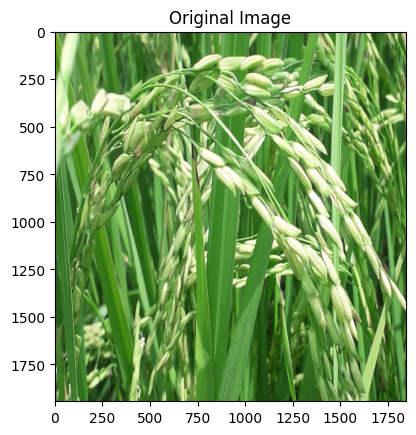

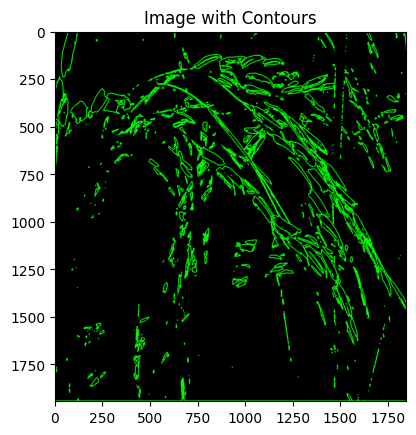

In [145]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image using OpenCV
img_path = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (245).jpg'
img = cv2.imread(img_path)

# Check if the image is loaded successfully
if img is None:
    print("Error: Image not loaded.")
else:
    # Display the original image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply a binary threshold to the image
    _, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Create an empty image to draw the contours
    contour_img = np.zeros_like(img)

    # Draw the contours on the image
    cv2.drawContours(contour_img, contours, -1, (0,255,0), 3)

    # Convert the image to RGB
    contour_img = cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB)

    # Display the image with contours
    plt.imshow(contour_img)
    plt.title('Image with Contours')
    plt.show()

In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf
from skimage.io import imread
from skimage.transform import resize

In [30]:
!pip install lime

1/1 [==============================] - 2s 2s/step
Accuracy of this prediction is 9.841922e-06


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 194ms/step


  1%|          | 10/1000 [00:00<00:28, 35.23it/s]

1/1 [==============================] - 0s 194ms/step


  2%|▏         | 20/1000 [00:00<00:27, 35.96it/s]

1/1 [==============================] - 0s 218ms/step


  3%|▎         | 30/1000 [00:00<00:28, 34.15it/s]

1/1 [==============================] - 0s 197ms/step


  4%|▍         | 40/1000 [00:01<00:27, 34.66it/s]

1/1 [==============================] - 0s 223ms/step


  5%|▌         | 50/1000 [00:01<00:28, 33.18it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 60/1000 [00:01<00:28, 33.28it/s]

1/1 [==============================] - 0s 185ms/step


  7%|▋         | 70/1000 [00:02<00:26, 34.47it/s]

1/1 [==============================] - 0s 192ms/step


  8%|▊         | 80/1000 [00:02<00:25, 35.68it/s]

1/1 [==============================] - 0s 207ms/step


  9%|▉         | 90/1000 [00:02<00:25, 35.24it/s]

1/1 [==============================] - 0s 280ms/step


 10%|█         | 100/1000 [00:02<00:27, 32.32it/s]

1/1 [==============================] - 0s 224ms/step


 11%|█         | 110/1000 [00:03<00:27, 32.64it/s]

1/1 [==============================] - 0s 219ms/step


 12%|█▏        | 120/1000 [00:03<00:27, 32.56it/s]

1/1 [==============================] - 0s 211ms/step


 13%|█▎        | 130/1000 [00:03<00:26, 32.56it/s]

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 140/1000 [00:04<00:26, 32.29it/s]

1/1 [==============================] - 0s 205ms/step


 15%|█▌        | 150/1000 [00:04<00:25, 33.14it/s]

1/1 [==============================] - 0s 206ms/step


 16%|█▌        | 160/1000 [00:04<00:25, 33.48it/s]

1/1 [==============================] - 0s 232ms/step


 17%|█▋        | 170/1000 [00:05<00:25, 32.91it/s]

1/1 [==============================] - 0s 202ms/step


 18%|█▊        | 180/1000 [00:05<00:24, 33.98it/s]

1/1 [==============================] - 0s 216ms/step


 19%|█▉        | 190/1000 [00:05<00:23, 33.88it/s]

1/1 [==============================] - 0s 202ms/step


 20%|██        | 200/1000 [00:06<00:25, 31.51it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██        | 210/1000 [00:06<00:24, 32.90it/s]

1/1 [==============================] - 0s 213ms/step


 22%|██▏       | 220/1000 [00:06<00:23, 32.84it/s]

1/1 [==============================] - 0s 173ms/step


 23%|██▎       | 230/1000 [00:06<00:22, 33.90it/s]

1/1 [==============================] - 0s 205ms/step


 24%|██▍       | 240/1000 [00:07<00:22, 34.45it/s]

1/1 [==============================] - 0s 205ms/step


 25%|██▌       | 250/1000 [00:07<00:21, 34.78it/s]

1/1 [==============================] - 0s 213ms/step


 26%|██▌       | 260/1000 [00:07<00:21, 34.72it/s]

1/1 [==============================] - 0s 229ms/step


 27%|██▋       | 270/1000 [00:08<00:21, 34.07it/s]

1/1 [==============================] - 0s 218ms/step


 28%|██▊       | 280/1000 [00:08<00:21, 33.71it/s]

1/1 [==============================] - 0s 222ms/step


 29%|██▉       | 290/1000 [00:08<00:21, 33.72it/s]

1/1 [==============================] - 0s 196ms/step


 30%|███       | 300/1000 [00:08<00:20, 34.10it/s]

1/1 [==============================] - 0s 196ms/step


 31%|███       | 310/1000 [00:09<00:19, 35.19it/s]

1/1 [==============================] - 0s 188ms/step


 32%|███▏      | 320/1000 [00:09<00:19, 35.74it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 330/1000 [00:09<00:18, 35.41it/s]

1/1 [==============================] - 0s 179ms/step


 34%|███▍      | 340/1000 [00:09<00:18, 36.51it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███▌      | 350/1000 [00:10<00:18, 35.13it/s]

1/1 [==============================] - 0s 216ms/step


 36%|███▌      | 360/1000 [00:10<00:18, 34.00it/s]

1/1 [==============================] - 0s 235ms/step


 37%|███▋      | 370/1000 [00:10<00:19, 32.30it/s]

1/1 [==============================] - 0s 191ms/step


 38%|███▊      | 380/1000 [00:11<00:18, 32.79it/s]

1/1 [==============================] - 0s 196ms/step


 39%|███▉      | 390/1000 [00:11<00:18, 32.96it/s]

1/1 [==============================] - 0s 227ms/step


 40%|████      | 400/1000 [00:11<00:18, 32.37it/s]

1/1 [==============================] - 0s 217ms/step


 41%|████      | 410/1000 [00:12<00:18, 31.52it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████▏     | 420/1000 [00:12<00:18, 31.93it/s]

1/1 [==============================] - 0s 212ms/step


 43%|████▎     | 430/1000 [00:12<00:17, 31.69it/s]

1/1 [==============================] - 0s 225ms/step


 44%|████▍     | 440/1000 [00:13<00:17, 31.42it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▌     | 450/1000 [00:13<00:17, 31.15it/s]

1/1 [==============================] - 0s 205ms/step


 46%|████▌     | 460/1000 [00:13<00:17, 31.66it/s]

1/1 [==============================] - 0s 207ms/step


 47%|████▋     | 470/1000 [00:14<00:16, 32.26it/s]

1/1 [==============================] - 0s 217ms/step


 48%|████▊     | 480/1000 [00:14<00:16, 32.44it/s]

1/1 [==============================] - 0s 194ms/step


 49%|████▉     | 490/1000 [00:14<00:15, 33.61it/s]

1/1 [==============================] - 0s 277ms/step


 50%|█████     | 500/1000 [00:15<00:15, 31.56it/s]

1/1 [==============================] - 0s 228ms/step


 51%|█████     | 510/1000 [00:15<00:15, 31.27it/s]

1/1 [==============================] - 0s 208ms/step


 52%|█████▏    | 520/1000 [00:15<00:15, 31.43it/s]

1/1 [==============================] - 0s 218ms/step


 53%|█████▎    | 530/1000 [00:15<00:14, 32.31it/s]

1/1 [==============================] - 0s 372ms/step


 54%|█████▍    | 540/1000 [00:16<00:16, 28.21it/s]

1/1 [==============================] - 0s 244ms/step


 55%|█████▌    | 550/1000 [00:16<00:15, 28.23it/s]

1/1 [==============================] - 0s 428ms/step


 56%|█████▌    | 560/1000 [00:17<00:18, 23.98it/s]

1/1 [==============================] - 0s 303ms/step


 57%|█████▋    | 570/1000 [00:17<00:17, 24.04it/s]

1/1 [==============================] - 0s 300ms/step


 58%|█████▊    | 580/1000 [00:18<00:17, 23.68it/s]

1/1 [==============================] - 0s 279ms/step


 59%|█████▉    | 590/1000 [00:18<00:17, 23.68it/s]

1/1 [==============================] - 0s 254ms/step


 60%|██████    | 600/1000 [00:18<00:16, 24.72it/s]

1/1 [==============================] - 0s 276ms/step


 61%|██████    | 610/1000 [00:19<00:15, 24.79it/s]

1/1 [==============================] - 0s 269ms/step


 62%|██████▏   | 620/1000 [00:19<00:15, 25.02it/s]

1/1 [==============================] - 0s 280ms/step


 63%|██████▎   | 630/1000 [00:20<00:14, 24.89it/s]

1/1 [==============================] - 0s 304ms/step


 64%|██████▍   | 640/1000 [00:20<00:14, 24.07it/s]

1/1 [==============================] - 0s 285ms/step


 65%|██████▌   | 650/1000 [00:21<00:14, 23.98it/s]

1/1 [==============================] - 0s 358ms/step


 66%|██████▌   | 660/1000 [00:21<00:14, 22.92it/s]

1/1 [==============================] - 0s 291ms/step


 67%|██████▋   | 670/1000 [00:21<00:14, 22.65it/s]

1/1 [==============================] - 0s 304ms/step


 68%|██████▊   | 680/1000 [00:22<00:14, 22.67it/s]

1/1 [==============================] - 0s 265ms/step


 69%|██████▉   | 690/1000 [00:22<00:13, 23.43it/s]

1/1 [==============================] - 0s 290ms/step


 70%|███████   | 700/1000 [00:23<00:12, 24.16it/s]

1/1 [==============================] - 0s 254ms/step


 71%|███████   | 710/1000 [00:23<00:11, 24.61it/s]

1/1 [==============================] - 0s 227ms/step


 72%|███████▏  | 720/1000 [00:23<00:10, 25.86it/s]

1/1 [==============================] - 0s 282ms/step


 73%|███████▎  | 730/1000 [00:24<00:10, 25.67it/s]

1/1 [==============================] - 0s 242ms/step


 74%|███████▍  | 740/1000 [00:24<00:10, 25.65it/s]

1/1 [==============================] - 0s 245ms/step


 75%|███████▌  | 750/1000 [00:25<00:09, 26.32it/s]

1/1 [==============================] - 0s 259ms/step


 76%|███████▌  | 760/1000 [00:25<00:09, 26.20it/s]

1/1 [==============================] - 0s 259ms/step


 77%|███████▋  | 770/1000 [00:25<00:08, 25.81it/s]

1/1 [==============================] - 0s 237ms/step


 78%|███████▊  | 780/1000 [00:26<00:08, 26.15it/s]

1/1 [==============================] - 0s 296ms/step


 79%|███████▉  | 790/1000 [00:26<00:08, 25.23it/s]

1/1 [==============================] - 0s 325ms/step


 80%|████████  | 800/1000 [00:27<00:08, 23.81it/s]

1/1 [==============================] - 0s 311ms/step


 81%|████████  | 810/1000 [00:27<00:08, 22.62it/s]

1/1 [==============================] - 0s 313ms/step


 82%|████████▏ | 820/1000 [00:28<00:08, 22.09it/s]

1/1 [==============================] - 0s 340ms/step


 83%|████████▎ | 830/1000 [00:28<00:08, 21.04it/s]

1/1 [==============================] - 0s 275ms/step


 84%|████████▍ | 840/1000 [00:29<00:07, 21.44it/s]

1/1 [==============================] - 0s 264ms/step


 85%|████████▌ | 850/1000 [00:29<00:06, 22.36it/s]

1/1 [==============================] - 0s 290ms/step


 86%|████████▌ | 860/1000 [00:29<00:06, 22.07it/s]

1/1 [==============================] - 0s 262ms/step


 87%|████████▋ | 870/1000 [00:30<00:05, 22.64it/s]

1/1 [==============================] - 0s 262ms/step


 88%|████████▊ | 880/1000 [00:30<00:05, 23.35it/s]

1/1 [==============================] - 0s 314ms/step


 89%|████████▉ | 890/1000 [00:31<00:04, 22.62it/s]

1/1 [==============================] - 0s 386ms/step


 90%|█████████ | 900/1000 [00:31<00:04, 21.12it/s]

1/1 [==============================] - 0s 287ms/step


 91%|█████████ | 910/1000 [00:32<00:04, 21.55it/s]

1/1 [==============================] - 0s 291ms/step


 92%|█████████▏| 920/1000 [00:32<00:03, 22.14it/s]

1/1 [==============================] - 0s 333ms/step


 93%|█████████▎| 930/1000 [00:33<00:03, 21.83it/s]

1/1 [==============================] - 0s 278ms/step


 94%|█████████▍| 940/1000 [00:33<00:02, 22.63it/s]

1/1 [==============================] - 0s 287ms/step


 95%|█████████▌| 950/1000 [00:33<00:02, 23.13it/s]

1/1 [==============================] - 0s 306ms/step


 96%|█████████▌| 960/1000 [00:34<00:01, 23.10it/s]

1/1 [==============================] - 0s 321ms/step


 97%|█████████▋| 970/1000 [00:34<00:01, 22.59it/s]

1/1 [==============================] - 0s 254ms/step


 98%|█████████▊| 980/1000 [00:35<00:00, 23.41it/s]

1/1 [==============================] - 0s 230ms/step


 99%|█████████▉| 990/1000 [00:35<00:00, 24.73it/s]

1/1 [==============================] - 0s 224ms/step


100%|██████████| 1000/1000 [00:35<00:00, 27.86it/s]


(-0.5, 99.5, 99.5, -0.5)

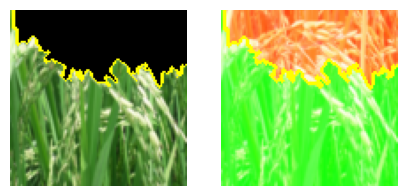

In [63]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (201).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 94ms/step
Accuracy of this prediction is 9.897786e-06


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 188ms/step


  1%|          | 10/1000 [00:00<00:24, 40.06it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 20/1000 [00:00<00:26, 37.36it/s]

1/1 [==============================] - 0s 205ms/step


  3%|▎         | 30/1000 [00:00<00:26, 35.96it/s]

1/1 [==============================] - 0s 187ms/step


  4%|▍         | 40/1000 [00:01<00:26, 35.79it/s]

1/1 [==============================] - 0s 189ms/step


  5%|▌         | 50/1000 [00:01<00:25, 36.63it/s]

1/1 [==============================] - 0s 203ms/step


  6%|▌         | 60/1000 [00:01<00:26, 35.40it/s]

1/1 [==============================] - 0s 220ms/step


  7%|▋         | 70/1000 [00:01<00:27, 34.27it/s]

1/1 [==============================] - 0s 205ms/step


  8%|▊         | 80/1000 [00:02<00:26, 34.14it/s]

1/1 [==============================] - 0s 217ms/step


  9%|▉         | 90/1000 [00:02<00:26, 33.89it/s]

1/1 [==============================] - 0s 226ms/step


 10%|█         | 100/1000 [00:02<00:27, 33.05it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 110/1000 [00:03<00:26, 33.55it/s]

1/1 [==============================] - 0s 218ms/step


 12%|█▏        | 120/1000 [00:03<00:26, 33.38it/s]

1/1 [==============================] - 0s 201ms/step


 13%|█▎        | 130/1000 [00:03<00:26, 33.36it/s]

1/1 [==============================] - 0s 211ms/step


 14%|█▍        | 140/1000 [00:04<00:25, 33.71it/s]

1/1 [==============================] - 0s 185ms/step


 15%|█▌        | 150/1000 [00:04<00:24, 35.00it/s]

1/1 [==============================] - 0s 197ms/step


 16%|█▌        | 160/1000 [00:04<00:24, 34.32it/s]

1/1 [==============================] - 0s 204ms/step


 17%|█▋        | 170/1000 [00:04<00:24, 34.20it/s]

1/1 [==============================] - 0s 206ms/step


 18%|█▊        | 180/1000 [00:05<00:24, 33.97it/s]

1/1 [==============================] - 0s 227ms/step


 19%|█▉        | 190/1000 [00:05<00:24, 33.61it/s]

1/1 [==============================] - 0s 209ms/step


 20%|██        | 200/1000 [00:05<00:23, 33.53it/s]

1/1 [==============================] - 0s 217ms/step


 21%|██        | 210/1000 [00:06<00:23, 33.13it/s]

1/1 [==============================] - 0s 219ms/step


 22%|██▏       | 220/1000 [00:06<00:23, 32.76it/s]

1/1 [==============================] - 0s 210ms/step


 23%|██▎       | 230/1000 [00:06<00:23, 33.08it/s]

1/1 [==============================] - 0s 210ms/step


 24%|██▍       | 240/1000 [00:07<00:22, 33.51it/s]

1/1 [==============================] - 0s 181ms/step


 25%|██▌       | 250/1000 [00:07<00:21, 35.25it/s]

1/1 [==============================] - 0s 225ms/step


 26%|██▌       | 260/1000 [00:07<00:21, 35.18it/s]

1/1 [==============================] - 0s 196ms/step


 27%|██▋       | 270/1000 [00:07<00:21, 34.68it/s]

1/1 [==============================] - 0s 207ms/step


 28%|██▊       | 280/1000 [00:08<00:20, 34.40it/s]

1/1 [==============================] - 0s 199ms/step


 29%|██▉       | 290/1000 [00:08<00:20, 34.05it/s]

1/1 [==============================] - 0s 208ms/step


 30%|███       | 300/1000 [00:08<00:20, 33.84it/s]

1/1 [==============================] - 0s 197ms/step


 31%|███       | 310/1000 [00:09<00:20, 33.85it/s]

1/1 [==============================] - 0s 193ms/step


 32%|███▏      | 320/1000 [00:09<00:19, 34.29it/s]

1/1 [==============================] - 0s 204ms/step


 33%|███▎      | 330/1000 [00:09<00:19, 33.81it/s]

1/1 [==============================] - 0s 208ms/step


 34%|███▍      | 340/1000 [00:09<00:19, 33.57it/s]

1/1 [==============================] - 0s 198ms/step


 35%|███▌      | 350/1000 [00:10<00:19, 34.20it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▌      | 360/1000 [00:10<00:18, 34.52it/s]

1/1 [==============================] - 0s 202ms/step


 37%|███▋      | 370/1000 [00:10<00:18, 34.28it/s]

1/1 [==============================] - 0s 202ms/step


 38%|███▊      | 380/1000 [00:11<00:17, 34.56it/s]

1/1 [==============================] - 0s 177ms/step


 39%|███▉      | 390/1000 [00:11<00:17, 35.51it/s]

1/1 [==============================] - 0s 202ms/step


 40%|████      | 400/1000 [00:11<00:17, 35.28it/s]

1/1 [==============================] - 0s 206ms/step


 41%|████      | 410/1000 [00:11<00:17, 34.25it/s]

1/1 [==============================] - 0s 198ms/step


 42%|████▏     | 420/1000 [00:12<00:16, 34.53it/s]

1/1 [==============================] - 0s 196ms/step


 43%|████▎     | 430/1000 [00:12<00:16, 34.87it/s]

1/1 [==============================] - 0s 217ms/step


 44%|████▍     | 440/1000 [00:12<00:16, 34.04it/s]

1/1 [==============================] - 0s 207ms/step


 45%|████▌     | 450/1000 [00:13<00:16, 33.76it/s]

1/1 [==============================] - 0s 194ms/step


 46%|████▌     | 460/1000 [00:13<00:15, 34.39it/s]

1/1 [==============================] - 0s 209ms/step


 47%|████▋     | 470/1000 [00:13<00:15, 34.14it/s]

1/1 [==============================] - 0s 194ms/step


 48%|████▊     | 480/1000 [00:14<00:15, 34.28it/s]

1/1 [==============================] - 0s 197ms/step


 49%|████▉     | 490/1000 [00:14<00:14, 34.43it/s]

1/1 [==============================] - 0s 214ms/step


 50%|█████     | 500/1000 [00:14<00:14, 34.43it/s]

1/1 [==============================] - 0s 202ms/step


 51%|█████     | 510/1000 [00:14<00:14, 34.46it/s]

1/1 [==============================] - 0s 184ms/step


 52%|█████▏    | 520/1000 [00:15<00:13, 34.75it/s]

1/1 [==============================] - 0s 206ms/step


 53%|█████▎    | 530/1000 [00:15<00:13, 34.51it/s]

1/1 [==============================] - 0s 211ms/step


 54%|█████▍    | 540/1000 [00:15<00:13, 34.25it/s]

1/1 [==============================] - 0s 213ms/step


 55%|█████▌    | 550/1000 [00:16<00:13, 33.74it/s]

1/1 [==============================] - 0s 195ms/step


 56%|█████▌    | 560/1000 [00:16<00:12, 33.98it/s]

1/1 [==============================] - 0s 211ms/step


 57%|█████▋    | 570/1000 [00:16<00:12, 34.16it/s]

1/1 [==============================] - 0s 217ms/step


 58%|█████▊    | 580/1000 [00:16<00:12, 33.74it/s]

1/1 [==============================] - 0s 215ms/step


 59%|█████▉    | 590/1000 [00:17<00:12, 34.08it/s]

1/1 [==============================] - 0s 220ms/step


 60%|██████    | 600/1000 [00:17<00:11, 33.71it/s]

1/1 [==============================] - 0s 200ms/step


 61%|██████    | 610/1000 [00:17<00:11, 33.37it/s]

1/1 [==============================] - 0s 197ms/step


 62%|██████▏   | 620/1000 [00:18<00:11, 33.46it/s]

1/1 [==============================] - 0s 193ms/step


 63%|██████▎   | 630/1000 [00:18<00:10, 34.02it/s]

1/1 [==============================] - 0s 224ms/step


 64%|██████▍   | 640/1000 [00:18<00:10, 33.23it/s]

1/1 [==============================] - 0s 184ms/step


 65%|██████▌   | 650/1000 [00:18<00:10, 34.71it/s]

1/1 [==============================] - 0s 200ms/step


 66%|██████▌   | 660/1000 [00:19<00:09, 34.61it/s]

1/1 [==============================] - 0s 225ms/step


 67%|██████▋   | 670/1000 [00:19<00:09, 33.96it/s]

1/1 [==============================] - 0s 214ms/step


 68%|██████▊   | 680/1000 [00:19<00:09, 33.47it/s]

1/1 [==============================] - 0s 194ms/step


 69%|██████▉   | 690/1000 [00:20<00:09, 33.94it/s]

1/1 [==============================] - 0s 216ms/step


 70%|███████   | 700/1000 [00:20<00:09, 32.69it/s]

1/1 [==============================] - 0s 205ms/step


 71%|███████   | 710/1000 [00:20<00:08, 32.75it/s]

1/1 [==============================] - 0s 206ms/step


 72%|███████▏  | 720/1000 [00:21<00:08, 33.32it/s]

1/1 [==============================] - 0s 210ms/step


 73%|███████▎  | 730/1000 [00:21<00:08, 33.63it/s]

1/1 [==============================] - 0s 190ms/step


 74%|███████▍  | 740/1000 [00:21<00:07, 34.92it/s]

1/1 [==============================] - 0s 221ms/step


 75%|███████▌  | 750/1000 [00:21<00:07, 33.42it/s]

1/1 [==============================] - 0s 231ms/step


 76%|███████▌  | 760/1000 [00:22<00:07, 32.45it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 770/1000 [00:22<00:07, 32.82it/s]

1/1 [==============================] - 0s 217ms/step


 78%|███████▊  | 780/1000 [00:22<00:06, 33.26it/s]

1/1 [==============================] - 0s 227ms/step


 79%|███████▉  | 790/1000 [00:23<00:06, 32.62it/s]

1/1 [==============================] - 0s 220ms/step


 80%|████████  | 800/1000 [00:23<00:06, 32.68it/s]

1/1 [==============================] - 0s 220ms/step


 81%|████████  | 810/1000 [00:23<00:05, 32.48it/s]

1/1 [==============================] - 0s 221ms/step


 82%|████████▏ | 820/1000 [00:24<00:05, 32.09it/s]

1/1 [==============================] - 0s 227ms/step


 83%|████████▎ | 830/1000 [00:24<00:05, 31.51it/s]

1/1 [==============================] - 0s 214ms/step


 84%|████████▍ | 840/1000 [00:24<00:05, 31.79it/s]

1/1 [==============================] - 0s 213ms/step


 85%|████████▌ | 850/1000 [00:25<00:04, 32.72it/s]

1/1 [==============================] - 0s 210ms/step


 86%|████████▌ | 860/1000 [00:25<00:04, 33.08it/s]

1/1 [==============================] - 0s 251ms/step


 87%|████████▋ | 870/1000 [00:25<00:03, 32.56it/s]

1/1 [==============================] - 0s 192ms/step


 88%|████████▊ | 880/1000 [00:25<00:03, 32.85it/s]

1/1 [==============================] - 0s 197ms/step


 89%|████████▉ | 890/1000 [00:26<00:03, 32.68it/s]

1/1 [==============================] - 0s 236ms/step


 90%|█████████ | 900/1000 [00:26<00:03, 32.99it/s]

1/1 [==============================] - 0s 214ms/step


 91%|█████████ | 910/1000 [00:26<00:02, 33.59it/s]

1/1 [==============================] - 0s 221ms/step


 92%|█████████▏| 920/1000 [00:27<00:02, 32.91it/s]

1/1 [==============================] - 0s 223ms/step


 93%|█████████▎| 930/1000 [00:27<00:02, 33.00it/s]

1/1 [==============================] - 0s 249ms/step


 94%|█████████▍| 940/1000 [00:27<00:01, 31.37it/s]

1/1 [==============================] - 0s 236ms/step


 95%|█████████▌| 950/1000 [00:28<00:01, 31.56it/s]

1/1 [==============================] - 0s 217ms/step


 96%|█████████▌| 960/1000 [00:28<00:01, 31.98it/s]

1/1 [==============================] - 0s 188ms/step


 97%|█████████▋| 970/1000 [00:28<00:00, 32.72it/s]

1/1 [==============================] - 0s 220ms/step


 98%|█████████▊| 980/1000 [00:29<00:00, 32.00it/s]

1/1 [==============================] - 0s 213ms/step


 99%|█████████▉| 990/1000 [00:29<00:00, 32.74it/s]

1/1 [==============================] - 0s 217ms/step


100%|██████████| 1000/1000 [00:29<00:00, 33.69it/s]


(-0.5, 99.5, 99.5, -0.5)

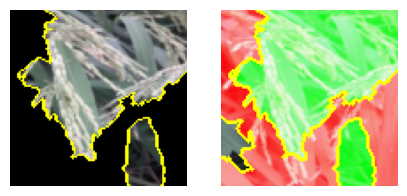

In [64]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (225).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 141ms/step
Accuracy of this prediction is 9.894351e-06


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 175ms/step


  1%|          | 10/1000 [00:00<00:26, 37.60it/s]

1/1 [==============================] - 0s 217ms/step


  2%|▏         | 20/1000 [00:00<00:26, 36.40it/s]

1/1 [==============================] - 0s 220ms/step


  3%|▎         | 30/1000 [00:00<00:27, 35.06it/s]

1/1 [==============================] - 0s 282ms/step


  4%|▍         | 40/1000 [00:01<00:31, 30.91it/s]

1/1 [==============================] - 0s 218ms/step


  5%|▌         | 50/1000 [00:01<00:30, 31.30it/s]

1/1 [==============================] - 0s 213ms/step


  6%|▌         | 60/1000 [00:01<00:29, 31.90it/s]

1/1 [==============================] - 0s 207ms/step


  7%|▋         | 70/1000 [00:02<00:28, 32.31it/s]

1/1 [==============================] - 0s 178ms/step


  8%|▊         | 80/1000 [00:02<00:27, 33.63it/s]

1/1 [==============================] - 0s 225ms/step


  9%|▉         | 90/1000 [00:02<00:27, 32.61it/s]

1/1 [==============================] - 0s 199ms/step


 10%|█         | 100/1000 [00:03<00:27, 33.09it/s]

1/1 [==============================] - 0s 203ms/step


 11%|█         | 110/1000 [00:03<00:26, 33.24it/s]

1/1 [==============================] - 0s 203ms/step


 12%|█▏        | 120/1000 [00:03<00:26, 33.34it/s]

1/1 [==============================] - 0s 212ms/step


 13%|█▎        | 130/1000 [00:03<00:25, 33.58it/s]

1/1 [==============================] - 0s 211ms/step


 14%|█▍        | 140/1000 [00:04<00:25, 33.53it/s]

1/1 [==============================] - 0s 200ms/step


 15%|█▌        | 150/1000 [00:04<00:25, 33.72it/s]

1/1 [==============================] - 0s 210ms/step


 16%|█▌        | 160/1000 [00:04<00:24, 34.31it/s]

1/1 [==============================] - 0s 218ms/step


 17%|█▋        | 170/1000 [00:05<00:24, 33.70it/s]

1/1 [==============================] - 0s 193ms/step


 18%|█▊        | 180/1000 [00:05<00:24, 33.63it/s]

1/1 [==============================] - 0s 187ms/step


 19%|█▉        | 190/1000 [00:05<00:23, 34.60it/s]

1/1 [==============================] - 0s 206ms/step


 20%|██        | 200/1000 [00:05<00:23, 34.21it/s]

1/1 [==============================] - 0s 229ms/step


 21%|██        | 210/1000 [00:06<00:24, 32.83it/s]

1/1 [==============================] - 0s 194ms/step


 22%|██▏       | 220/1000 [00:06<00:23, 33.30it/s]

1/1 [==============================] - 0s 205ms/step


 23%|██▎       | 230/1000 [00:06<00:22, 33.61it/s]

1/1 [==============================] - 0s 203ms/step


 24%|██▍       | 240/1000 [00:07<00:22, 33.79it/s]

1/1 [==============================] - 0s 206ms/step


 25%|██▌       | 250/1000 [00:07<00:22, 33.93it/s]

1/1 [==============================] - 0s 207ms/step


 26%|██▌       | 260/1000 [00:07<00:22, 33.59it/s]

1/1 [==============================] - 0s 211ms/step


 27%|██▋       | 270/1000 [00:08<00:21, 33.37it/s]

1/1 [==============================] - 0s 204ms/step


 28%|██▊       | 280/1000 [00:08<00:21, 33.45it/s]

1/1 [==============================] - 0s 191ms/step


 29%|██▉       | 290/1000 [00:08<00:20, 34.20it/s]

1/1 [==============================] - 0s 209ms/step


 30%|███       | 300/1000 [00:08<00:20, 34.07it/s]

1/1 [==============================] - 0s 206ms/step


 31%|███       | 310/1000 [00:09<00:20, 33.94it/s]

1/1 [==============================] - 0s 204ms/step


 32%|███▏      | 320/1000 [00:09<00:20, 33.64it/s]

1/1 [==============================] - 0s 223ms/step


 33%|███▎      | 330/1000 [00:09<00:19, 34.07it/s]

1/1 [==============================] - 0s 202ms/step


 34%|███▍      | 340/1000 [00:10<00:19, 34.04it/s]

1/1 [==============================] - 0s 212ms/step


 35%|███▌      | 350/1000 [00:10<00:19, 33.86it/s]

1/1 [==============================] - 0s 218ms/step


 36%|███▌      | 360/1000 [00:10<00:19, 33.40it/s]

1/1 [==============================] - 0s 205ms/step


 37%|███▋      | 370/1000 [00:11<00:18, 33.28it/s]

1/1 [==============================] - 0s 199ms/step


 38%|███▊      | 380/1000 [00:11<00:18, 33.54it/s]

1/1 [==============================] - 0s 207ms/step


 39%|███▉      | 390/1000 [00:11<00:18, 33.44it/s]

1/1 [==============================] - 0s 228ms/step


 40%|████      | 400/1000 [00:11<00:18, 32.88it/s]

1/1 [==============================] - 0s 218ms/step


 41%|████      | 410/1000 [00:12<00:17, 32.86it/s]

1/1 [==============================] - 0s 233ms/step


 42%|████▏     | 420/1000 [00:12<00:17, 32.24it/s]

1/1 [==============================] - 0s 223ms/step


 43%|████▎     | 430/1000 [00:12<00:17, 32.13it/s]

1/1 [==============================] - 0s 187ms/step


 44%|████▍     | 440/1000 [00:13<00:17, 32.60it/s]

1/1 [==============================] - 0s 221ms/step


 45%|████▌     | 450/1000 [00:13<00:17, 32.11it/s]

1/1 [==============================] - 0s 216ms/step


 46%|████▌     | 460/1000 [00:13<00:17, 31.30it/s]

1/1 [==============================] - 0s 210ms/step


 47%|████▋     | 470/1000 [00:14<00:16, 31.39it/s]

1/1 [==============================] - 0s 226ms/step


 48%|████▊     | 480/1000 [00:14<00:16, 30.79it/s]

1/1 [==============================] - 0s 226ms/step


 49%|████▉     | 490/1000 [00:14<00:16, 30.49it/s]

1/1 [==============================] - 0s 234ms/step


 50%|█████     | 500/1000 [00:15<00:16, 30.10it/s]

1/1 [==============================] - 0s 214ms/step


 51%|█████     | 510/1000 [00:15<00:16, 30.34it/s]

1/1 [==============================] - 0s 266ms/step


 52%|█████▏    | 520/1000 [00:15<00:16, 29.15it/s]

1/1 [==============================] - 0s 289ms/step


 53%|█████▎    | 530/1000 [00:16<00:17, 27.07it/s]

1/1 [==============================] - 0s 308ms/step


 54%|█████▍    | 540/1000 [00:16<00:18, 25.30it/s]

1/1 [==============================] - 0s 307ms/step


 55%|█████▌    | 550/1000 [00:17<00:18, 24.31it/s]

1/1 [==============================] - 0s 370ms/step


 56%|█████▌    | 560/1000 [00:17<00:19, 22.62it/s]

1/1 [==============================] - 0s 306ms/step


 57%|█████▋    | 570/1000 [00:18<00:19, 22.00it/s]

1/1 [==============================] - 0s 244ms/step


 58%|█████▊    | 580/1000 [00:18<00:18, 22.99it/s]

1/1 [==============================] - 0s 236ms/step


 59%|█████▉    | 590/1000 [00:18<00:16, 24.34it/s]

1/1 [==============================] - 0s 218ms/step


 60%|██████    | 600/1000 [00:19<00:15, 26.01it/s]

1/1 [==============================] - 0s 241ms/step


 61%|██████    | 610/1000 [00:19<00:14, 26.66it/s]

1/1 [==============================] - 0s 241ms/step


 62%|██████▏   | 620/1000 [00:20<00:14, 26.43it/s]

1/1 [==============================] - 0s 239ms/step


 63%|██████▎   | 630/1000 [00:20<00:13, 26.71it/s]

1/1 [==============================] - 0s 225ms/step


 64%|██████▍   | 640/1000 [00:20<00:13, 27.61it/s]

1/1 [==============================] - 0s 232ms/step


 65%|██████▌   | 650/1000 [00:21<00:12, 28.13it/s]

1/1 [==============================] - 0s 229ms/step


 66%|██████▌   | 660/1000 [00:21<00:11, 28.89it/s]

1/1 [==============================] - 0s 223ms/step


 67%|██████▋   | 670/1000 [00:21<00:11, 29.75it/s]

1/1 [==============================] - 0s 216ms/step


 68%|██████▊   | 680/1000 [00:21<00:10, 30.58it/s]

1/1 [==============================] - 0s 214ms/step


 69%|██████▉   | 690/1000 [00:22<00:09, 31.18it/s]

1/1 [==============================] - 0s 246ms/step


 70%|███████   | 700/1000 [00:22<00:09, 30.40it/s]

1/1 [==============================] - 0s 244ms/step


 71%|███████   | 710/1000 [00:23<00:09, 29.29it/s]

1/1 [==============================] - 0s 219ms/step


 72%|███████▏  | 720/1000 [00:23<00:09, 29.18it/s]

1/1 [==============================] - 0s 239ms/step


 73%|███████▎  | 730/1000 [00:23<00:09, 29.37it/s]

1/1 [==============================] - 0s 236ms/step


 74%|███████▍  | 740/1000 [00:24<00:08, 29.38it/s]

1/1 [==============================] - 0s 226ms/step


 75%|███████▌  | 750/1000 [00:24<00:08, 29.73it/s]

1/1 [==============================] - 0s 202ms/step


 76%|███████▌  | 760/1000 [00:24<00:07, 30.94it/s]

1/1 [==============================] - 0s 216ms/step


 77%|███████▋  | 770/1000 [00:24<00:07, 31.87it/s]

1/1 [==============================] - 0s 230ms/step


 78%|███████▊  | 780/1000 [00:25<00:06, 31.85it/s]

1/1 [==============================] - 0s 196ms/step


 79%|███████▉  | 790/1000 [00:25<00:06, 32.39it/s]

1/1 [==============================] - 0s 224ms/step


 80%|████████  | 800/1000 [00:25<00:06, 33.07it/s]

1/1 [==============================] - 0s 195ms/step


 81%|████████  | 810/1000 [00:26<00:05, 33.15it/s]

1/1 [==============================] - 0s 208ms/step


 82%|████████▏ | 820/1000 [00:26<00:05, 33.20it/s]

1/1 [==============================] - 0s 220ms/step


 83%|████████▎ | 830/1000 [00:26<00:05, 32.58it/s]

1/1 [==============================] - 0s 221ms/step


 84%|████████▍ | 840/1000 [00:27<00:04, 32.53it/s]

1/1 [==============================] - 0s 218ms/step


 85%|████████▌ | 850/1000 [00:27<00:04, 32.79it/s]

1/1 [==============================] - 0s 207ms/step


 86%|████████▌ | 860/1000 [00:27<00:04, 33.17it/s]

1/1 [==============================] - 0s 226ms/step


 87%|████████▋ | 870/1000 [00:27<00:03, 32.72it/s]

1/1 [==============================] - 0s 198ms/step


 88%|████████▊ | 880/1000 [00:28<00:03, 33.42it/s]

1/1 [==============================] - 0s 222ms/step


 89%|████████▉ | 890/1000 [00:28<00:03, 33.01it/s]

1/1 [==============================] - 0s 192ms/step


 90%|█████████ | 900/1000 [00:28<00:02, 33.68it/s]

1/1 [==============================] - 0s 225ms/step


 91%|█████████ | 910/1000 [00:29<00:02, 33.60it/s]

1/1 [==============================] - 0s 217ms/step


 92%|█████████▏| 920/1000 [00:29<00:02, 33.35it/s]

1/1 [==============================] - 0s 223ms/step


 93%|█████████▎| 930/1000 [00:29<00:02, 33.33it/s]

1/1 [==============================] - 0s 227ms/step


 94%|█████████▍| 940/1000 [00:30<00:01, 32.77it/s]

1/1 [==============================] - 0s 211ms/step


 95%|█████████▌| 950/1000 [00:30<00:01, 33.08it/s]

1/1 [==============================] - 0s 208ms/step


 96%|█████████▌| 960/1000 [00:30<00:01, 33.32it/s]

1/1 [==============================] - 0s 223ms/step


 97%|█████████▋| 970/1000 [00:30<00:00, 32.83it/s]

1/1 [==============================] - 0s 202ms/step


 98%|█████████▊| 980/1000 [00:31<00:00, 33.15it/s]

1/1 [==============================] - 0s 219ms/step


 99%|█████████▉| 990/1000 [00:31<00:00, 32.98it/s]

1/1 [==============================] - 0s 211ms/step


100%|██████████| 1000/1000 [00:31<00:00, 31.31it/s]


(-0.5, 99.5, 99.5, -0.5)

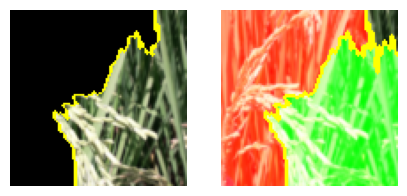

In [65]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (250).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 105ms/step
Accuracy of this prediction is 9.84059e-06


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 230ms/step


  1%|          | 10/1000 [00:00<00:31, 31.75it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 20/1000 [00:00<00:30, 32.05it/s]

1/1 [==============================] - 0s 211ms/step


  3%|▎         | 30/1000 [00:00<00:30, 31.86it/s]

1/1 [==============================] - 0s 230ms/step


  4%|▍         | 40/1000 [00:01<00:30, 31.60it/s]

1/1 [==============================] - 0s 228ms/step


  5%|▌         | 50/1000 [00:01<00:30, 30.96it/s]

1/1 [==============================] - 0s 300ms/step


  6%|▌         | 60/1000 [00:02<00:33, 28.15it/s]

1/1 [==============================] - 0s 329ms/step


  7%|▋         | 70/1000 [00:02<00:36, 25.68it/s]

1/1 [==============================] - 0s 403ms/step


  8%|▊         | 80/1000 [00:03<00:40, 22.99it/s]

1/1 [==============================] - 0s 357ms/step


  9%|▉         | 90/1000 [00:03<00:42, 21.36it/s]

1/1 [==============================] - 0s 347ms/step


 10%|█         | 100/1000 [00:04<00:42, 20.96it/s]

1/1 [==============================] - 0s 339ms/step


 11%|█         | 110/1000 [00:04<00:43, 20.68it/s]

1/1 [==============================] - 0s 315ms/step


 12%|█▏        | 120/1000 [00:05<00:42, 20.72it/s]

1/1 [==============================] - 0s 259ms/step


 13%|█▎        | 130/1000 [00:05<00:39, 21.91it/s]

1/1 [==============================] - 0s 260ms/step


 14%|█▍        | 140/1000 [00:05<00:37, 22.83it/s]

1/1 [==============================] - 0s 230ms/step


 15%|█▌        | 150/1000 [00:06<00:35, 24.16it/s]

1/1 [==============================] - 0s 249ms/step


 16%|█▌        | 160/1000 [00:06<00:33, 25.08it/s]

1/1 [==============================] - 0s 236ms/step


 17%|█▋        | 170/1000 [00:06<00:31, 26.05it/s]

1/1 [==============================] - 0s 308ms/step


 18%|█▊        | 180/1000 [00:07<00:32, 25.42it/s]

1/1 [==============================] - 0s 319ms/step


 19%|█▉        | 190/1000 [00:07<00:32, 24.74it/s]

1/1 [==============================] - 0s 309ms/step


 20%|██        | 200/1000 [00:08<00:33, 23.81it/s]

1/1 [==============================] - 0s 349ms/step


 21%|██        | 210/1000 [00:08<00:35, 22.42it/s]

1/1 [==============================] - 0s 328ms/step


 22%|██▏       | 220/1000 [00:09<00:36, 21.66it/s]

1/1 [==============================] - 0s 268ms/step


 23%|██▎       | 230/1000 [00:09<00:34, 22.37it/s]

1/1 [==============================] - 0s 227ms/step


 24%|██▍       | 240/1000 [00:09<00:31, 23.79it/s]

1/1 [==============================] - 0s 276ms/step


 25%|██▌       | 250/1000 [00:10<00:31, 23.76it/s]

1/1 [==============================] - 0s 330ms/step


 26%|██▌       | 260/1000 [00:10<00:32, 22.64it/s]

1/1 [==============================] - 0s 292ms/step


 27%|██▋       | 270/1000 [00:11<00:31, 23.01it/s]

1/1 [==============================] - 0s 366ms/step


 28%|██▊       | 280/1000 [00:11<00:32, 22.48it/s]

1/1 [==============================] - 0s 258ms/step


 29%|██▉       | 290/1000 [00:12<00:30, 22.92it/s]

1/1 [==============================] - 0s 276ms/step


 30%|███       | 300/1000 [00:12<00:29, 23.44it/s]

1/1 [==============================] - 0s 354ms/step


 31%|███       | 310/1000 [00:13<00:30, 22.47it/s]

1/1 [==============================] - 0s 291ms/step


 32%|███▏      | 320/1000 [00:13<00:30, 22.29it/s]

1/1 [==============================] - 0s 256ms/step


 33%|███▎      | 330/1000 [00:13<00:28, 23.19it/s]

1/1 [==============================] - 0s 253ms/step


 34%|███▍      | 340/1000 [00:14<00:27, 24.02it/s]

1/1 [==============================] - 0s 242ms/step


 35%|███▌      | 350/1000 [00:14<00:26, 24.82it/s]

1/1 [==============================] - 0s 275ms/step


 36%|███▌      | 360/1000 [00:15<00:25, 25.06it/s]

1/1 [==============================] - 0s 266ms/step


 37%|███▋      | 370/1000 [00:15<00:25, 24.89it/s]

1/1 [==============================] - 0s 284ms/step


 38%|███▊      | 380/1000 [00:15<00:25, 24.70it/s]

1/1 [==============================] - 0s 300ms/step


 39%|███▉      | 390/1000 [00:16<00:26, 22.95it/s]

1/1 [==============================] - 0s 258ms/step


 40%|████      | 400/1000 [00:16<00:25, 23.33it/s]

1/1 [==============================] - 0s 295ms/step


 41%|████      | 410/1000 [00:17<00:25, 23.36it/s]

1/1 [==============================] - 0s 274ms/step


 42%|████▏     | 420/1000 [00:17<00:24, 23.37it/s]

1/1 [==============================] - 0s 354ms/step


 43%|████▎     | 430/1000 [00:18<00:25, 22.16it/s]

1/1 [==============================] - 0s 305ms/step


 44%|████▍     | 440/1000 [00:18<00:25, 22.30it/s]

1/1 [==============================] - 0s 262ms/step


 45%|████▌     | 450/1000 [00:19<00:24, 22.90it/s]

1/1 [==============================] - 0s 326ms/step


 46%|████▌     | 460/1000 [00:19<00:24, 22.33it/s]

1/1 [==============================] - 0s 342ms/step


 47%|████▋     | 470/1000 [00:19<00:24, 21.61it/s]

1/1 [==============================] - 0s 268ms/step


 48%|████▊     | 480/1000 [00:20<00:23, 22.22it/s]

1/1 [==============================] - 0s 322ms/step


 49%|████▉     | 490/1000 [00:20<00:23, 22.16it/s]

1/1 [==============================] - 0s 310ms/step


 50%|█████     | 500/1000 [00:21<00:22, 22.10it/s]

1/1 [==============================] - 0s 323ms/step


 51%|█████     | 510/1000 [00:21<00:22, 21.46it/s]

1/1 [==============================] - 0s 256ms/step


 52%|█████▏    | 520/1000 [00:22<00:21, 22.45it/s]

1/1 [==============================] - 0s 259ms/step


 53%|█████▎    | 530/1000 [00:22<00:20, 23.23it/s]

1/1 [==============================] - 0s 271ms/step


 54%|█████▍    | 540/1000 [00:23<00:19, 23.66it/s]

1/1 [==============================] - 0s 255ms/step


 55%|█████▌    | 550/1000 [00:23<00:18, 24.16it/s]

1/1 [==============================] - 0s 251ms/step


 56%|█████▌    | 560/1000 [00:23<00:17, 24.93it/s]

1/1 [==============================] - 0s 258ms/step


 57%|█████▋    | 570/1000 [00:24<00:17, 25.07it/s]

1/1 [==============================] - 0s 259ms/step


 58%|█████▊    | 580/1000 [00:24<00:16, 25.09it/s]

1/1 [==============================] - 0s 268ms/step


 59%|█████▉    | 590/1000 [00:24<00:16, 25.19it/s]

1/1 [==============================] - 0s 267ms/step


 60%|██████    | 600/1000 [00:25<00:15, 25.15it/s]

1/1 [==============================] - 0s 254ms/step


 61%|██████    | 610/1000 [00:25<00:15, 25.45it/s]

1/1 [==============================] - 0s 255ms/step


 62%|██████▏   | 620/1000 [00:26<00:14, 25.66it/s]

1/1 [==============================] - 0s 307ms/step


 63%|██████▎   | 630/1000 [00:26<00:14, 24.67it/s]

1/1 [==============================] - 0s 351ms/step


 64%|██████▍   | 640/1000 [00:27<00:16, 21.60it/s]

1/1 [==============================] - 0s 320ms/step


 65%|██████▌   | 650/1000 [00:27<00:16, 21.39it/s]

1/1 [==============================] - 0s 351ms/step


 66%|██████▌   | 660/1000 [00:28<00:16, 20.40it/s]

1/1 [==============================] - 0s 380ms/step


 67%|██████▋   | 670/1000 [00:28<00:16, 19.65it/s]

1/1 [==============================] - 0s 309ms/step


 68%|██████▊   | 680/1000 [00:29<00:16, 19.87it/s]

1/1 [==============================] - 0s 323ms/step


 69%|██████▉   | 690/1000 [00:29<00:16, 19.05it/s]

1/1 [==============================] - 0s 272ms/step


 70%|███████   | 700/1000 [00:30<00:14, 20.23it/s]

1/1 [==============================] - 0s 328ms/step


 71%|███████   | 710/1000 [00:30<00:14, 20.34it/s]

1/1 [==============================] - 0s 354ms/step


 72%|███████▏  | 720/1000 [00:31<00:13, 20.07it/s]

1/1 [==============================] - 0s 282ms/step


 73%|███████▎  | 730/1000 [00:31<00:12, 21.07it/s]

1/1 [==============================] - 0s 258ms/step


 74%|███████▍  | 740/1000 [00:32<00:11, 22.53it/s]

1/1 [==============================] - 0s 277ms/step


 75%|███████▌  | 750/1000 [00:32<00:10, 23.10it/s]

1/1 [==============================] - 0s 348ms/step


 76%|███████▌  | 760/1000 [00:32<00:10, 22.39it/s]

1/1 [==============================] - 0s 273ms/step


 77%|███████▋  | 770/1000 [00:33<00:10, 22.86it/s]

1/1 [==============================] - 0s 219ms/step


 78%|███████▊  | 780/1000 [00:33<00:09, 24.18it/s]

1/1 [==============================] - 0s 240ms/step


 79%|███████▉  | 790/1000 [00:34<00:08, 25.25it/s]

1/1 [==============================] - 0s 302ms/step


 80%|████████  | 800/1000 [00:34<00:08, 24.62it/s]

1/1 [==============================] - 0s 365ms/step


 81%|████████  | 810/1000 [00:35<00:08, 21.62it/s]

1/1 [==============================] - 0s 269ms/step


 82%|████████▏ | 820/1000 [00:35<00:08, 22.12it/s]

1/1 [==============================] - 0s 230ms/step


 83%|████████▎ | 830/1000 [00:35<00:07, 23.77it/s]

1/1 [==============================] - 0s 233ms/step


 84%|████████▍ | 840/1000 [00:36<00:06, 23.98it/s]

1/1 [==============================] - 0s 256ms/step


 85%|████████▌ | 850/1000 [00:36<00:06, 23.92it/s]

1/1 [==============================] - 0s 220ms/step


 86%|████████▌ | 860/1000 [00:37<00:05, 24.57it/s]

1/1 [==============================] - 0s 259ms/step


 87%|████████▋ | 870/1000 [00:37<00:05, 24.26it/s]

1/1 [==============================] - 0s 282ms/step


 88%|████████▊ | 880/1000 [00:37<00:04, 24.42it/s]

1/1 [==============================] - 0s 243ms/step


 89%|████████▉ | 890/1000 [00:38<00:04, 24.97it/s]

1/1 [==============================] - 0s 242ms/step


 90%|█████████ | 900/1000 [00:38<00:03, 25.23it/s]

1/1 [==============================] - 0s 230ms/step


 91%|█████████ | 910/1000 [00:38<00:03, 26.21it/s]

1/1 [==============================] - 0s 239ms/step


 92%|█████████▏| 920/1000 [00:39<00:03, 26.37it/s]

1/1 [==============================] - 0s 227ms/step


 93%|█████████▎| 930/1000 [00:39<00:02, 27.14it/s]

1/1 [==============================] - 0s 216ms/step


 94%|█████████▍| 940/1000 [00:40<00:02, 28.21it/s]

1/1 [==============================] - 0s 214ms/step


 95%|█████████▌| 950/1000 [00:40<00:01, 29.32it/s]

1/1 [==============================] - 0s 201ms/step


 96%|█████████▌| 960/1000 [00:40<00:01, 30.34it/s]

1/1 [==============================] - 0s 204ms/step


 97%|█████████▋| 970/1000 [00:40<00:00, 31.12it/s]

1/1 [==============================] - 0s 247ms/step


 98%|█████████▊| 980/1000 [00:41<00:00, 30.19it/s]

1/1 [==============================] - 0s 233ms/step


 99%|█████████▉| 990/1000 [00:41<00:00, 29.78it/s]

1/1 [==============================] - 0s 237ms/step


100%|██████████| 1000/1000 [00:41<00:00, 23.82it/s]


(-0.5, 99.5, 99.5, -0.5)

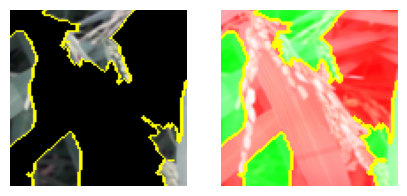

In [66]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (220).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 104ms/step
Accuracy of this prediction is 1.0172005e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 205ms/step


  1%|          | 10/1000 [00:00<00:27, 35.45it/s]

1/1 [==============================] - 0s 196ms/step


  2%|▏         | 20/1000 [00:00<00:28, 34.50it/s]

1/1 [==============================] - 0s 204ms/step


  3%|▎         | 30/1000 [00:00<00:28, 34.51it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 40/1000 [00:01<00:28, 33.58it/s]

1/1 [==============================] - 0s 234ms/step


  5%|▌         | 50/1000 [00:01<00:29, 32.51it/s]

1/1 [==============================] - 0s 213ms/step


  6%|▌         | 60/1000 [00:01<00:28, 33.23it/s]

1/1 [==============================] - 0s 207ms/step


  7%|▋         | 70/1000 [00:02<00:27, 33.43it/s]

1/1 [==============================] - 0s 206ms/step


  8%|▊         | 80/1000 [00:02<00:27, 33.96it/s]

1/1 [==============================] - 0s 215ms/step


  9%|▉         | 90/1000 [00:02<00:27, 33.36it/s]

1/1 [==============================] - 0s 172ms/step


 10%|█         | 100/1000 [00:02<00:25, 34.67it/s]

1/1 [==============================] - 0s 201ms/step


 11%|█         | 110/1000 [00:03<00:25, 34.75it/s]

1/1 [==============================] - 0s 214ms/step


 12%|█▏        | 120/1000 [00:03<00:25, 33.91it/s]

1/1 [==============================] - 0s 202ms/step


 13%|█▎        | 130/1000 [00:03<00:25, 33.91it/s]

1/1 [==============================] - 0s 220ms/step


 14%|█▍        | 140/1000 [00:04<00:25, 33.50it/s]

1/1 [==============================] - 0s 216ms/step


 15%|█▌        | 150/1000 [00:04<00:25, 32.97it/s]

1/1 [==============================] - 0s 230ms/step


 16%|█▌        | 160/1000 [00:04<00:26, 32.09it/s]

1/1 [==============================] - 0s 231ms/step


 17%|█▋        | 170/1000 [00:05<00:26, 31.59it/s]

1/1 [==============================] - 0s 224ms/step


 18%|█▊        | 180/1000 [00:05<00:26, 31.36it/s]

1/1 [==============================] - 0s 218ms/step


 19%|█▉        | 190/1000 [00:05<00:25, 31.64it/s]

1/1 [==============================] - 0s 227ms/step


 20%|██        | 200/1000 [00:06<00:25, 31.49it/s]

1/1 [==============================] - 0s 227ms/step


 21%|██        | 210/1000 [00:06<00:25, 31.30it/s]

1/1 [==============================] - 0s 207ms/step


 22%|██▏       | 220/1000 [00:06<00:24, 31.61it/s]

1/1 [==============================] - 0s 230ms/step


 23%|██▎       | 230/1000 [00:07<00:24, 31.23it/s]

1/1 [==============================] - 0s 268ms/step


 24%|██▍       | 240/1000 [00:07<00:25, 29.45it/s]

1/1 [==============================] - 0s 291ms/step


 25%|██▌       | 250/1000 [00:07<00:27, 27.21it/s]

1/1 [==============================] - 0s 240ms/step


 26%|██▌       | 260/1000 [00:08<00:27, 27.01it/s]

1/1 [==============================] - 0s 235ms/step


 27%|██▋       | 270/1000 [00:08<00:26, 27.29it/s]

1/1 [==============================] - 0s 224ms/step


 28%|██▊       | 280/1000 [00:08<00:25, 28.10it/s]

1/1 [==============================] - 0s 243ms/step


 29%|██▉       | 290/1000 [00:09<00:25, 27.50it/s]

1/1 [==============================] - 0s 234ms/step


 30%|███       | 300/1000 [00:09<00:24, 28.01it/s]

1/1 [==============================] - 0s 213ms/step


 31%|███       | 310/1000 [00:09<00:23, 29.20it/s]

1/1 [==============================] - 0s 251ms/step


 32%|███▏      | 320/1000 [00:10<00:23, 28.68it/s]

1/1 [==============================] - 0s 222ms/step


 33%|███▎      | 330/1000 [00:10<00:23, 28.74it/s]

1/1 [==============================] - 0s 216ms/step


 34%|███▍      | 340/1000 [00:10<00:22, 29.21it/s]

1/1 [==============================] - 0s 246ms/step


 35%|███▌      | 350/1000 [00:11<00:22, 28.88it/s]

1/1 [==============================] - 0s 231ms/step


 36%|███▌      | 360/1000 [00:11<00:22, 28.41it/s]

1/1 [==============================] - 0s 210ms/step


 37%|███▋      | 370/1000 [00:12<00:21, 29.07it/s]

1/1 [==============================] - 0s 233ms/step


 38%|███▊      | 380/1000 [00:12<00:21, 28.66it/s]

1/1 [==============================] - 0s 213ms/step


 39%|███▉      | 390/1000 [00:12<00:20, 29.22it/s]

1/1 [==============================] - 0s 241ms/step


 40%|████      | 400/1000 [00:13<00:20, 28.88it/s]

1/1 [==============================] - 0s 216ms/step


 41%|████      | 410/1000 [00:13<00:20, 29.17it/s]

1/1 [==============================] - 0s 205ms/step


 42%|████▏     | 420/1000 [00:13<00:19, 29.89it/s]

1/1 [==============================] - 0s 228ms/step


 43%|████▎     | 430/1000 [00:14<00:18, 30.13it/s]

1/1 [==============================] - 0s 223ms/step


 44%|████▍     | 440/1000 [00:14<00:18, 30.23it/s]

1/1 [==============================] - 0s 213ms/step


 45%|████▌     | 450/1000 [00:14<00:17, 30.76it/s]

1/1 [==============================] - 0s 215ms/step


 46%|████▌     | 460/1000 [00:15<00:17, 31.05it/s]

1/1 [==============================] - 0s 225ms/step


 47%|████▋     | 470/1000 [00:15<00:16, 31.18it/s]

1/1 [==============================] - 0s 200ms/step


 48%|████▊     | 480/1000 [00:15<00:16, 31.78it/s]

1/1 [==============================] - 0s 215ms/step


 49%|████▉     | 490/1000 [00:15<00:15, 31.92it/s]

1/1 [==============================] - 0s 227ms/step


 50%|█████     | 500/1000 [00:16<00:16, 31.16it/s]

1/1 [==============================] - 0s 204ms/step


 51%|█████     | 510/1000 [00:16<00:15, 31.82it/s]

1/1 [==============================] - 0s 218ms/step


 52%|█████▏    | 520/1000 [00:16<00:14, 32.05it/s]

1/1 [==============================] - 0s 203ms/step


 53%|█████▎    | 530/1000 [00:17<00:14, 32.32it/s]

1/1 [==============================] - 0s 193ms/step


 54%|█████▍    | 540/1000 [00:17<00:13, 33.04it/s]

1/1 [==============================] - 0s 203ms/step


 55%|█████▌    | 550/1000 [00:17<00:13, 33.04it/s]

1/1 [==============================] - 0s 268ms/step


 56%|█████▌    | 560/1000 [00:18<00:14, 30.72it/s]

1/1 [==============================] - 0s 251ms/step


 57%|█████▋    | 570/1000 [00:18<00:14, 28.95it/s]

1/1 [==============================] - 0s 232ms/step


 58%|█████▊    | 580/1000 [00:18<00:14, 28.88it/s]

1/1 [==============================] - 0s 211ms/step


 59%|█████▉    | 590/1000 [00:19<00:14, 29.28it/s]

1/1 [==============================] - 0s 228ms/step


 60%|██████    | 600/1000 [00:19<00:13, 29.28it/s]

1/1 [==============================] - 0s 209ms/step


 61%|██████    | 610/1000 [00:19<00:13, 29.88it/s]

1/1 [==============================] - 0s 227ms/step


 62%|██████▏   | 620/1000 [00:20<00:12, 29.83it/s]

1/1 [==============================] - 0s 227ms/step


 63%|██████▎   | 630/1000 [00:20<00:12, 29.28it/s]

1/1 [==============================] - 0s 226ms/step


 64%|██████▍   | 640/1000 [00:20<00:12, 29.39it/s]

1/1 [==============================] - 0s 245ms/step


 65%|██████▌   | 650/1000 [00:21<00:12, 28.67it/s]

1/1 [==============================] - 0s 218ms/step


 66%|██████▌   | 660/1000 [00:21<00:11, 28.93it/s]

1/1 [==============================] - 0s 216ms/step


 67%|██████▋   | 670/1000 [00:21<00:11, 29.19it/s]

1/1 [==============================] - 0s 224ms/step


 68%|██████▊   | 680/1000 [00:22<00:10, 29.33it/s]

1/1 [==============================] - 0s 182ms/step


 69%|██████▉   | 690/1000 [00:24<00:26, 11.88it/s]

1/1 [==============================] - 0s 202ms/step


 70%|███████   | 700/1000 [00:24<00:20, 14.72it/s]

1/1 [==============================] - 0s 196ms/step


 71%|███████   | 710/1000 [00:24<00:16, 17.83it/s]

1/1 [==============================] - 0s 186ms/step


 72%|███████▏  | 720/1000 [00:25<00:13, 21.09it/s]

1/1 [==============================] - 0s 215ms/step


 73%|███████▎  | 730/1000 [00:25<00:11, 23.64it/s]

1/1 [==============================] - 0s 226ms/step


 74%|███████▍  | 740/1000 [00:25<00:10, 25.67it/s]

1/1 [==============================] - 0s 212ms/step


 75%|███████▌  | 750/1000 [00:26<00:09, 27.42it/s]

1/1 [==============================] - 0s 213ms/step


 76%|███████▌  | 760/1000 [00:26<00:08, 28.52it/s]

1/1 [==============================] - 0s 212ms/step


 77%|███████▋  | 770/1000 [00:26<00:07, 29.77it/s]

1/1 [==============================] - 0s 232ms/step


 78%|███████▊  | 780/1000 [00:27<00:07, 30.23it/s]

1/1 [==============================] - 0s 219ms/step


 79%|███████▉  | 790/1000 [00:27<00:06, 30.81it/s]

1/1 [==============================] - 0s 214ms/step


 80%|████████  | 800/1000 [00:27<00:06, 31.35it/s]

1/1 [==============================] - 0s 214ms/step


 81%|████████  | 810/1000 [00:27<00:05, 32.36it/s]

1/1 [==============================] - 0s 177ms/step


 82%|████████▏ | 820/1000 [00:28<00:05, 33.51it/s]

1/1 [==============================] - 0s 209ms/step


 83%|████████▎ | 830/1000 [00:28<00:05, 33.33it/s]

1/1 [==============================] - 0s 204ms/step


 84%|████████▍ | 840/1000 [00:28<00:04, 33.38it/s]

1/1 [==============================] - 0s 211ms/step


 85%|████████▌ | 850/1000 [00:29<00:04, 33.27it/s]

1/1 [==============================] - 0s 217ms/step


 86%|████████▌ | 860/1000 [00:29<00:04, 32.62it/s]

1/1 [==============================] - 0s 216ms/step


 87%|████████▋ | 870/1000 [00:29<00:04, 32.43it/s]

1/1 [==============================] - 0s 236ms/step


 88%|████████▊ | 880/1000 [00:30<00:03, 31.61it/s]

1/1 [==============================] - 0s 224ms/step


 89%|████████▉ | 890/1000 [00:30<00:03, 30.68it/s]

1/1 [==============================] - 0s 214ms/step


 90%|█████████ | 900/1000 [00:30<00:03, 30.71it/s]

1/1 [==============================] - 0s 204ms/step


 91%|█████████ | 910/1000 [00:31<00:02, 30.87it/s]

1/1 [==============================] - 0s 231ms/step


 92%|█████████▏| 920/1000 [00:31<00:02, 30.31it/s]

1/1 [==============================] - 0s 215ms/step


 93%|█████████▎| 930/1000 [00:31<00:02, 30.52it/s]

1/1 [==============================] - 0s 225ms/step


 94%|█████████▍| 940/1000 [00:32<00:01, 30.12it/s]

1/1 [==============================] - 0s 222ms/step


 95%|█████████▌| 950/1000 [00:32<00:01, 29.95it/s]

1/1 [==============================] - 0s 216ms/step


 96%|█████████▌| 960/1000 [00:32<00:01, 30.33it/s]

1/1 [==============================] - 0s 204ms/step


 97%|█████████▋| 970/1000 [00:33<00:00, 31.03it/s]

1/1 [==============================] - 0s 217ms/step


 98%|█████████▊| 980/1000 [00:33<00:00, 31.15it/s]

1/1 [==============================] - 0s 213ms/step


 99%|█████████▉| 990/1000 [00:33<00:00, 31.75it/s]

1/1 [==============================] - 0s 190ms/step


100%|██████████| 1000/1000 [00:33<00:00, 29.46it/s]


(-0.5, 99.5, 99.5, -0.5)

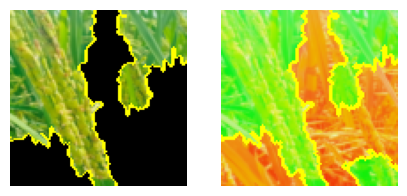

In [67]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (360).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')

1/1 [==============================] - 0s 110ms/step
Accuracy of this prediction is 1.0027502e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 198ms/step


  1%|          | 10/1000 [00:00<00:29, 33.66it/s]

1/1 [==============================] - 0s 211ms/step


  2%|▏         | 20/1000 [00:00<00:30, 31.77it/s]

1/1 [==============================] - 0s 210ms/step


  3%|▎         | 30/1000 [00:00<00:30, 31.85it/s]

1/1 [==============================] - 0s 215ms/step


  4%|▍         | 40/1000 [00:01<00:30, 31.42it/s]

1/1 [==============================] - 0s 225ms/step


  5%|▌         | 50/1000 [00:01<00:30, 31.08it/s]

1/1 [==============================] - 0s 204ms/step


  6%|▌         | 60/1000 [00:01<00:29, 31.40it/s]

1/1 [==============================] - 0s 229ms/step


  7%|▋         | 70/1000 [00:02<00:29, 31.09it/s]

1/1 [==============================] - 0s 218ms/step


  8%|▊         | 80/1000 [00:02<00:29, 31.21it/s]

1/1 [==============================] - 0s 214ms/step


  9%|▉         | 90/1000 [00:02<00:29, 31.13it/s]

1/1 [==============================] - 0s 214ms/step


 10%|█         | 100/1000 [00:03<00:28, 31.45it/s]

1/1 [==============================] - 0s 212ms/step


 11%|█         | 110/1000 [00:03<00:28, 31.33it/s]

1/1 [==============================] - 0s 209ms/step


 12%|█▏        | 120/1000 [00:03<00:28, 31.41it/s]

1/1 [==============================] - 0s 211ms/step


 13%|█▎        | 130/1000 [00:04<00:27, 31.29it/s]

1/1 [==============================] - 0s 224ms/step


 14%|█▍        | 140/1000 [00:04<00:27, 30.92it/s]

1/1 [==============================] - 0s 199ms/step


 15%|█▌        | 150/1000 [00:04<00:27, 31.08it/s]

1/1 [==============================] - 0s 212ms/step


 16%|█▌        | 160/1000 [00:05<00:27, 31.09it/s]

1/1 [==============================] - 0s 219ms/step


 17%|█▋        | 170/1000 [00:05<00:27, 30.62it/s]

1/1 [==============================] - 0s 216ms/step


 18%|█▊        | 180/1000 [00:05<00:27, 30.35it/s]

1/1 [==============================] - 0s 222ms/step


 19%|█▉        | 190/1000 [00:06<00:26, 30.16it/s]

1/1 [==============================] - 0s 220ms/step


 20%|██        | 200/1000 [00:06<00:26, 30.12it/s]

1/1 [==============================] - 0s 213ms/step


 21%|██        | 210/1000 [00:06<00:25, 30.63it/s]

1/1 [==============================] - 0s 233ms/step


 22%|██▏       | 220/1000 [00:07<00:26, 29.93it/s]

1/1 [==============================] - 0s 225ms/step


 23%|██▎       | 230/1000 [00:07<00:26, 29.56it/s]

1/1 [==============================] - 0s 224ms/step


 24%|██▍       | 240/1000 [00:07<00:25, 29.38it/s]

1/1 [==============================] - 0s 210ms/step


 25%|██▌       | 250/1000 [00:08<00:24, 30.15it/s]

1/1 [==============================] - 0s 211ms/step


 26%|██▌       | 260/1000 [00:08<00:24, 30.53it/s]

1/1 [==============================] - 0s 207ms/step


 27%|██▋       | 270/1000 [00:08<00:23, 31.03it/s]

1/1 [==============================] - 0s 235ms/step


 28%|██▊       | 280/1000 [00:09<00:23, 30.14it/s]

1/1 [==============================] - 0s 214ms/step


 29%|██▉       | 290/1000 [00:09<00:23, 30.17it/s]

1/1 [==============================] - 0s 215ms/step


 30%|███       | 300/1000 [00:09<00:22, 30.51it/s]

1/1 [==============================] - 0s 224ms/step


 31%|███       | 310/1000 [00:10<00:22, 30.46it/s]

1/1 [==============================] - 0s 217ms/step


 32%|███▏      | 320/1000 [00:10<00:22, 30.42it/s]

1/1 [==============================] - 0s 225ms/step


 33%|███▎      | 330/1000 [00:10<00:22, 29.84it/s]

1/1 [==============================] - 0s 217ms/step


 34%|███▍      | 340/1000 [00:11<00:22, 29.93it/s]

1/1 [==============================] - 0s 224ms/step


 35%|███▌      | 350/1000 [00:11<00:21, 29.95it/s]

1/1 [==============================] - 0s 221ms/step


 36%|███▌      | 360/1000 [00:11<00:21, 30.11it/s]

1/1 [==============================] - 0s 219ms/step


 37%|███▋      | 370/1000 [00:12<00:20, 30.18it/s]

1/1 [==============================] - 0s 229ms/step


 38%|███▊      | 380/1000 [00:12<00:20, 29.79it/s]

1/1 [==============================] - 0s 204ms/step


 39%|███▉      | 390/1000 [00:12<00:19, 30.51it/s]

1/1 [==============================] - 0s 232ms/step


 40%|████      | 400/1000 [00:13<00:20, 29.89it/s]

1/1 [==============================] - 0s 240ms/step


 41%|████      | 410/1000 [00:13<00:20, 28.98it/s]

1/1 [==============================] - 0s 232ms/step


 42%|████▏     | 420/1000 [00:13<00:20, 28.52it/s]

1/1 [==============================] - 0s 209ms/step


 43%|████▎     | 430/1000 [00:14<00:19, 29.20it/s]

1/1 [==============================] - 0s 212ms/step


 44%|████▍     | 440/1000 [00:14<00:18, 29.80it/s]

1/1 [==============================] - 0s 243ms/step


 45%|████▌     | 450/1000 [00:14<00:19, 28.35it/s]

1/1 [==============================] - 0s 251ms/step


 46%|████▌     | 460/1000 [00:15<00:20, 26.90it/s]

1/1 [==============================] - 0s 224ms/step


 47%|████▋     | 470/1000 [00:15<00:19, 27.43it/s]

1/1 [==============================] - 0s 217ms/step


 48%|████▊     | 480/1000 [00:15<00:18, 28.29it/s]

1/1 [==============================] - 0s 258ms/step


 49%|████▉     | 490/1000 [00:16<00:18, 27.60it/s]

1/1 [==============================] - 0s 240ms/step


 50%|█████     | 500/1000 [00:16<00:18, 27.53it/s]

1/1 [==============================] - 0s 225ms/step


 51%|█████     | 510/1000 [00:17<00:17, 28.00it/s]

1/1 [==============================] - 0s 226ms/step


 52%|█████▏    | 520/1000 [00:17<00:16, 28.53it/s]

1/1 [==============================] - 0s 224ms/step


 53%|█████▎    | 530/1000 [00:17<00:16, 28.81it/s]

1/1 [==============================] - 0s 230ms/step


 54%|█████▍    | 540/1000 [00:18<00:15, 28.87it/s]

1/1 [==============================] - 0s 212ms/step


 55%|█████▌    | 550/1000 [00:18<00:15, 29.48it/s]

1/1 [==============================] - 0s 214ms/step


 56%|█████▌    | 560/1000 [00:18<00:14, 30.08it/s]

1/1 [==============================] - 0s 233ms/step


 57%|█████▋    | 570/1000 [00:19<00:14, 29.73it/s]

1/1 [==============================] - 0s 221ms/step


 58%|█████▊    | 580/1000 [00:19<00:14, 29.76it/s]

1/1 [==============================] - 0s 233ms/step


 59%|█████▉    | 590/1000 [00:19<00:13, 29.44it/s]

1/1 [==============================] - 0s 236ms/step


 60%|██████    | 600/1000 [00:20<00:13, 29.04it/s]

1/1 [==============================] - 0s 230ms/step


 61%|██████    | 610/1000 [00:20<00:13, 28.89it/s]

1/1 [==============================] - 0s 217ms/step


 62%|██████▏   | 620/1000 [00:20<00:12, 29.27it/s]

1/1 [==============================] - 0s 217ms/step


 63%|██████▎   | 630/1000 [00:21<00:12, 29.69it/s]

1/1 [==============================] - 0s 240ms/step


 64%|██████▍   | 640/1000 [00:21<00:12, 28.91it/s]

1/1 [==============================] - 0s 215ms/step


 65%|██████▌   | 650/1000 [00:21<00:11, 29.24it/s]

1/1 [==============================] - 0s 215ms/step


 66%|██████▌   | 660/1000 [00:22<00:11, 29.78it/s]

1/1 [==============================] - 0s 227ms/step


 67%|██████▋   | 670/1000 [00:22<00:11, 29.73it/s]

1/1 [==============================] - 0s 224ms/step


 68%|██████▊   | 680/1000 [00:22<00:10, 29.80it/s]

1/1 [==============================] - 0s 208ms/step


 69%|██████▉   | 690/1000 [00:23<00:10, 29.73it/s]

1/1 [==============================] - 0s 231ms/step


 70%|███████   | 700/1000 [00:23<00:10, 29.52it/s]

1/1 [==============================] - 0s 223ms/step


 71%|███████   | 710/1000 [00:23<00:09, 29.42it/s]

1/1 [==============================] - 0s 212ms/step


 72%|███████▏  | 720/1000 [00:24<00:09, 29.79it/s]

1/1 [==============================] - 0s 226ms/step


 73%|███████▎  | 730/1000 [00:24<00:09, 29.89it/s]

1/1 [==============================] - 0s 235ms/step


 74%|███████▍  | 740/1000 [00:24<00:08, 29.38it/s]

1/1 [==============================] - 0s 239ms/step


 75%|███████▌  | 750/1000 [00:25<00:08, 29.06it/s]

1/1 [==============================] - 0s 245ms/step


 76%|███████▌  | 760/1000 [00:25<00:08, 27.99it/s]

1/1 [==============================] - 0s 230ms/step


 77%|███████▋  | 770/1000 [00:25<00:08, 28.07it/s]

1/1 [==============================] - 0s 222ms/step


 78%|███████▊  | 780/1000 [00:26<00:07, 28.25it/s]

1/1 [==============================] - 0s 218ms/step


 79%|███████▉  | 790/1000 [00:26<00:07, 28.85it/s]

1/1 [==============================] - 0s 217ms/step


 80%|████████  | 800/1000 [00:26<00:06, 29.05it/s]

1/1 [==============================] - 0s 229ms/step


 81%|████████  | 810/1000 [00:27<00:06, 29.07it/s]

1/1 [==============================] - 0s 211ms/step


 82%|████████▏ | 820/1000 [00:27<00:06, 29.63it/s]

1/1 [==============================] - 0s 227ms/step


 83%|████████▎ | 830/1000 [00:27<00:05, 29.82it/s]

1/1 [==============================] - 0s 221ms/step


 84%|████████▍ | 840/1000 [00:28<00:05, 30.12it/s]

1/1 [==============================] - 0s 203ms/step


 85%|████████▌ | 850/1000 [00:28<00:04, 30.76it/s]

1/1 [==============================] - 0s 217ms/step


 86%|████████▌ | 860/1000 [00:28<00:04, 30.84it/s]

1/1 [==============================] - 0s 221ms/step


 87%|████████▋ | 870/1000 [00:29<00:04, 30.42it/s]

1/1 [==============================] - 0s 211ms/step


 88%|████████▊ | 880/1000 [00:29<00:03, 30.80it/s]

1/1 [==============================] - 0s 216ms/step


 89%|████████▉ | 890/1000 [00:29<00:03, 31.01it/s]

1/1 [==============================] - 0s 222ms/step


 90%|█████████ | 900/1000 [00:30<00:03, 31.04it/s]

1/1 [==============================] - 0s 219ms/step


 91%|█████████ | 910/1000 [00:30<00:02, 30.97it/s]

1/1 [==============================] - 0s 211ms/step


 92%|█████████▏| 920/1000 [00:30<00:02, 31.04it/s]

1/1 [==============================] - 0s 216ms/step


 93%|█████████▎| 930/1000 [00:31<00:02, 31.15it/s]

1/1 [==============================] - 0s 221ms/step


 94%|█████████▍| 940/1000 [00:31<00:01, 31.01it/s]

1/1 [==============================] - 0s 202ms/step


 95%|█████████▌| 950/1000 [00:31<00:01, 31.51it/s]

1/1 [==============================] - 0s 234ms/step


 96%|█████████▌| 960/1000 [00:32<00:01, 30.36it/s]

1/1 [==============================] - 0s 222ms/step


 97%|█████████▋| 970/1000 [00:32<00:00, 30.12it/s]

1/1 [==============================] - 0s 222ms/step


 98%|█████████▊| 980/1000 [00:32<00:00, 30.40it/s]

1/1 [==============================] - 0s 210ms/step


 99%|█████████▉| 990/1000 [00:33<00:00, 30.65it/s]

1/1 [==============================] - 0s 221ms/step


100%|██████████| 1000/1000 [00:33<00:00, 29.90it/s]


(-0.5, 99.5, 99.5, -0.5)

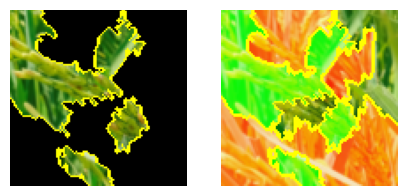

In [68]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (372).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')

1/1 [==============================] - 0s 99ms/step
Accuracy of this prediction is 9.886758e-06


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 179ms/step


  1%|          | 10/1000 [00:00<00:26, 37.36it/s]

1/1 [==============================] - 0s 206ms/step


  2%|▏         | 20/1000 [00:00<00:27, 35.88it/s]

1/1 [==============================] - 0s 215ms/step


  3%|▎         | 30/1000 [00:00<00:27, 35.37it/s]

1/1 [==============================] - 0s 211ms/step


  4%|▍         | 40/1000 [00:01<00:27, 34.34it/s]

1/1 [==============================] - 0s 213ms/step


  5%|▌         | 50/1000 [00:01<00:28, 33.87it/s]

1/1 [==============================] - 0s 218ms/step


  6%|▌         | 60/1000 [00:01<00:28, 32.84it/s]

1/1 [==============================] - 0s 204ms/step


  7%|▋         | 70/1000 [00:02<00:28, 32.80it/s]

1/1 [==============================] - 0s 214ms/step


  8%|▊         | 80/1000 [00:02<00:28, 32.11it/s]

1/1 [==============================] - 0s 232ms/step


  9%|▉         | 90/1000 [00:02<00:29, 31.06it/s]

1/1 [==============================] - 0s 216ms/step


 10%|█         | 100/1000 [00:03<00:28, 31.18it/s]

1/1 [==============================] - 0s 209ms/step


 11%|█         | 110/1000 [00:03<00:28, 31.16it/s]

1/1 [==============================] - 0s 209ms/step


 12%|█▏        | 120/1000 [00:03<00:27, 31.43it/s]

1/1 [==============================] - 0s 230ms/step


 13%|█▎        | 130/1000 [00:04<00:28, 30.40it/s]

1/1 [==============================] - 0s 228ms/step


 14%|█▍        | 140/1000 [00:04<00:28, 29.88it/s]

1/1 [==============================] - 0s 214ms/step


 15%|█▌        | 150/1000 [00:04<00:28, 30.18it/s]

1/1 [==============================] - 0s 229ms/step


 16%|█▌        | 160/1000 [00:05<00:28, 29.77it/s]

1/1 [==============================] - 0s 217ms/step


 17%|█▋        | 170/1000 [00:05<00:27, 30.08it/s]

1/1 [==============================] - 0s 215ms/step


 18%|█▊        | 180/1000 [00:05<00:27, 29.91it/s]

1/1 [==============================] - 0s 217ms/step


 19%|█▉        | 190/1000 [00:06<00:26, 30.05it/s]

1/1 [==============================] - 0s 218ms/step


 20%|██        | 200/1000 [00:06<00:26, 30.20it/s]

1/1 [==============================] - 0s 209ms/step


 21%|██        | 210/1000 [00:06<00:25, 30.52it/s]

1/1 [==============================] - 0s 234ms/step


 22%|██▏       | 220/1000 [00:07<00:26, 29.97it/s]

1/1 [==============================] - 0s 220ms/step


 23%|██▎       | 230/1000 [00:07<00:25, 30.01it/s]

1/1 [==============================] - 0s 216ms/step


 24%|██▍       | 240/1000 [00:07<00:25, 30.22it/s]

1/1 [==============================] - 0s 223ms/step


 25%|██▌       | 250/1000 [00:08<00:24, 30.20it/s]

1/1 [==============================] - 0s 222ms/step


 26%|██▌       | 260/1000 [00:08<00:24, 30.14it/s]

1/1 [==============================] - 0s 210ms/step


 27%|██▋       | 270/1000 [00:08<00:24, 30.16it/s]

1/1 [==============================] - 0s 216ms/step


 28%|██▊       | 280/1000 [00:09<00:23, 30.26it/s]

1/1 [==============================] - 0s 239ms/step


 29%|██▉       | 290/1000 [00:09<00:24, 29.58it/s]

1/1 [==============================] - 0s 215ms/step


 30%|███       | 300/1000 [00:09<00:23, 29.88it/s]

1/1 [==============================] - 0s 215ms/step


 31%|███       | 310/1000 [00:10<00:22, 30.37it/s]

1/1 [==============================] - 0s 242ms/step


 32%|███▏      | 320/1000 [00:10<00:22, 29.89it/s]

1/1 [==============================] - 0s 277ms/step


 33%|███▎      | 330/1000 [00:10<00:23, 28.07it/s]

1/1 [==============================] - 0s 350ms/step


 34%|███▍      | 340/1000 [00:11<00:26, 25.11it/s]

1/1 [==============================] - 0s 317ms/step


 35%|███▌      | 350/1000 [00:11<00:27, 23.51it/s]

1/1 [==============================] - 0s 289ms/step


 36%|███▌      | 360/1000 [00:12<00:27, 23.21it/s]

1/1 [==============================] - 0s 264ms/step


 37%|███▋      | 370/1000 [00:12<00:26, 23.39it/s]

1/1 [==============================] - 0s 354ms/step


 38%|███▊      | 380/1000 [00:13<00:28, 22.12it/s]

1/1 [==============================] - 0s 370ms/step


 39%|███▉      | 390/1000 [00:13<00:29, 20.82it/s]

1/1 [==============================] - 0s 319ms/step


 40%|████      | 400/1000 [00:14<00:28, 20.85it/s]

1/1 [==============================] - 0s 275ms/step


 41%|████      | 410/1000 [00:14<00:27, 21.42it/s]

1/1 [==============================] - 0s 253ms/step


 42%|████▏     | 420/1000 [00:15<00:25, 22.33it/s]

1/1 [==============================] - 0s 234ms/step


 43%|████▎     | 430/1000 [00:15<00:24, 23.33it/s]

1/1 [==============================] - 0s 239ms/step


 44%|████▍     | 440/1000 [00:15<00:22, 24.66it/s]

1/1 [==============================] - 0s 247ms/step


 45%|████▌     | 450/1000 [00:16<00:21, 25.02it/s]

1/1 [==============================] - 0s 248ms/step


 46%|████▌     | 460/1000 [00:16<00:20, 25.75it/s]

1/1 [==============================] - 0s 239ms/step


 47%|████▋     | 470/1000 [00:16<00:20, 26.33it/s]

1/1 [==============================] - 0s 215ms/step


 48%|████▊     | 480/1000 [00:17<00:19, 27.17it/s]

1/1 [==============================] - 0s 288ms/step


 49%|████▉     | 490/1000 [00:17<00:19, 26.49it/s]

1/1 [==============================] - 0s 283ms/step


 50%|█████     | 500/1000 [00:18<00:19, 25.43it/s]

1/1 [==============================] - 0s 236ms/step


 51%|█████     | 510/1000 [00:18<00:19, 25.64it/s]

1/1 [==============================] - 0s 221ms/step


 52%|█████▏    | 520/1000 [00:18<00:18, 26.57it/s]

1/1 [==============================] - 0s 190ms/step


 53%|█████▎    | 530/1000 [00:19<00:15, 29.42it/s]

1/1 [==============================] - 0s 193ms/step


 54%|█████▍    | 540/1000 [00:19<00:14, 31.01it/s]

1/1 [==============================] - 0s 199ms/step


 55%|█████▌    | 550/1000 [00:19<00:13, 32.64it/s]

1/1 [==============================] - 0s 219ms/step


 56%|█████▌    | 560/1000 [00:19<00:13, 32.42it/s]

1/1 [==============================] - 0s 208ms/step


 57%|█████▋    | 570/1000 [00:20<00:12, 33.24it/s]

1/1 [==============================] - 0s 189ms/step


 58%|█████▊    | 580/1000 [00:20<00:12, 34.42it/s]

1/1 [==============================] - 0s 195ms/step


 59%|█████▉    | 590/1000 [00:20<00:11, 35.31it/s]

1/1 [==============================] - 0s 251ms/step


 60%|██████    | 600/1000 [00:21<00:12, 32.36it/s]

1/1 [==============================] - 0s 225ms/step


 61%|██████    | 610/1000 [00:21<00:12, 31.75it/s]

1/1 [==============================] - 0s 181ms/step


 62%|██████▏   | 620/1000 [00:21<00:11, 33.55it/s]

1/1 [==============================] - 0s 174ms/step


 63%|██████▎   | 630/1000 [00:21<00:10, 35.09it/s]

1/1 [==============================] - 0s 167ms/step


 64%|██████▍   | 640/1000 [00:22<00:09, 37.05it/s]

1/1 [==============================] - 0s 165ms/step


 65%|██████▌   | 650/1000 [00:22<00:09, 38.74it/s]

1/1 [==============================] - 0s 165ms/step


 66%|██████▌   | 660/1000 [00:22<00:08, 39.93it/s]

1/1 [==============================] - 0s 168ms/step


 67%|██████▋   | 670/1000 [00:22<00:08, 40.52it/s]

1/1 [==============================] - 0s 173ms/step


 68%|██████▊   | 680/1000 [00:23<00:07, 41.06it/s]

1/1 [==============================] - 0s 172ms/step


 69%|██████▉   | 690/1000 [00:23<00:07, 41.30it/s]

1/1 [==============================] - 0s 173ms/step


 70%|███████   | 700/1000 [00:23<00:07, 41.32it/s]

1/1 [==============================] - 0s 174ms/step


 71%|███████   | 710/1000 [00:23<00:06, 41.57it/s]

1/1 [==============================] - 0s 163ms/step


 72%|███████▏  | 720/1000 [00:24<00:06, 41.82it/s]

1/1 [==============================] - 0s 170ms/step


 73%|███████▎  | 730/1000 [00:24<00:06, 42.02it/s]

1/1 [==============================] - 0s 185ms/step


 74%|███████▍  | 740/1000 [00:24<00:06, 41.36it/s]

1/1 [==============================] - 0s 167ms/step


 75%|███████▌  | 750/1000 [00:24<00:06, 41.55it/s]

1/1 [==============================] - 0s 169ms/step


 76%|███████▌  | 760/1000 [00:24<00:05, 41.83it/s]

1/1 [==============================] - 0s 170ms/step


 77%|███████▋  | 770/1000 [00:25<00:05, 42.02it/s]

1/1 [==============================] - 0s 168ms/step


 78%|███████▊  | 780/1000 [00:25<00:05, 42.26it/s]

1/1 [==============================] - 0s 165ms/step


 79%|███████▉  | 790/1000 [00:25<00:04, 42.60it/s]

1/1 [==============================] - 0s 168ms/step


 80%|████████  | 800/1000 [00:25<00:04, 42.66it/s]

1/1 [==============================] - 0s 172ms/step


 81%|████████  | 810/1000 [00:26<00:04, 42.13it/s]

1/1 [==============================] - 0s 170ms/step


 82%|████████▏ | 820/1000 [00:26<00:04, 42.21it/s]

1/1 [==============================] - 0s 167ms/step


 83%|████████▎ | 830/1000 [00:26<00:04, 42.39it/s]

1/1 [==============================] - 0s 203ms/step


 84%|████████▍ | 840/1000 [00:26<00:04, 38.22it/s]

1/1 [==============================] - 0s 193ms/step


 85%|████████▌ | 850/1000 [00:27<00:04, 37.05it/s]

1/1 [==============================] - 0s 213ms/step


 86%|████████▌ | 860/1000 [00:27<00:03, 36.38it/s]

1/1 [==============================] - 0s 175ms/step


 87%|████████▋ | 870/1000 [00:27<00:03, 37.67it/s]

1/1 [==============================] - 0s 170ms/step


 88%|████████▊ | 880/1000 [00:28<00:03, 39.00it/s]

1/1 [==============================] - 0s 178ms/step


 89%|████████▉ | 890/1000 [00:28<00:02, 39.57it/s]

1/1 [==============================] - 0s 183ms/step


 90%|█████████ | 900/1000 [00:28<00:02, 39.23it/s]

1/1 [==============================] - 0s 174ms/step


 91%|█████████ | 910/1000 [00:28<00:02, 39.59it/s]

1/1 [==============================] - 0s 197ms/step


 92%|█████████▏| 920/1000 [00:29<00:02, 38.95it/s]

1/1 [==============================] - 0s 169ms/step


 93%|█████████▎| 930/1000 [00:29<00:01, 39.14it/s]

1/1 [==============================] - 0s 170ms/step


 94%|█████████▍| 940/1000 [00:29<00:01, 40.02it/s]

1/1 [==============================] - 0s 173ms/step


 95%|█████████▌| 950/1000 [00:29<00:01, 40.59it/s]

1/1 [==============================] - 0s 171ms/step


 96%|█████████▌| 960/1000 [00:29<00:00, 41.17it/s]

1/1 [==============================] - 0s 318ms/step


 97%|█████████▋| 970/1000 [00:30<00:00, 34.98it/s]

1/1 [==============================] - 0s 220ms/step


 98%|█████████▊| 980/1000 [00:30<00:00, 33.76it/s]

1/1 [==============================] - 0s 257ms/step


 99%|█████████▉| 990/1000 [00:31<00:00, 30.99it/s]

1/1 [==============================] - 0s 225ms/step


100%|██████████| 1000/1000 [00:31<00:00, 31.81it/s]


(-0.5, 99.5, 99.5, -0.5)

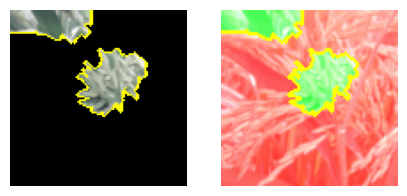

In [69]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Healthy_Images/healthy (415).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')

UnHealthy

1/1 [==============================] - 0s 71ms/step
Accuracy of this prediction is 9.578522e-06


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 168ms/step


  1%|          | 10/1000 [00:00<00:25, 39.50it/s]

1/1 [==============================] - 0s 200ms/step


  2%|▏         | 20/1000 [00:00<00:24, 39.22it/s]

1/1 [==============================] - 0s 214ms/step


  3%|▎         | 30/1000 [00:00<00:25, 37.31it/s]

1/1 [==============================] - 0s 183ms/step


  4%|▍         | 40/1000 [00:01<00:25, 37.28it/s]

1/1 [==============================] - 0s 180ms/step


  5%|▌         | 50/1000 [00:01<00:25, 37.70it/s]

1/1 [==============================] - 0s 199ms/step


  6%|▌         | 60/1000 [00:01<00:25, 37.01it/s]

1/1 [==============================] - 0s 188ms/step


  7%|▋         | 70/1000 [00:01<00:24, 38.13it/s]

1/1 [==============================] - 0s 200ms/step


  8%|▊         | 80/1000 [00:02<00:24, 37.86it/s]

1/1 [==============================] - 0s 171ms/step


  9%|▉         | 90/1000 [00:02<00:23, 38.45it/s]

1/1 [==============================] - 0s 204ms/step


 10%|█         | 100/1000 [00:02<00:24, 37.14it/s]

1/1 [==============================] - 0s 182ms/step


 11%|█         | 110/1000 [00:02<00:23, 37.85it/s]

1/1 [==============================] - 0s 213ms/step


 12%|█▏        | 120/1000 [00:03<00:23, 36.68it/s]

1/1 [==============================] - 0s 210ms/step


 13%|█▎        | 130/1000 [00:03<00:24, 36.18it/s]

1/1 [==============================] - 0s 205ms/step


 14%|█▍        | 140/1000 [00:03<00:23, 36.38it/s]

1/1 [==============================] - 0s 187ms/step


 15%|█▌        | 150/1000 [00:04<00:23, 36.64it/s]

1/1 [==============================] - 0s 193ms/step


 16%|█▌        | 160/1000 [00:04<00:22, 37.21it/s]

1/1 [==============================] - 0s 211ms/step


 17%|█▋        | 170/1000 [00:04<00:22, 36.58it/s]

1/1 [==============================] - 0s 177ms/step


 18%|█▊        | 180/1000 [00:04<00:22, 36.82it/s]

1/1 [==============================] - 0s 206ms/step


 19%|█▉        | 190/1000 [00:05<00:21, 36.94it/s]

1/1 [==============================] - 0s 183ms/step


 20%|██        | 200/1000 [00:05<00:21, 37.27it/s]

1/1 [==============================] - 0s 202ms/step


 21%|██        | 210/1000 [00:05<00:21, 36.51it/s]

1/1 [==============================] - 0s 193ms/step


 22%|██▏       | 220/1000 [00:05<00:21, 36.47it/s]

1/1 [==============================] - 0s 199ms/step


 23%|██▎       | 230/1000 [00:06<00:21, 36.42it/s]

1/1 [==============================] - 0s 206ms/step


 24%|██▍       | 240/1000 [00:06<00:21, 35.64it/s]

1/1 [==============================] - 0s 213ms/step


 25%|██▌       | 250/1000 [00:06<00:21, 35.01it/s]

1/1 [==============================] - 0s 192ms/step


 26%|██▌       | 260/1000 [00:07<00:20, 35.72it/s]

1/1 [==============================] - 0s 171ms/step


 27%|██▋       | 270/1000 [00:07<00:19, 36.66it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 280/1000 [00:07<00:19, 36.47it/s]

1/1 [==============================] - 0s 201ms/step


 29%|██▉       | 290/1000 [00:07<00:19, 35.81it/s]

1/1 [==============================] - 0s 205ms/step


 30%|███       | 300/1000 [00:08<00:19, 35.79it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███       | 310/1000 [00:08<00:19, 35.16it/s]

1/1 [==============================] - 0s 200ms/step


 32%|███▏      | 320/1000 [00:08<00:19, 35.24it/s]

1/1 [==============================] - 0s 170ms/step


 33%|███▎      | 330/1000 [00:08<00:18, 36.42it/s]

1/1 [==============================] - 0s 195ms/step


 34%|███▍      | 340/1000 [00:09<00:18, 36.51it/s]

1/1 [==============================] - 0s 207ms/step


 35%|███▌      | 350/1000 [00:09<00:18, 35.81it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 360/1000 [00:09<00:17, 35.98it/s]

1/1 [==============================] - 0s 205ms/step


 37%|███▋      | 370/1000 [00:10<00:17, 35.51it/s]

1/1 [==============================] - 0s 214ms/step


 38%|███▊      | 380/1000 [00:10<00:18, 34.35it/s]

1/1 [==============================] - 0s 207ms/step


 39%|███▉      | 390/1000 [00:10<00:17, 34.32it/s]

1/1 [==============================] - 0s 197ms/step


 40%|████      | 400/1000 [00:11<00:17, 34.47it/s]

1/1 [==============================] - 0s 186ms/step


 41%|████      | 410/1000 [00:11<00:16, 34.96it/s]

1/1 [==============================] - 0s 200ms/step


 42%|████▏     | 420/1000 [00:11<00:16, 34.68it/s]

1/1 [==============================] - 0s 205ms/step


 43%|████▎     | 430/1000 [00:11<00:16, 34.36it/s]

1/1 [==============================] - 0s 206ms/step


 44%|████▍     | 440/1000 [00:12<00:16, 34.10it/s]

1/1 [==============================] - 0s 218ms/step


 45%|████▌     | 450/1000 [00:12<00:16, 33.43it/s]

1/1 [==============================] - 0s 210ms/step


 46%|████▌     | 460/1000 [00:12<00:16, 33.43it/s]

1/1 [==============================] - 0s 195ms/step


 47%|████▋     | 470/1000 [00:13<00:15, 33.92it/s]

1/1 [==============================] - 0s 203ms/step


 48%|████▊     | 480/1000 [00:13<00:15, 34.04it/s]

1/1 [==============================] - 0s 199ms/step


 49%|████▉     | 490/1000 [00:13<00:15, 33.78it/s]

1/1 [==============================] - 0s 220ms/step


 50%|█████     | 500/1000 [00:13<00:15, 33.33it/s]

1/1 [==============================] - 0s 205ms/step


 51%|█████     | 510/1000 [00:14<00:14, 33.16it/s]

1/1 [==============================] - 0s 217ms/step


 52%|█████▏    | 520/1000 [00:14<00:14, 32.59it/s]

1/1 [==============================] - 0s 220ms/step


 53%|█████▎    | 530/1000 [00:14<00:14, 32.11it/s]

1/1 [==============================] - 0s 212ms/step


 54%|█████▍    | 540/1000 [00:15<00:14, 32.11it/s]

1/1 [==============================] - 0s 230ms/step


 55%|█████▌    | 550/1000 [00:15<00:14, 31.50it/s]

1/1 [==============================] - 0s 200ms/step


 56%|█████▌    | 560/1000 [00:15<00:13, 32.02it/s]

1/1 [==============================] - 0s 196ms/step


 57%|█████▋    | 570/1000 [00:16<00:13, 32.62it/s]

1/1 [==============================] - 0s 218ms/step


 58%|█████▊    | 580/1000 [00:16<00:13, 32.28it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████▉    | 590/1000 [00:16<00:12, 32.32it/s]

1/1 [==============================] - 0s 205ms/step


 60%|██████    | 600/1000 [00:17<00:12, 32.85it/s]

1/1 [==============================] - 0s 183ms/step


 61%|██████    | 610/1000 [00:17<00:11, 33.96it/s]

1/1 [==============================] - 0s 197ms/step


 62%|██████▏   | 620/1000 [00:17<00:11, 33.79it/s]

1/1 [==============================] - 0s 201ms/step


 63%|██████▎   | 630/1000 [00:17<00:11, 33.35it/s]

1/1 [==============================] - 0s 202ms/step


 64%|██████▍   | 640/1000 [00:18<00:10, 33.34it/s]

1/1 [==============================] - 0s 213ms/step


 65%|██████▌   | 650/1000 [00:18<00:10, 32.62it/s]

1/1 [==============================] - 0s 198ms/step


 66%|██████▌   | 660/1000 [00:18<00:10, 32.76it/s]

1/1 [==============================] - 0s 209ms/step


 67%|██████▋   | 670/1000 [00:19<00:10, 32.64it/s]

1/1 [==============================] - 0s 227ms/step


 68%|██████▊   | 680/1000 [00:19<00:09, 32.14it/s]

1/1 [==============================] - 0s 200ms/step


 69%|██████▉   | 690/1000 [00:19<00:09, 32.99it/s]

1/1 [==============================] - 0s 199ms/step


 70%|███████   | 700/1000 [00:20<00:08, 33.65it/s]

1/1 [==============================] - 0s 205ms/step


 71%|███████   | 710/1000 [00:20<00:08, 33.65it/s]

1/1 [==============================] - 0s 210ms/step


 72%|███████▏  | 720/1000 [00:20<00:08, 33.21it/s]

1/1 [==============================] - 0s 208ms/step


 73%|███████▎  | 730/1000 [00:20<00:08, 33.20it/s]

1/1 [==============================] - 0s 197ms/step


 74%|███████▍  | 740/1000 [00:21<00:07, 33.55it/s]

1/1 [==============================] - 0s 212ms/step


 75%|███████▌  | 750/1000 [00:21<00:07, 33.27it/s]

1/1 [==============================] - 0s 208ms/step


 76%|███████▌  | 760/1000 [00:21<00:07, 33.62it/s]

1/1 [==============================] - 0s 202ms/step


 77%|███████▋  | 770/1000 [00:22<00:06, 33.96it/s]

1/1 [==============================] - 0s 177ms/step


 78%|███████▊  | 780/1000 [00:22<00:06, 35.14it/s]

1/1 [==============================] - 0s 202ms/step


 79%|███████▉  | 790/1000 [00:22<00:06, 34.72it/s]

1/1 [==============================] - 0s 202ms/step


 80%|████████  | 800/1000 [00:23<00:05, 35.05it/s]

1/1 [==============================] - 0s 203ms/step


 81%|████████  | 810/1000 [00:23<00:05, 34.42it/s]

1/1 [==============================] - 0s 219ms/step


 82%|████████▏ | 820/1000 [00:23<00:05, 33.33it/s]

1/1 [==============================] - 0s 202ms/step


 83%|████████▎ | 830/1000 [00:23<00:05, 33.16it/s]

1/1 [==============================] - 0s 206ms/step


 84%|████████▍ | 840/1000 [00:24<00:04, 33.23it/s]

1/1 [==============================] - 0s 212ms/step


 85%|████████▌ | 850/1000 [00:24<00:04, 33.23it/s]

1/1 [==============================] - 0s 207ms/step


 86%|████████▌ | 860/1000 [00:24<00:04, 33.55it/s]

1/1 [==============================] - 0s 210ms/step


 87%|████████▋ | 870/1000 [00:25<00:03, 33.52it/s]

1/1 [==============================] - 0s 199ms/step


 88%|████████▊ | 880/1000 [00:25<00:03, 33.85it/s]

1/1 [==============================] - 0s 210ms/step


 89%|████████▉ | 890/1000 [00:25<00:03, 33.32it/s]

1/1 [==============================] - 0s 199ms/step


 90%|█████████ | 900/1000 [00:26<00:02, 33.58it/s]

1/1 [==============================] - 0s 213ms/step


 91%|█████████ | 910/1000 [00:26<00:02, 33.59it/s]

1/1 [==============================] - 0s 221ms/step


 92%|█████████▏| 920/1000 [00:26<00:02, 32.21it/s]

1/1 [==============================] - 0s 204ms/step


 93%|█████████▎| 930/1000 [00:26<00:02, 32.64it/s]

1/1 [==============================] - 0s 209ms/step


 94%|█████████▍| 940/1000 [00:27<00:01, 32.69it/s]

1/1 [==============================] - 0s 221ms/step


 95%|█████████▌| 950/1000 [00:27<00:01, 32.58it/s]

1/1 [==============================] - 0s 201ms/step


 96%|█████████▌| 960/1000 [00:27<00:01, 33.61it/s]

1/1 [==============================] - 0s 174ms/step


 97%|█████████▋| 970/1000 [00:28<00:00, 34.77it/s]

1/1 [==============================] - 0s 211ms/step


 98%|█████████▊| 980/1000 [00:28<00:00, 34.27it/s]

1/1 [==============================] - 0s 206ms/step


 99%|█████████▉| 990/1000 [00:28<00:00, 33.92it/s]

1/1 [==============================] - 0s 202ms/step


100%|██████████| 1000/1000 [00:29<00:00, 34.47it/s]


(-0.5, 99.5, 99.5, -0.5)

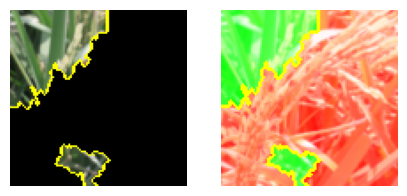

In [70]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (312).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 73ms/step
Accuracy of this prediction is 1.0131701e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 171ms/step


  1%|          | 10/1000 [00:00<00:25, 38.77it/s]

1/1 [==============================] - 0s 165ms/step


  2%|▏         | 20/1000 [00:00<00:23, 41.72it/s]

1/1 [==============================] - 0s 190ms/step


  3%|▎         | 30/1000 [00:00<00:24, 40.04it/s]

1/1 [==============================] - 0s 188ms/step


  4%|▍         | 40/1000 [00:01<00:25, 38.21it/s]

1/1 [==============================] - 0s 189ms/step


  5%|▌         | 50/1000 [00:01<00:25, 37.49it/s]

1/1 [==============================] - 0s 197ms/step


  6%|▌         | 60/1000 [00:01<00:25, 37.60it/s]

1/1 [==============================] - 0s 202ms/step


  7%|▋         | 70/1000 [00:01<00:24, 37.46it/s]

1/1 [==============================] - 0s 203ms/step


  8%|▊         | 80/1000 [00:02<00:24, 36.81it/s]

1/1 [==============================] - 0s 194ms/step


  9%|▉         | 90/1000 [00:02<00:24, 36.53it/s]

1/1 [==============================] - 0s 206ms/step


 10%|█         | 100/1000 [00:02<00:25, 35.83it/s]

1/1 [==============================] - 0s 215ms/step


 11%|█         | 110/1000 [00:02<00:24, 35.75it/s]

1/1 [==============================] - 0s 199ms/step


 12%|█▏        | 120/1000 [00:03<00:24, 35.68it/s]

1/1 [==============================] - 0s 195ms/step


 13%|█▎        | 130/1000 [00:03<00:24, 35.43it/s]

1/1 [==============================] - 0s 183ms/step


 14%|█▍        | 140/1000 [00:03<00:23, 36.18it/s]

1/1 [==============================] - 0s 186ms/step


 15%|█▌        | 150/1000 [00:04<00:23, 36.47it/s]

1/1 [==============================] - 0s 192ms/step


 16%|█▌        | 160/1000 [00:04<00:22, 36.60it/s]

1/1 [==============================] - 0s 194ms/step


 17%|█▋        | 170/1000 [00:04<00:22, 37.09it/s]

1/1 [==============================] - 0s 219ms/step


 18%|█▊        | 180/1000 [00:04<00:22, 35.89it/s]

1/1 [==============================] - 0s 207ms/step


 19%|█▉        | 190/1000 [00:05<00:22, 36.00it/s]

1/1 [==============================] - 0s 202ms/step


 20%|██        | 200/1000 [00:05<00:22, 36.28it/s]

1/1 [==============================] - 0s 191ms/step


 21%|██        | 210/1000 [00:05<00:21, 36.82it/s]

1/1 [==============================] - 0s 205ms/step


 22%|██▏       | 220/1000 [00:05<00:21, 36.19it/s]

1/1 [==============================] - 0s 208ms/step


 23%|██▎       | 230/1000 [00:06<00:21, 35.58it/s]

1/1 [==============================] - 0s 196ms/step


 24%|██▍       | 240/1000 [00:06<00:21, 35.36it/s]

1/1 [==============================] - 0s 190ms/step


 25%|██▌       | 250/1000 [00:06<00:20, 35.73it/s]

1/1 [==============================] - 0s 210ms/step


 26%|██▌       | 260/1000 [00:07<00:21, 33.86it/s]

1/1 [==============================] - 0s 184ms/step


 27%|██▋       | 270/1000 [00:07<00:21, 34.73it/s]

1/1 [==============================] - 0s 201ms/step


 28%|██▊       | 280/1000 [00:07<00:20, 34.81it/s]

1/1 [==============================] - 0s 212ms/step


 29%|██▉       | 290/1000 [00:08<00:21, 33.66it/s]

1/1 [==============================] - 0s 203ms/step


 30%|███       | 300/1000 [00:08<00:20, 33.79it/s]

1/1 [==============================] - 0s 209ms/step


 31%|███       | 310/1000 [00:08<00:20, 33.36it/s]

1/1 [==============================] - 0s 211ms/step


 32%|███▏      | 320/1000 [00:08<00:20, 33.30it/s]

1/1 [==============================] - 0s 196ms/step


 33%|███▎      | 330/1000 [00:09<00:19, 33.64it/s]

1/1 [==============================] - 0s 206ms/step


 34%|███▍      | 340/1000 [00:09<00:19, 33.62it/s]

1/1 [==============================] - 0s 190ms/step


 35%|███▌      | 350/1000 [00:09<00:19, 34.16it/s]

1/1 [==============================] - 0s 195ms/step


 36%|███▌      | 360/1000 [00:10<00:19, 33.66it/s]

1/1 [==============================] - 0s 215ms/step


 37%|███▋      | 370/1000 [00:10<00:19, 32.52it/s]

1/1 [==============================] - 0s 222ms/step


 38%|███▊      | 380/1000 [00:10<00:19, 31.74it/s]

1/1 [==============================] - 0s 212ms/step


 39%|███▉      | 390/1000 [00:11<00:19, 31.76it/s]

1/1 [==============================] - 0s 210ms/step


 40%|████      | 400/1000 [00:11<00:18, 31.61it/s]

1/1 [==============================] - 0s 212ms/step


 41%|████      | 410/1000 [00:11<00:18, 32.12it/s]

1/1 [==============================] - 0s 206ms/step


 42%|████▏     | 420/1000 [00:12<00:18, 32.21it/s]

1/1 [==============================] - 0s 205ms/step


 43%|████▎     | 430/1000 [00:12<00:17, 32.52it/s]

1/1 [==============================] - 0s 213ms/step


 44%|████▍     | 440/1000 [00:12<00:17, 32.40it/s]

1/1 [==============================] - 0s 213ms/step


 45%|████▌     | 450/1000 [00:12<00:17, 32.00it/s]

1/1 [==============================] - 0s 208ms/step


 46%|████▌     | 460/1000 [00:13<00:16, 32.14it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 470/1000 [00:13<00:16, 32.35it/s]

1/1 [==============================] - 0s 195ms/step


 48%|████▊     | 480/1000 [00:13<00:15, 32.95it/s]

1/1 [==============================] - 0s 201ms/step


 49%|████▉     | 490/1000 [00:14<00:15, 32.34it/s]

1/1 [==============================] - 0s 202ms/step


 50%|█████     | 500/1000 [00:14<00:15, 32.70it/s]

1/1 [==============================] - 0s 202ms/step


 51%|█████     | 510/1000 [00:14<00:14, 32.82it/s]

1/1 [==============================] - 0s 205ms/step


 52%|█████▏    | 520/1000 [00:15<00:14, 32.96it/s]

1/1 [==============================] - 0s 221ms/step


 53%|█████▎    | 530/1000 [00:15<00:14, 32.85it/s]

1/1 [==============================] - 0s 200ms/step


 54%|█████▍    | 540/1000 [00:15<00:13, 33.02it/s]

1/1 [==============================] - 0s 216ms/step


 55%|█████▌    | 550/1000 [00:16<00:13, 32.30it/s]

1/1 [==============================] - 0s 191ms/step


 56%|█████▌    | 560/1000 [00:16<00:13, 33.32it/s]

1/1 [==============================] - 0s 192ms/step


 57%|█████▋    | 570/1000 [00:16<00:12, 33.77it/s]

1/1 [==============================] - 0s 187ms/step


 58%|█████▊    | 580/1000 [00:16<00:12, 34.22it/s]

1/1 [==============================] - 0s 209ms/step


 59%|█████▉    | 590/1000 [00:17<00:12, 33.70it/s]

1/1 [==============================] - 0s 202ms/step


 60%|██████    | 600/1000 [00:17<00:11, 33.80it/s]

1/1 [==============================] - 0s 212ms/step


 61%|██████    | 610/1000 [00:17<00:11, 33.18it/s]

1/1 [==============================] - 0s 217ms/step


 62%|██████▏   | 620/1000 [00:18<00:11, 32.74it/s]

1/1 [==============================] - 0s 205ms/step


 63%|██████▎   | 630/1000 [00:18<00:11, 32.86it/s]

1/1 [==============================] - 0s 222ms/step


 64%|██████▍   | 640/1000 [00:18<00:11, 32.40it/s]

1/1 [==============================] - 0s 225ms/step


 65%|██████▌   | 650/1000 [00:19<00:11, 31.48it/s]

1/1 [==============================] - 0s 211ms/step


 66%|██████▌   | 660/1000 [00:19<00:10, 31.91it/s]

1/1 [==============================] - 0s 195ms/step


 67%|██████▋   | 670/1000 [00:19<00:10, 32.75it/s]

1/1 [==============================] - 0s 210ms/step


 68%|██████▊   | 680/1000 [00:19<00:09, 33.02it/s]

1/1 [==============================] - 0s 218ms/step


 69%|██████▉   | 690/1000 [00:20<00:09, 32.33it/s]

1/1 [==============================] - 0s 218ms/step


 70%|███████   | 700/1000 [00:20<00:09, 32.62it/s]

1/1 [==============================] - 0s 203ms/step


 71%|███████   | 710/1000 [00:20<00:08, 33.19it/s]

1/1 [==============================] - 0s 214ms/step


 72%|███████▏  | 720/1000 [00:21<00:08, 32.88it/s]

1/1 [==============================] - 0s 191ms/step


 73%|███████▎  | 730/1000 [00:21<00:08, 33.73it/s]

1/1 [==============================] - 0s 216ms/step


 74%|███████▍  | 740/1000 [00:21<00:07, 33.46it/s]

1/1 [==============================] - 0s 207ms/step


 75%|███████▌  | 750/1000 [00:22<00:07, 33.59it/s]

1/1 [==============================] - 0s 202ms/step


 76%|███████▌  | 760/1000 [00:22<00:07, 33.68it/s]

1/1 [==============================] - 0s 205ms/step


 77%|███████▋  | 770/1000 [00:22<00:06, 33.72it/s]

1/1 [==============================] - 0s 209ms/step


 78%|███████▊  | 780/1000 [00:22<00:06, 33.74it/s]

1/1 [==============================] - 0s 202ms/step


 79%|███████▉  | 790/1000 [00:23<00:06, 34.00it/s]

1/1 [==============================] - 0s 210ms/step


 80%|████████  | 800/1000 [00:23<00:05, 34.05it/s]

1/1 [==============================] - 0s 204ms/step


 81%|████████  | 810/1000 [00:23<00:05, 33.58it/s]

1/1 [==============================] - 0s 235ms/step


 82%|████████▏ | 820/1000 [00:24<00:05, 30.92it/s]

1/1 [==============================] - 0s 215ms/step


 83%|████████▎ | 830/1000 [00:24<00:05, 30.87it/s]

1/1 [==============================] - 0s 193ms/step


 84%|████████▍ | 840/1000 [00:24<00:05, 31.55it/s]

1/1 [==============================] - 0s 195ms/step


 85%|████████▌ | 850/1000 [00:25<00:04, 31.62it/s]

1/1 [==============================] - 0s 212ms/step


 86%|████████▌ | 860/1000 [00:25<00:04, 31.76it/s]

1/1 [==============================] - 0s 212ms/step


 87%|████████▋ | 870/1000 [00:25<00:03, 32.82it/s]

1/1 [==============================] - 0s 214ms/step


 88%|████████▊ | 880/1000 [00:26<00:03, 32.19it/s]

1/1 [==============================] - 0s 242ms/step


 89%|████████▉ | 890/1000 [00:26<00:03, 30.10it/s]

1/1 [==============================] - 0s 215ms/step


 90%|█████████ | 900/1000 [00:26<00:03, 30.34it/s]

1/1 [==============================] - 0s 216ms/step


 91%|█████████ | 910/1000 [00:27<00:02, 30.49it/s]

1/1 [==============================] - 0s 211ms/step


 92%|█████████▏| 920/1000 [00:27<00:02, 31.08it/s]

1/1 [==============================] - 0s 206ms/step


 93%|█████████▎| 930/1000 [00:27<00:02, 31.65it/s]

1/1 [==============================] - 0s 222ms/step


 94%|█████████▍| 940/1000 [00:28<00:01, 30.96it/s]

1/1 [==============================] - 0s 209ms/step


 95%|█████████▌| 950/1000 [00:28<00:01, 31.67it/s]

1/1 [==============================] - 0s 210ms/step


 96%|█████████▌| 960/1000 [00:28<00:01, 32.17it/s]

1/1 [==============================] - 0s 201ms/step


 97%|█████████▋| 970/1000 [00:28<00:00, 32.72it/s]

1/1 [==============================] - 0s 219ms/step


 98%|█████████▊| 980/1000 [00:29<00:00, 32.92it/s]

1/1 [==============================] - 0s 203ms/step


 99%|█████████▉| 990/1000 [00:29<00:00, 33.30it/s]

1/1 [==============================] - 0s 185ms/step


100%|██████████| 1000/1000 [00:29<00:00, 33.54it/s]


(-0.5, 99.5, 99.5, -0.5)

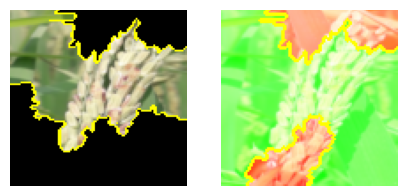

In [71]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (270).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 75ms/step
Accuracy of this prediction is 9.625965e-06


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 169ms/step


  1%|          | 10/1000 [00:00<00:23, 42.79it/s]

1/1 [==============================] - 0s 165ms/step


  2%|▏         | 20/1000 [00:00<00:22, 43.18it/s]

1/1 [==============================] - 0s 185ms/step


  3%|▎         | 30/1000 [00:00<00:23, 41.35it/s]

1/1 [==============================] - 0s 209ms/step


  4%|▍         | 40/1000 [00:01<00:25, 38.37it/s]

1/1 [==============================] - 0s 188ms/step


  5%|▌         | 50/1000 [00:01<00:25, 37.97it/s]

1/1 [==============================] - 0s 198ms/step


  6%|▌         | 60/1000 [00:01<00:24, 38.05it/s]

1/1 [==============================] - 0s 198ms/step


  7%|▋         | 70/1000 [00:01<00:24, 37.83it/s]

1/1 [==============================] - 0s 221ms/step


  8%|▊         | 80/1000 [00:02<00:25, 36.45it/s]

1/1 [==============================] - 0s 210ms/step


  9%|▉         | 90/1000 [00:02<00:25, 35.82it/s]

1/1 [==============================] - 0s 204ms/step


 10%|█         | 100/1000 [00:02<00:24, 36.26it/s]

1/1 [==============================] - 0s 173ms/step


 11%|█         | 110/1000 [00:02<00:23, 37.62it/s]

1/1 [==============================] - 0s 186ms/step


 12%|█▏        | 120/1000 [00:03<00:22, 38.44it/s]

1/1 [==============================] - 0s 193ms/step


 13%|█▎        | 130/1000 [00:03<00:22, 38.64it/s]

1/1 [==============================] - 0s 193ms/step


 14%|█▍        | 140/1000 [00:03<00:22, 38.43it/s]

1/1 [==============================] - 0s 189ms/step


 15%|█▌        | 150/1000 [00:03<00:22, 38.31it/s]

1/1 [==============================] - 0s 185ms/step


 16%|█▌        | 160/1000 [00:04<00:21, 38.59it/s]

1/1 [==============================] - 0s 201ms/step


 17%|█▋        | 170/1000 [00:04<00:21, 38.42it/s]

1/1 [==============================] - 0s 182ms/step


 18%|█▊        | 180/1000 [00:04<00:21, 38.77it/s]

1/1 [==============================] - 0s 189ms/step


 19%|█▉        | 190/1000 [00:04<00:21, 38.16it/s]

1/1 [==============================] - 0s 193ms/step


 20%|██        | 200/1000 [00:05<00:21, 38.00it/s]

1/1 [==============================] - 0s 184ms/step


 21%|██        | 210/1000 [00:05<00:20, 38.33it/s]

1/1 [==============================] - 0s 180ms/step


 22%|██▏       | 220/1000 [00:05<00:20, 38.29it/s]

1/1 [==============================] - 0s 203ms/step


 23%|██▎       | 230/1000 [00:06<00:20, 37.07it/s]

1/1 [==============================] - 0s 194ms/step


 24%|██▍       | 240/1000 [00:06<00:20, 37.01it/s]

1/1 [==============================] - 0s 185ms/step


 25%|██▌       | 250/1000 [00:06<00:20, 37.25it/s]

1/1 [==============================] - 0s 191ms/step


 26%|██▌       | 260/1000 [00:06<00:19, 37.59it/s]

1/1 [==============================] - 0s 208ms/step


 27%|██▋       | 270/1000 [00:07<00:19, 37.58it/s]

1/1 [==============================] - 0s 199ms/step


 28%|██▊       | 280/1000 [00:07<00:19, 37.23it/s]

1/1 [==============================] - 0s 209ms/step


 29%|██▉       | 290/1000 [00:07<00:19, 36.09it/s]

1/1 [==============================] - 0s 183ms/step


 30%|███       | 300/1000 [00:07<00:19, 36.75it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███       | 310/1000 [00:08<00:19, 36.15it/s]

1/1 [==============================] - 0s 197ms/step


 32%|███▏      | 320/1000 [00:08<00:18, 36.27it/s]

1/1 [==============================] - 0s 179ms/step


 33%|███▎      | 330/1000 [00:08<00:18, 36.34it/s]

1/1 [==============================] - 0s 175ms/step


 34%|███▍      | 340/1000 [00:09<00:17, 37.86it/s]

1/1 [==============================] - 0s 221ms/step


 35%|███▌      | 350/1000 [00:09<00:17, 36.96it/s]

1/1 [==============================] - 0s 202ms/step


 36%|███▌      | 360/1000 [00:09<00:17, 36.15it/s]

1/1 [==============================] - 0s 192ms/step


 37%|███▋      | 370/1000 [00:09<00:17, 36.07it/s]

1/1 [==============================] - 0s 200ms/step


 38%|███▊      | 380/1000 [00:10<00:17, 35.72it/s]

1/1 [==============================] - 0s 191ms/step


 39%|███▉      | 390/1000 [00:10<00:16, 36.20it/s]

1/1 [==============================] - 0s 204ms/step


 40%|████      | 400/1000 [00:10<00:16, 35.54it/s]

1/1 [==============================] - 0s 213ms/step


 41%|████      | 410/1000 [00:11<00:16, 34.89it/s]

1/1 [==============================] - 0s 199ms/step


 42%|████▏     | 420/1000 [00:11<00:16, 34.57it/s]

1/1 [==============================] - 0s 213ms/step


 43%|████▎     | 430/1000 [00:11<00:16, 33.97it/s]

1/1 [==============================] - 0s 200ms/step


 44%|████▍     | 440/1000 [00:11<00:16, 34.21it/s]

1/1 [==============================] - 0s 206ms/step


 45%|████▌     | 450/1000 [00:12<00:16, 33.67it/s]

1/1 [==============================] - 0s 216ms/step


 46%|████▌     | 460/1000 [00:12<00:16, 32.99it/s]

1/1 [==============================] - 0s 219ms/step


 47%|████▋     | 470/1000 [00:12<00:16, 32.43it/s]

1/1 [==============================] - 0s 222ms/step


 48%|████▊     | 480/1000 [00:13<00:16, 31.99it/s]

1/1 [==============================] - 0s 208ms/step


 49%|████▉     | 490/1000 [00:13<00:15, 32.86it/s]

1/1 [==============================] - 0s 197ms/step


 50%|█████     | 500/1000 [00:13<00:15, 33.16it/s]

1/1 [==============================] - 0s 227ms/step


 51%|█████     | 510/1000 [00:14<00:15, 31.77it/s]

1/1 [==============================] - 0s 209ms/step


 52%|█████▏    | 520/1000 [00:14<00:14, 32.41it/s]

1/1 [==============================] - 0s 211ms/step


 53%|█████▎    | 530/1000 [00:14<00:14, 32.52it/s]

1/1 [==============================] - 0s 224ms/step


 54%|█████▍    | 540/1000 [00:15<00:14, 32.25it/s]

1/1 [==============================] - 0s 203ms/step


 55%|█████▌    | 550/1000 [00:15<00:13, 32.96it/s]

1/1 [==============================] - 0s 190ms/step


 56%|█████▌    | 560/1000 [00:15<00:13, 33.69it/s]

1/1 [==============================] - 0s 193ms/step


 57%|█████▋    | 570/1000 [00:15<00:12, 34.06it/s]

1/1 [==============================] - 0s 214ms/step


 58%|█████▊    | 580/1000 [00:16<00:12, 33.14it/s]

1/1 [==============================] - 0s 213ms/step


 59%|█████▉    | 590/1000 [00:16<00:12, 33.17it/s]

1/1 [==============================] - 0s 191ms/step


 60%|██████    | 600/1000 [00:16<00:12, 33.27it/s]

1/1 [==============================] - 0s 220ms/step


 61%|██████    | 610/1000 [00:17<00:11, 32.73it/s]

1/1 [==============================] - 0s 208ms/step


 62%|██████▏   | 620/1000 [00:17<00:11, 32.96it/s]

1/1 [==============================] - 0s 190ms/step


 63%|██████▎   | 630/1000 [00:17<00:10, 34.19it/s]

1/1 [==============================] - 0s 187ms/step


 64%|██████▍   | 640/1000 [00:17<00:10, 34.64it/s]

1/1 [==============================] - 0s 215ms/step


 65%|██████▌   | 650/1000 [00:18<00:10, 33.88it/s]

1/1 [==============================] - 0s 204ms/step


 66%|██████▌   | 660/1000 [00:18<00:10, 33.75it/s]

1/1 [==============================] - 0s 212ms/step


 67%|██████▋   | 670/1000 [00:18<00:09, 33.36it/s]

1/1 [==============================] - 0s 205ms/step


 68%|██████▊   | 680/1000 [00:19<00:09, 33.30it/s]

1/1 [==============================] - 0s 218ms/step


 69%|██████▉   | 690/1000 [00:19<00:09, 32.40it/s]

1/1 [==============================] - 0s 198ms/step


 70%|███████   | 700/1000 [00:19<00:09, 33.18it/s]

1/1 [==============================] - 0s 218ms/step


 71%|███████   | 710/1000 [00:20<00:08, 32.81it/s]

1/1 [==============================] - 0s 213ms/step


 72%|███████▏  | 720/1000 [00:20<00:08, 32.79it/s]

1/1 [==============================] - 0s 223ms/step


 73%|███████▎  | 730/1000 [00:20<00:08, 32.54it/s]

1/1 [==============================] - 0s 205ms/step


 74%|███████▍  | 740/1000 [00:21<00:07, 32.66it/s]

1/1 [==============================] - 0s 206ms/step


 75%|███████▌  | 750/1000 [00:21<00:07, 32.90it/s]

1/1 [==============================] - 0s 201ms/step


 76%|███████▌  | 760/1000 [00:21<00:07, 33.10it/s]

1/1 [==============================] - 0s 210ms/step


 77%|███████▋  | 770/1000 [00:21<00:06, 32.88it/s]

1/1 [==============================] - 0s 210ms/step


 78%|███████▊  | 780/1000 [00:22<00:06, 33.29it/s]

1/1 [==============================] - 0s 214ms/step


 79%|███████▉  | 790/1000 [00:22<00:06, 33.55it/s]

1/1 [==============================] - 0s 202ms/step


 80%|████████  | 800/1000 [00:22<00:05, 33.54it/s]

1/1 [==============================] - 0s 216ms/step


 81%|████████  | 810/1000 [00:23<00:05, 32.76it/s]

1/1 [==============================] - 0s 218ms/step


 82%|████████▏ | 820/1000 [00:23<00:05, 32.58it/s]

1/1 [==============================] - 0s 193ms/step


 83%|████████▎ | 830/1000 [00:23<00:05, 33.24it/s]

1/1 [==============================] - 0s 184ms/step


 84%|████████▍ | 840/1000 [00:23<00:04, 34.25it/s]

1/1 [==============================] - 0s 210ms/step


 85%|████████▌ | 850/1000 [00:24<00:04, 33.64it/s]

1/1 [==============================] - 0s 211ms/step


 86%|████████▌ | 860/1000 [00:24<00:04, 33.62it/s]

1/1 [==============================] - 0s 211ms/step


 87%|████████▋ | 870/1000 [00:24<00:03, 33.25it/s]

1/1 [==============================] - 0s 210ms/step


 88%|████████▊ | 880/1000 [00:25<00:03, 33.50it/s]

1/1 [==============================] - 0s 189ms/step


 89%|████████▉ | 890/1000 [00:25<00:03, 34.25it/s]

1/1 [==============================] - 0s 219ms/step


 90%|█████████ | 900/1000 [00:25<00:02, 34.51it/s]

1/1 [==============================] - 0s 226ms/step


 91%|█████████ | 910/1000 [00:26<00:02, 33.63it/s]

1/1 [==============================] - 0s 220ms/step


 92%|█████████▏| 920/1000 [00:26<00:02, 33.04it/s]

1/1 [==============================] - 0s 198ms/step


 93%|█████████▎| 930/1000 [00:26<00:02, 33.56it/s]

1/1 [==============================] - 0s 190ms/step


 94%|█████████▍| 940/1000 [00:26<00:01, 34.17it/s]

1/1 [==============================] - 0s 207ms/step


 95%|█████████▌| 950/1000 [00:27<00:01, 34.30it/s]

1/1 [==============================] - 0s 189ms/step


 96%|█████████▌| 960/1000 [00:27<00:01, 34.54it/s]

1/1 [==============================] - 0s 194ms/step


 97%|█████████▋| 970/1000 [00:27<00:00, 34.82it/s]

1/1 [==============================] - 0s 198ms/step


 98%|█████████▊| 980/1000 [00:28<00:00, 34.45it/s]

1/1 [==============================] - 0s 200ms/step


 99%|█████████▉| 990/1000 [00:28<00:00, 34.40it/s]

1/1 [==============================] - 0s 195ms/step


100%|██████████| 1000/1000 [00:28<00:00, 34.85it/s]


(-0.5, 99.5, 99.5, -0.5)

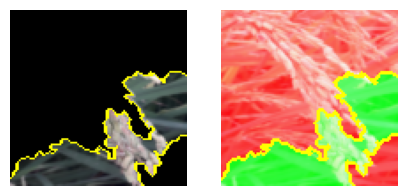

In [72]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (284).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 121ms/step
Accuracy of this prediction is 1.0425537e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 212ms/step


  1%|          | 10/1000 [00:00<00:29, 33.11it/s]

1/1 [==============================] - 0s 249ms/step


  2%|▏         | 20/1000 [00:00<00:32, 30.02it/s]

1/1 [==============================] - 0s 283ms/step


  3%|▎         | 30/1000 [00:01<00:35, 27.16it/s]

1/1 [==============================] - 0s 254ms/step


  4%|▍         | 40/1000 [00:01<00:37, 25.86it/s]

1/1 [==============================] - 0s 186ms/step


  5%|▌         | 50/1000 [00:01<00:34, 27.41it/s]

1/1 [==============================] - 0s 174ms/step


  6%|▌         | 60/1000 [00:02<00:30, 30.85it/s]

1/1 [==============================] - 0s 193ms/step


  7%|▋         | 70/1000 [00:02<00:28, 32.76it/s]

1/1 [==============================] - 0s 194ms/step


  8%|▊         | 80/1000 [00:02<00:27, 33.87it/s]

1/1 [==============================] - 0s 189ms/step


  9%|▉         | 90/1000 [00:02<00:26, 34.96it/s]

1/1 [==============================] - 0s 190ms/step


 10%|█         | 100/1000 [00:03<00:25, 35.80it/s]

1/1 [==============================] - 0s 191ms/step


 11%|█         | 110/1000 [00:03<00:24, 36.53it/s]

1/1 [==============================] - 0s 192ms/step


 12%|█▏        | 120/1000 [00:03<00:24, 36.59it/s]

1/1 [==============================] - 0s 204ms/step


 13%|█▎        | 130/1000 [00:03<00:24, 36.19it/s]

1/1 [==============================] - 0s 181ms/step


 14%|█▍        | 140/1000 [00:04<00:23, 37.12it/s]

1/1 [==============================] - 0s 192ms/step


 15%|█▌        | 150/1000 [00:04<00:22, 37.53it/s]

1/1 [==============================] - 0s 204ms/step


 16%|█▌        | 160/1000 [00:04<00:23, 36.34it/s]

1/1 [==============================] - 0s 207ms/step


 17%|█▋        | 170/1000 [00:05<00:23, 35.87it/s]

1/1 [==============================] - 0s 217ms/step


 18%|█▊        | 180/1000 [00:05<00:23, 34.96it/s]

1/1 [==============================] - 0s 217ms/step


 19%|█▉        | 190/1000 [00:05<00:23, 34.53it/s]

1/1 [==============================] - 0s 206ms/step


 20%|██        | 200/1000 [00:05<00:23, 34.63it/s]

1/1 [==============================] - 0s 186ms/step


 21%|██        | 210/1000 [00:06<00:22, 35.59it/s]

1/1 [==============================] - 0s 198ms/step


 22%|██▏       | 220/1000 [00:06<00:21, 36.04it/s]

1/1 [==============================] - 0s 182ms/step


 23%|██▎       | 230/1000 [00:06<00:21, 36.35it/s]

1/1 [==============================] - 0s 179ms/step


 24%|██▍       | 240/1000 [00:06<00:20, 37.43it/s]

1/1 [==============================] - 0s 179ms/step


 25%|██▌       | 250/1000 [00:07<00:19, 38.33it/s]

1/1 [==============================] - 0s 173ms/step


 26%|██▌       | 260/1000 [00:07<00:18, 39.25it/s]

1/1 [==============================] - 0s 182ms/step


 27%|██▋       | 270/1000 [00:07<00:18, 38.75it/s]

1/1 [==============================] - 0s 178ms/step


 28%|██▊       | 280/1000 [00:07<00:18, 39.44it/s]

1/1 [==============================] - 0s 173ms/step


 29%|██▉       | 290/1000 [00:08<00:17, 40.24it/s]

1/1 [==============================] - 0s 172ms/step


 30%|███       | 300/1000 [00:08<00:17, 40.73it/s]

1/1 [==============================] - 0s 183ms/step


 31%|███       | 310/1000 [00:08<00:17, 40.51it/s]

1/1 [==============================] - 0s 175ms/step


 32%|███▏      | 320/1000 [00:08<00:16, 40.52it/s]

1/1 [==============================] - 0s 173ms/step


 33%|███▎      | 330/1000 [00:09<00:16, 40.83it/s]

1/1 [==============================] - 0s 175ms/step


 34%|███▍      | 340/1000 [00:09<00:16, 40.84it/s]

1/1 [==============================] - 0s 181ms/step


 35%|███▌      | 350/1000 [00:09<00:16, 40.61it/s]

1/1 [==============================] - 0s 181ms/step


 36%|███▌      | 360/1000 [00:09<00:16, 39.97it/s]

1/1 [==============================] - 0s 189ms/step


 37%|███▋      | 370/1000 [00:10<00:15, 39.47it/s]

1/1 [==============================] - 0s 257ms/step


 38%|███▊      | 380/1000 [00:10<00:17, 36.22it/s]

1/1 [==============================] - 0s 197ms/step


 39%|███▉      | 390/1000 [00:10<00:16, 36.10it/s]

1/1 [==============================] - 0s 239ms/step


 40%|████      | 400/1000 [00:11<00:17, 34.51it/s]

1/1 [==============================] - 0s 194ms/step


 41%|████      | 410/1000 [00:11<00:17, 34.63it/s]

1/1 [==============================] - 0s 175ms/step


 42%|████▏     | 420/1000 [00:11<00:16, 36.17it/s]

1/1 [==============================] - 0s 170ms/step


 43%|████▎     | 430/1000 [00:11<00:15, 35.70it/s]

1/1 [==============================] - 0s 165ms/step


 44%|████▍     | 440/1000 [00:12<00:14, 37.49it/s]

1/1 [==============================] - 0s 162ms/step


 45%|████▌     | 450/1000 [00:12<00:14, 38.94it/s]

1/1 [==============================] - 0s 163ms/step


 46%|████▌     | 460/1000 [00:12<00:13, 40.34it/s]

1/1 [==============================] - 0s 158ms/step


 47%|████▋     | 470/1000 [00:12<00:12, 41.78it/s]

1/1 [==============================] - 0s 161ms/step


 48%|████▊     | 480/1000 [00:13<00:12, 42.71it/s]

1/1 [==============================] - 0s 158ms/step


 49%|████▉     | 490/1000 [00:13<00:11, 43.46it/s]

1/1 [==============================] - 0s 166ms/step


 50%|█████     | 500/1000 [00:13<00:11, 43.61it/s]

1/1 [==============================] - 0s 158ms/step


 51%|█████     | 510/1000 [00:13<00:11, 44.00it/s]

1/1 [==============================] - 0s 163ms/step


 52%|█████▏    | 520/1000 [00:13<00:10, 44.04it/s]

1/1 [==============================] - 0s 152ms/step


 53%|█████▎    | 530/1000 [00:14<00:10, 44.91it/s]

1/1 [==============================] - 0s 154ms/step


 54%|█████▍    | 540/1000 [00:14<00:10, 45.05it/s]

1/1 [==============================] - 0s 164ms/step


 55%|█████▌    | 550/1000 [00:14<00:10, 44.77it/s]

1/1 [==============================] - 0s 165ms/step


 56%|█████▌    | 560/1000 [00:14<00:09, 44.17it/s]

1/1 [==============================] - 0s 159ms/step


 57%|█████▋    | 570/1000 [00:15<00:09, 44.31it/s]

1/1 [==============================] - 0s 167ms/step


 58%|█████▊    | 580/1000 [00:15<00:09, 44.10it/s]

1/1 [==============================] - 0s 161ms/step


 59%|█████▉    | 590/1000 [00:15<00:09, 44.37it/s]

1/1 [==============================] - 0s 165ms/step


 60%|██████    | 600/1000 [00:15<00:09, 44.34it/s]

1/1 [==============================] - 0s 160ms/step


 61%|██████    | 610/1000 [00:15<00:08, 44.41it/s]

1/1 [==============================] - 0s 158ms/step


 62%|██████▏   | 620/1000 [00:16<00:08, 44.68it/s]

1/1 [==============================] - 0s 160ms/step


 63%|██████▎   | 630/1000 [00:16<00:08, 44.32it/s]

1/1 [==============================] - 0s 168ms/step


 64%|██████▍   | 640/1000 [00:16<00:08, 44.10it/s]

1/1 [==============================] - 0s 153ms/step


 65%|██████▌   | 650/1000 [00:16<00:07, 44.23it/s]

1/1 [==============================] - 0s 157ms/step


 66%|██████▌   | 660/1000 [00:17<00:07, 44.61it/s]

1/1 [==============================] - 0s 158ms/step


 67%|██████▋   | 670/1000 [00:17<00:07, 44.91it/s]

1/1 [==============================] - 0s 164ms/step


 68%|██████▊   | 680/1000 [00:17<00:07, 44.78it/s]

1/1 [==============================] - 0s 171ms/step


 69%|██████▉   | 690/1000 [00:17<00:07, 44.16it/s]

1/1 [==============================] - 0s 159ms/step


 70%|███████   | 700/1000 [00:18<00:06, 44.29it/s]

1/1 [==============================] - 0s 159ms/step


 71%|███████   | 710/1000 [00:18<00:06, 44.34it/s]

1/1 [==============================] - 0s 158ms/step


 72%|███████▏  | 720/1000 [00:18<00:06, 44.14it/s]

1/1 [==============================] - 0s 172ms/step


 73%|███████▎  | 730/1000 [00:18<00:06, 43.57it/s]

1/1 [==============================] - 0s 161ms/step


 74%|███████▍  | 740/1000 [00:18<00:05, 43.33it/s]

1/1 [==============================] - 0s 159ms/step


 75%|███████▌  | 750/1000 [00:19<00:05, 43.31it/s]

1/1 [==============================] - 0s 160ms/step


 76%|███████▌  | 760/1000 [00:19<00:05, 43.72it/s]

1/1 [==============================] - 0s 163ms/step


 77%|███████▋  | 770/1000 [00:19<00:05, 43.87it/s]

1/1 [==============================] - 0s 167ms/step


 78%|███████▊  | 780/1000 [00:19<00:05, 43.64it/s]

1/1 [==============================] - 0s 161ms/step


 79%|███████▉  | 790/1000 [00:20<00:04, 44.07it/s]

1/1 [==============================] - 0s 158ms/step


 80%|████████  | 800/1000 [00:20<00:04, 44.49it/s]

1/1 [==============================] - 0s 165ms/step


 81%|████████  | 810/1000 [00:20<00:04, 43.99it/s]

1/1 [==============================] - 0s 167ms/step


 82%|████████▏ | 820/1000 [00:20<00:04, 43.93it/s]

1/1 [==============================] - 0s 156ms/step


 83%|████████▎ | 830/1000 [00:20<00:03, 44.52it/s]

1/1 [==============================] - 0s 238ms/step


 84%|████████▍ | 840/1000 [00:21<00:04, 36.38it/s]

1/1 [==============================] - 0s 230ms/step


 85%|████████▌ | 850/1000 [00:21<00:04, 33.61it/s]

1/1 [==============================] - 0s 224ms/step


 86%|████████▌ | 860/1000 [00:22<00:04, 32.34it/s]

1/1 [==============================] - 0s 214ms/step


 87%|████████▋ | 870/1000 [00:22<00:03, 32.62it/s]

1/1 [==============================] - 0s 165ms/step


 88%|████████▊ | 880/1000 [00:22<00:03, 34.21it/s]

1/1 [==============================] - 0s 217ms/step


 89%|████████▉ | 890/1000 [00:22<00:03, 33.07it/s]

1/1 [==============================] - 0s 215ms/step


 90%|█████████ | 900/1000 [00:23<00:03, 32.39it/s]

1/1 [==============================] - 0s 209ms/step


 91%|█████████ | 910/1000 [00:23<00:02, 32.84it/s]

1/1 [==============================] - 0s 189ms/step


 92%|█████████▏| 920/1000 [00:23<00:02, 34.04it/s]

1/1 [==============================] - 0s 220ms/step


 93%|█████████▎| 930/1000 [00:24<00:02, 33.79it/s]

1/1 [==============================] - 0s 204ms/step


 94%|█████████▍| 940/1000 [00:24<00:01, 34.30it/s]

1/1 [==============================] - 0s 213ms/step


 95%|█████████▌| 950/1000 [00:24<00:01, 34.65it/s]

1/1 [==============================] - 0s 209ms/step


 96%|█████████▌| 960/1000 [00:25<00:01, 33.95it/s]

1/1 [==============================] - 0s 206ms/step


 97%|█████████▋| 970/1000 [00:25<00:00, 34.51it/s]

1/1 [==============================] - 0s 183ms/step


 98%|█████████▊| 980/1000 [00:25<00:00, 35.04it/s]

1/1 [==============================] - 0s 193ms/step


 99%|█████████▉| 990/1000 [00:25<00:00, 35.73it/s]

1/1 [==============================] - 0s 228ms/step


100%|██████████| 1000/1000 [00:26<00:00, 38.25it/s]


(-0.5, 99.5, 99.5, -0.5)

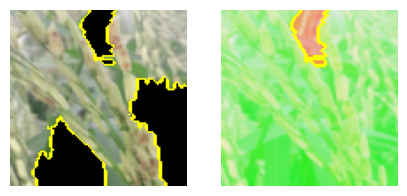

In [73]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (297).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 74ms/step
Accuracy of this prediction is 1.01151045e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 184ms/step


  1%|          | 10/1000 [00:00<00:25, 38.97it/s]

1/1 [==============================] - 0s 212ms/step


  2%|▏         | 20/1000 [00:00<00:26, 37.42it/s]

1/1 [==============================] - 0s 190ms/step


  3%|▎         | 30/1000 [00:00<00:25, 37.60it/s]

1/1 [==============================] - 0s 207ms/step


  4%|▍         | 40/1000 [00:01<00:26, 36.29it/s]

1/1 [==============================] - 0s 207ms/step


  5%|▌         | 50/1000 [00:01<00:26, 36.47it/s]

1/1 [==============================] - 0s 202ms/step


  6%|▌         | 60/1000 [00:01<00:25, 36.75it/s]

1/1 [==============================] - 0s 219ms/step


  7%|▋         | 70/1000 [00:01<00:26, 35.14it/s]

1/1 [==============================] - 0s 210ms/step


  8%|▊         | 80/1000 [00:02<00:26, 34.84it/s]

1/1 [==============================] - 0s 209ms/step


  9%|▉         | 90/1000 [00:02<00:26, 34.66it/s]

1/1 [==============================] - 0s 157ms/step


 10%|█         | 100/1000 [00:02<00:24, 36.63it/s]

1/1 [==============================] - 0s 200ms/step


 11%|█         | 110/1000 [00:03<00:24, 36.85it/s]

1/1 [==============================] - 0s 208ms/step


 12%|█▏        | 120/1000 [00:03<00:24, 36.13it/s]

1/1 [==============================] - 0s 205ms/step


 13%|█▎        | 130/1000 [00:03<00:23, 36.60it/s]

1/1 [==============================] - 0s 221ms/step


 14%|█▍        | 140/1000 [00:03<00:24, 35.62it/s]

1/1 [==============================] - 0s 219ms/step


 15%|█▌        | 150/1000 [00:04<00:24, 35.35it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 160/1000 [00:04<00:23, 35.73it/s]

1/1 [==============================] - 0s 192ms/step


 17%|█▋        | 170/1000 [00:04<00:22, 36.58it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 180/1000 [00:04<00:22, 37.25it/s]

1/1 [==============================] - 0s 221ms/step


 19%|█▉        | 190/1000 [00:05<00:22, 36.55it/s]

1/1 [==============================] - 0s 195ms/step


 20%|██        | 200/1000 [00:05<00:21, 36.93it/s]

1/1 [==============================] - 0s 198ms/step


 21%|██        | 210/1000 [00:05<00:21, 36.28it/s]

1/1 [==============================] - 0s 204ms/step


 22%|██▏       | 220/1000 [00:06<00:21, 36.55it/s]

1/1 [==============================] - 0s 201ms/step


 23%|██▎       | 230/1000 [00:06<00:20, 36.78it/s]

1/1 [==============================] - 0s 200ms/step


 24%|██▍       | 240/1000 [00:06<00:21, 35.73it/s]

1/1 [==============================] - 0s 222ms/step


 25%|██▌       | 250/1000 [00:06<00:21, 34.72it/s]

1/1 [==============================] - 0s 208ms/step


 26%|██▌       | 260/1000 [00:07<00:21, 34.99it/s]

1/1 [==============================] - 0s 200ms/step


 27%|██▋       | 270/1000 [00:07<00:20, 35.66it/s]

1/1 [==============================] - 0s 184ms/step


 28%|██▊       | 280/1000 [00:07<00:20, 35.95it/s]

1/1 [==============================] - 0s 204ms/step


 29%|██▉       | 290/1000 [00:08<00:19, 36.75it/s]

1/1 [==============================] - 0s 204ms/step


 30%|███       | 300/1000 [00:08<00:19, 36.72it/s]

1/1 [==============================] - 0s 201ms/step


 31%|███       | 310/1000 [00:08<00:18, 36.73it/s]

1/1 [==============================] - 0s 210ms/step


 32%|███▏      | 320/1000 [00:08<00:18, 36.04it/s]

1/1 [==============================] - 0s 203ms/step


 33%|███▎      | 330/1000 [00:09<00:18, 35.52it/s]

1/1 [==============================] - 0s 197ms/step


 34%|███▍      | 340/1000 [00:09<00:18, 36.40it/s]

1/1 [==============================] - 0s 208ms/step


 35%|███▌      | 350/1000 [00:09<00:17, 36.66it/s]

1/1 [==============================] - 0s 227ms/step


 36%|███▌      | 360/1000 [00:09<00:17, 35.82it/s]

1/1 [==============================] - 0s 201ms/step


 37%|███▋      | 370/1000 [00:10<00:17, 36.25it/s]

1/1 [==============================] - 0s 218ms/step


 38%|███▊      | 380/1000 [00:10<00:17, 35.58it/s]

1/1 [==============================] - 0s 183ms/step


 39%|███▉      | 390/1000 [00:10<00:16, 36.30it/s]

1/1 [==============================] - 0s 205ms/step


 40%|████      | 400/1000 [00:11<00:16, 35.99it/s]

1/1 [==============================] - 0s 219ms/step


 41%|████      | 410/1000 [00:11<00:16, 35.52it/s]

1/1 [==============================] - 0s 182ms/step


 42%|████▏     | 420/1000 [00:11<00:15, 36.37it/s]

1/1 [==============================] - 0s 197ms/step


 43%|████▎     | 430/1000 [00:11<00:15, 36.99it/s]

1/1 [==============================] - 0s 219ms/step


 44%|████▍     | 440/1000 [00:12<00:15, 35.91it/s]

1/1 [==============================] - 0s 214ms/step


 45%|████▌     | 450/1000 [00:12<00:15, 35.57it/s]

1/1 [==============================] - 0s 196ms/step


 46%|████▌     | 460/1000 [00:12<00:14, 36.18it/s]

1/1 [==============================] - 0s 204ms/step


 47%|████▋     | 470/1000 [00:13<00:14, 35.86it/s]

1/1 [==============================] - 0s 207ms/step


 48%|████▊     | 480/1000 [00:13<00:14, 35.92it/s]

1/1 [==============================] - 0s 203ms/step


 49%|████▉     | 490/1000 [00:13<00:14, 36.21it/s]

1/1 [==============================] - 0s 197ms/step


 50%|█████     | 500/1000 [00:13<00:13, 36.42it/s]

1/1 [==============================] - 0s 197ms/step


 51%|█████     | 510/1000 [00:14<00:13, 36.43it/s]

1/1 [==============================] - 0s 197ms/step


 52%|█████▏    | 520/1000 [00:14<00:13, 36.69it/s]

1/1 [==============================] - 0s 216ms/step


 53%|█████▎    | 530/1000 [00:14<00:12, 36.26it/s]

1/1 [==============================] - 0s 217ms/step


 54%|█████▍    | 540/1000 [00:14<00:13, 34.59it/s]

1/1 [==============================] - 0s 206ms/step


 55%|█████▌    | 550/1000 [00:15<00:13, 34.34it/s]

1/1 [==============================] - 0s 194ms/step


 56%|█████▌    | 560/1000 [00:15<00:12, 35.19it/s]

1/1 [==============================] - 0s 193ms/step


 57%|█████▋    | 570/1000 [00:15<00:12, 35.57it/s]

1/1 [==============================] - 0s 208ms/step


 58%|█████▊    | 580/1000 [00:16<00:11, 35.27it/s]

1/1 [==============================] - 0s 198ms/step


 59%|█████▉    | 590/1000 [00:16<00:11, 35.98it/s]

1/1 [==============================] - 0s 214ms/step


 60%|██████    | 600/1000 [00:16<00:11, 35.60it/s]

1/1 [==============================] - 0s 213ms/step


 61%|██████    | 610/1000 [00:16<00:11, 35.12it/s]

1/1 [==============================] - 0s 221ms/step


 62%|██████▏   | 620/1000 [00:17<00:11, 34.18it/s]

1/1 [==============================] - 0s 197ms/step


 63%|██████▎   | 630/1000 [00:17<00:10, 35.05it/s]

1/1 [==============================] - 0s 193ms/step


 64%|██████▍   | 640/1000 [00:17<00:10, 35.78it/s]

1/1 [==============================] - 0s 204ms/step


 65%|██████▌   | 650/1000 [00:18<00:09, 35.93it/s]

1/1 [==============================] - 0s 207ms/step


 66%|██████▌   | 660/1000 [00:18<00:09, 35.98it/s]

1/1 [==============================] - 0s 196ms/step


 67%|██████▋   | 670/1000 [00:18<00:09, 36.50it/s]

1/1 [==============================] - 0s 205ms/step


 68%|██████▊   | 680/1000 [00:18<00:08, 36.17it/s]

1/1 [==============================] - 0s 213ms/step


 69%|██████▉   | 690/1000 [00:19<00:08, 35.92it/s]

1/1 [==============================] - 0s 225ms/step


 70%|███████   | 700/1000 [00:19<00:08, 35.11it/s]

1/1 [==============================] - 0s 199ms/step


 71%|███████   | 710/1000 [00:19<00:08, 35.44it/s]

1/1 [==============================] - 0s 205ms/step


 72%|███████▏  | 720/1000 [00:20<00:07, 35.67it/s]

1/1 [==============================] - 0s 222ms/step


 73%|███████▎  | 730/1000 [00:20<00:07, 34.71it/s]

1/1 [==============================] - 0s 202ms/step


 74%|███████▍  | 740/1000 [00:20<00:07, 35.25it/s]

1/1 [==============================] - 0s 218ms/step


 75%|███████▌  | 750/1000 [00:20<00:07, 34.00it/s]

1/1 [==============================] - 0s 204ms/step


 76%|███████▌  | 760/1000 [00:21<00:07, 34.21it/s]

1/1 [==============================] - 0s 226ms/step


 77%|███████▋  | 770/1000 [00:21<00:06, 34.09it/s]

1/1 [==============================] - 0s 172ms/step


 78%|███████▊  | 780/1000 [00:21<00:06, 35.58it/s]

1/1 [==============================] - 0s 205ms/step


 79%|███████▉  | 790/1000 [00:22<00:05, 35.32it/s]

1/1 [==============================] - 0s 207ms/step


 80%|████████  | 800/1000 [00:22<00:05, 35.52it/s]

1/1 [==============================] - 0s 202ms/step


 81%|████████  | 810/1000 [00:22<00:05, 35.13it/s]

1/1 [==============================] - 0s 225ms/step


 82%|████████▏ | 820/1000 [00:22<00:05, 33.73it/s]

1/1 [==============================] - 0s 227ms/step


 83%|████████▎ | 830/1000 [00:23<00:05, 32.97it/s]

1/1 [==============================] - 0s 195ms/step


 84%|████████▍ | 840/1000 [00:23<00:04, 34.07it/s]

1/1 [==============================] - 0s 184ms/step


 85%|████████▌ | 850/1000 [00:23<00:04, 35.58it/s]

1/1 [==============================] - 0s 224ms/step


 86%|████████▌ | 860/1000 [00:24<00:04, 34.67it/s]

1/1 [==============================] - 0s 205ms/step


 87%|████████▋ | 870/1000 [00:24<00:03, 35.25it/s]

1/1 [==============================] - 0s 198ms/step


 88%|████████▊ | 880/1000 [00:24<00:03, 35.55it/s]

1/1 [==============================] - 0s 219ms/step


 89%|████████▉ | 890/1000 [00:24<00:03, 34.50it/s]

1/1 [==============================] - 0s 204ms/step


 90%|█████████ | 900/1000 [00:25<00:02, 34.98it/s]

1/1 [==============================] - 0s 215ms/step


 91%|█████████ | 910/1000 [00:25<00:02, 34.84it/s]

1/1 [==============================] - 0s 192ms/step


 92%|█████████▏| 920/1000 [00:25<00:02, 35.29it/s]

1/1 [==============================] - 0s 220ms/step


 93%|█████████▎| 930/1000 [00:26<00:02, 34.63it/s]

1/1 [==============================] - 0s 204ms/step


 94%|█████████▍| 940/1000 [00:26<00:01, 35.10it/s]

1/1 [==============================] - 0s 199ms/step


 95%|█████████▌| 950/1000 [00:26<00:01, 34.78it/s]

1/1 [==============================] - 0s 197ms/step


 96%|█████████▌| 960/1000 [00:26<00:01, 35.24it/s]

1/1 [==============================] - 0s 209ms/step


 97%|█████████▋| 970/1000 [00:27<00:00, 35.24it/s]

1/1 [==============================] - 0s 198ms/step


 98%|█████████▊| 980/1000 [00:27<00:00, 35.65it/s]

1/1 [==============================] - 0s 194ms/step


 99%|█████████▉| 990/1000 [00:27<00:00, 35.91it/s]

1/1 [==============================] - 0s 190ms/step


100%|██████████| 1000/1000 [00:28<00:00, 35.67it/s]


(-0.5, 99.5, 99.5, -0.5)

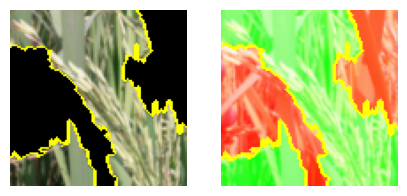

In [74]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (271).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 73ms/step
Accuracy of this prediction is 9.962503e-06


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 152ms/step


  1%|          | 10/1000 [00:00<00:19, 50.51it/s]

1/1 [==============================] - 0s 197ms/step


  2%|▏         | 20/1000 [00:00<00:22, 43.73it/s]

1/1 [==============================] - 0s 207ms/step


  3%|▎         | 30/1000 [00:00<00:24, 39.23it/s]

1/1 [==============================] - 0s 202ms/step


  4%|▍         | 40/1000 [00:01<00:25, 37.15it/s]

1/1 [==============================] - 0s 198ms/step


  5%|▌         | 50/1000 [00:01<00:25, 37.77it/s]

1/1 [==============================] - 0s 217ms/step


  6%|▌         | 60/1000 [00:01<00:25, 36.74it/s]

1/1 [==============================] - 0s 206ms/step


  7%|▋         | 70/1000 [00:01<00:25, 35.90it/s]

1/1 [==============================] - 0s 183ms/step


  8%|▊         | 80/1000 [00:02<00:24, 37.19it/s]

1/1 [==============================] - 0s 216ms/step


  9%|▉         | 90/1000 [00:02<00:24, 36.71it/s]

1/1 [==============================] - 0s 223ms/step


 10%|█         | 100/1000 [00:02<00:25, 35.87it/s]

1/1 [==============================] - 0s 207ms/step


 11%|█         | 110/1000 [00:02<00:25, 35.14it/s]

1/1 [==============================] - 0s 193ms/step


 12%|█▏        | 120/1000 [00:03<00:24, 35.96it/s]

1/1 [==============================] - 0s 151ms/step


 13%|█▎        | 130/1000 [00:03<00:22, 38.02it/s]

1/1 [==============================] - 0s 204ms/step


 14%|█▍        | 140/1000 [00:03<00:22, 38.43it/s]

1/1 [==============================] - 0s 206ms/step


 15%|█▌        | 150/1000 [00:03<00:22, 37.83it/s]

1/1 [==============================] - 0s 201ms/step


 16%|█▌        | 160/1000 [00:04<00:22, 37.90it/s]

1/1 [==============================] - 0s 205ms/step


 17%|█▋        | 170/1000 [00:04<00:22, 37.31it/s]

1/1 [==============================] - 0s 203ms/step


 18%|█▊        | 180/1000 [00:04<00:22, 36.83it/s]

1/1 [==============================] - 0s 203ms/step


 19%|█▉        | 190/1000 [00:05<00:21, 37.09it/s]

1/1 [==============================] - 0s 199ms/step


 20%|██        | 200/1000 [00:05<00:21, 36.58it/s]

1/1 [==============================] - 0s 215ms/step


 21%|██        | 210/1000 [00:05<00:21, 36.62it/s]

1/1 [==============================] - 0s 220ms/step


 22%|██▏       | 220/1000 [00:05<00:21, 35.47it/s]

1/1 [==============================] - 0s 225ms/step


 23%|██▎       | 230/1000 [00:06<00:22, 34.74it/s]

1/1 [==============================] - 0s 174ms/step


 24%|██▍       | 240/1000 [00:06<00:20, 36.28it/s]

1/1 [==============================] - 0s 219ms/step


 25%|██▌       | 250/1000 [00:06<00:21, 35.49it/s]

1/1 [==============================] - 0s 224ms/step


 26%|██▌       | 260/1000 [00:07<00:21, 34.92it/s]

1/1 [==============================] - 0s 215ms/step


 27%|██▋       | 270/1000 [00:07<00:20, 35.16it/s]

1/1 [==============================] - 0s 202ms/step


 28%|██▊       | 280/1000 [00:07<00:19, 36.17it/s]

1/1 [==============================] - 0s 200ms/step


 29%|██▉       | 290/1000 [00:07<00:19, 37.16it/s]

1/1 [==============================] - 0s 203ms/step


 30%|███       | 300/1000 [00:08<00:19, 36.69it/s]

1/1 [==============================] - 0s 207ms/step


 31%|███       | 310/1000 [00:08<00:19, 35.65it/s]

1/1 [==============================] - 0s 231ms/step


 32%|███▏      | 320/1000 [00:08<00:19, 34.49it/s]

1/1 [==============================] - 0s 214ms/step


 33%|███▎      | 330/1000 [00:09<00:19, 33.95it/s]

1/1 [==============================] - 0s 197ms/step


 34%|███▍      | 340/1000 [00:09<00:19, 34.53it/s]

1/1 [==============================] - 0s 214ms/step


 35%|███▌      | 350/1000 [00:09<00:19, 33.44it/s]

1/1 [==============================] - 0s 207ms/step


 36%|███▌      | 360/1000 [00:09<00:18, 33.93it/s]

1/1 [==============================] - 0s 213ms/step


 37%|███▋      | 370/1000 [00:10<00:18, 34.13it/s]

1/1 [==============================] - 0s 222ms/step


 38%|███▊      | 380/1000 [00:10<00:18, 34.15it/s]

1/1 [==============================] - 0s 246ms/step


 39%|███▉      | 390/1000 [00:10<00:18, 33.25it/s]

1/1 [==============================] - 0s 187ms/step


 40%|████      | 400/1000 [00:11<00:16, 35.42it/s]

1/1 [==============================] - 0s 197ms/step


 41%|████      | 410/1000 [00:11<00:16, 35.92it/s]

1/1 [==============================] - 0s 218ms/step


 42%|████▏     | 420/1000 [00:11<00:16, 35.45it/s]

1/1 [==============================] - 0s 201ms/step


 43%|████▎     | 430/1000 [00:11<00:16, 35.37it/s]

1/1 [==============================] - 0s 165ms/step


 44%|████▍     | 440/1000 [00:12<00:15, 36.75it/s]

1/1 [==============================] - 0s 189ms/step


 45%|████▌     | 450/1000 [00:12<00:14, 37.03it/s]

1/1 [==============================] - 0s 203ms/step


 46%|████▌     | 460/1000 [00:12<00:14, 37.65it/s]

1/1 [==============================] - 0s 191ms/step


 47%|████▋     | 470/1000 [00:12<00:14, 37.27it/s]

1/1 [==============================] - 0s 192ms/step


 48%|████▊     | 480/1000 [00:13<00:13, 37.20it/s]

1/1 [==============================] - 0s 199ms/step


 49%|████▉     | 490/1000 [00:13<00:13, 36.54it/s]

1/1 [==============================] - 0s 193ms/step


 50%|█████     | 500/1000 [00:13<00:13, 36.68it/s]

1/1 [==============================] - 0s 185ms/step


 51%|█████     | 510/1000 [00:14<00:13, 36.66it/s]

1/1 [==============================] - 0s 202ms/step


 52%|█████▏    | 520/1000 [00:14<00:12, 37.01it/s]

1/1 [==============================] - 0s 215ms/step


 53%|█████▎    | 530/1000 [00:14<00:13, 35.34it/s]

1/1 [==============================] - 0s 210ms/step


 54%|█████▍    | 540/1000 [00:14<00:13, 35.01it/s]

1/1 [==============================] - 0s 199ms/step


 55%|█████▌    | 550/1000 [00:15<00:12, 35.01it/s]

1/1 [==============================] - 0s 185ms/step


 56%|█████▌    | 560/1000 [00:15<00:12, 35.58it/s]

1/1 [==============================] - 0s 225ms/step


 57%|█████▋    | 570/1000 [00:15<00:12, 35.10it/s]

1/1 [==============================] - 0s 159ms/step


 58%|█████▊    | 580/1000 [00:16<00:11, 37.98it/s]

1/1 [==============================] - 0s 169ms/step


 59%|█████▉    | 590/1000 [00:16<00:10, 39.98it/s]

1/1 [==============================] - 0s 162ms/step


 60%|██████    | 600/1000 [00:16<00:09, 41.69it/s]

1/1 [==============================] - 0s 225ms/step


 61%|██████    | 610/1000 [00:16<00:10, 38.64it/s]

1/1 [==============================] - 0s 239ms/step


 62%|██████▏   | 620/1000 [00:17<00:10, 35.78it/s]

1/1 [==============================] - 0s 237ms/step


 63%|██████▎   | 630/1000 [00:17<00:10, 34.18it/s]

1/1 [==============================] - 0s 207ms/step


 64%|██████▍   | 640/1000 [00:17<00:10, 33.77it/s]

1/1 [==============================] - 0s 196ms/step


 65%|██████▌   | 650/1000 [00:17<00:10, 34.64it/s]

1/1 [==============================] - 0s 199ms/step


 66%|██████▌   | 660/1000 [00:18<00:09, 35.04it/s]

1/1 [==============================] - 0s 227ms/step


 67%|██████▋   | 670/1000 [00:18<00:09, 33.73it/s]

1/1 [==============================] - 0s 230ms/step


 68%|██████▊   | 680/1000 [00:18<00:09, 32.78it/s]

1/1 [==============================] - 0s 240ms/step


 69%|██████▉   | 690/1000 [00:19<00:09, 31.95it/s]

1/1 [==============================] - 0s 242ms/step


 70%|███████   | 700/1000 [00:19<00:09, 31.37it/s]

1/1 [==============================] - 0s 240ms/step


 71%|███████   | 710/1000 [00:19<00:09, 30.95it/s]

1/1 [==============================] - 0s 246ms/step


 72%|███████▏  | 720/1000 [00:20<00:09, 30.51it/s]

1/1 [==============================] - 0s 241ms/step


 73%|███████▎  | 730/1000 [00:20<00:08, 30.18it/s]

1/1 [==============================] - 0s 249ms/step


 74%|███████▍  | 740/1000 [00:20<00:08, 29.60it/s]

1/1 [==============================] - 0s 272ms/step


 75%|███████▌  | 750/1000 [00:21<00:08, 28.56it/s]

1/1 [==============================] - 0s 269ms/step


 76%|███████▌  | 760/1000 [00:21<00:08, 28.14it/s]

1/1 [==============================] - 0s 396ms/step


 77%|███████▋  | 770/1000 [00:22<00:09, 24.00it/s]

1/1 [==============================] - 0s 232ms/step


 78%|███████▊  | 780/1000 [00:22<00:08, 25.24it/s]

1/1 [==============================] - 0s 225ms/step


 79%|███████▉  | 790/1000 [00:22<00:07, 26.99it/s]

1/1 [==============================] - 0s 251ms/step


 80%|████████  | 800/1000 [00:23<00:07, 27.35it/s]

1/1 [==============================] - 0s 259ms/step


 81%|████████  | 810/1000 [00:23<00:06, 27.34it/s]

1/1 [==============================] - 0s 245ms/step


 82%|████████▏ | 820/1000 [00:23<00:06, 27.77it/s]

1/1 [==============================] - 0s 245ms/step


 83%|████████▎ | 830/1000 [00:24<00:06, 27.99it/s]

1/1 [==============================] - 0s 250ms/step


 84%|████████▍ | 840/1000 [00:24<00:05, 28.26it/s]

1/1 [==============================] - 0s 213ms/step


 85%|████████▌ | 850/1000 [00:24<00:05, 29.39it/s]

1/1 [==============================] - 0s 208ms/step


 86%|████████▌ | 860/1000 [00:25<00:04, 30.77it/s]

1/1 [==============================] - 0s 214ms/step


 87%|████████▋ | 870/1000 [00:25<00:04, 31.92it/s]

1/1 [==============================] - 0s 310ms/step


 88%|████████▊ | 880/1000 [00:25<00:04, 29.88it/s]

1/1 [==============================] - 0s 211ms/step


 89%|████████▉ | 890/1000 [00:26<00:03, 30.83it/s]

1/1 [==============================] - 0s 198ms/step


 90%|█████████ | 900/1000 [00:26<00:03, 32.42it/s]

1/1 [==============================] - 0s 183ms/step


 91%|█████████ | 910/1000 [00:26<00:02, 33.96it/s]

1/1 [==============================] - 0s 186ms/step


 92%|█████████▏| 920/1000 [00:27<00:02, 35.18it/s]

1/1 [==============================] - 0s 195ms/step


 93%|█████████▎| 930/1000 [00:27<00:01, 35.68it/s]

1/1 [==============================] - 0s 194ms/step


 94%|█████████▍| 940/1000 [00:27<00:01, 35.75it/s]

1/1 [==============================] - 0s 214ms/step


 95%|█████████▌| 950/1000 [00:27<00:01, 35.03it/s]

1/1 [==============================] - 0s 222ms/step


 96%|█████████▌| 960/1000 [00:28<00:01, 33.85it/s]

1/1 [==============================] - 0s 217ms/step


 97%|█████████▋| 970/1000 [00:28<00:00, 33.40it/s]

1/1 [==============================] - 0s 209ms/step


 98%|█████████▊| 980/1000 [00:28<00:00, 33.57it/s]

1/1 [==============================] - 0s 210ms/step


 99%|█████████▉| 990/1000 [00:29<00:00, 33.61it/s]

1/1 [==============================] - 0s 218ms/step


100%|██████████| 1000/1000 [00:29<00:00, 34.02it/s]


(-0.5, 99.5, 99.5, -0.5)

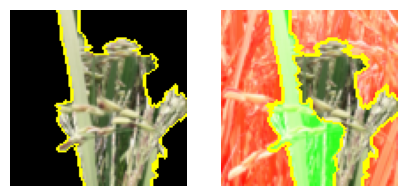

In [75]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (252).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 111ms/step
Accuracy of this prediction is 1.0087823e-05


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 213ms/step


  1%|          | 10/1000 [00:00<00:30, 32.67it/s]

1/1 [==============================] - 0s 250ms/step


  2%|▏         | 20/1000 [00:00<00:33, 29.10it/s]

1/1 [==============================] - 0s 276ms/step


  3%|▎         | 30/1000 [00:01<00:36, 26.37it/s]

1/1 [==============================] - 0s 264ms/step


  4%|▍         | 40/1000 [00:01<00:37, 25.38it/s]

1/1 [==============================] - 0s 264ms/step


  5%|▌         | 50/1000 [00:01<00:38, 24.69it/s]

1/1 [==============================] - 0s 273ms/step


  6%|▌         | 60/1000 [00:02<00:39, 24.01it/s]

1/1 [==============================] - 0s 262ms/step


  7%|▋         | 70/1000 [00:02<00:38, 23.97it/s]

1/1 [==============================] - 0s 242ms/step


  8%|▊         | 80/1000 [00:03<00:37, 24.64it/s]

1/1 [==============================] - 0s 266ms/step


  9%|▉         | 90/1000 [00:03<00:37, 24.44it/s]

1/1 [==============================] - 0s 250ms/step


 10%|█         | 100/1000 [00:03<00:36, 24.60it/s]

1/1 [==============================] - 0s 259ms/step


 11%|█         | 110/1000 [00:04<00:36, 24.65it/s]

1/1 [==============================] - 0s 250ms/step


 12%|█▏        | 120/1000 [00:04<00:35, 24.83it/s]

1/1 [==============================] - 0s 253ms/step


 13%|█▎        | 130/1000 [00:05<00:34, 25.13it/s]

1/1 [==============================] - 0s 260ms/step


 14%|█▍        | 140/1000 [00:05<00:34, 25.16it/s]

1/1 [==============================] - 0s 246ms/step


 15%|█▌        | 150/1000 [00:05<00:33, 25.06it/s]

1/1 [==============================] - 0s 250ms/step


 16%|█▌        | 160/1000 [00:06<00:33, 25.06it/s]

1/1 [==============================] - 0s 251ms/step


 17%|█▋        | 170/1000 [00:06<00:33, 25.03it/s]

1/1 [==============================] - 0s 258ms/step


 18%|█▊        | 180/1000 [00:07<00:32, 25.03it/s]

1/1 [==============================] - 0s 250ms/step


 19%|█▉        | 190/1000 [00:07<00:32, 25.01it/s]

1/1 [==============================] - 0s 258ms/step


 20%|██        | 200/1000 [00:07<00:32, 24.98it/s]

1/1 [==============================] - 0s 256ms/step


 21%|██        | 210/1000 [00:08<00:31, 24.91it/s]

1/1 [==============================] - 0s 265ms/step


 22%|██▏       | 220/1000 [00:08<00:31, 24.77it/s]

1/1 [==============================] - 0s 253ms/step


 23%|██▎       | 230/1000 [00:09<00:30, 24.86it/s]

1/1 [==============================] - 0s 256ms/step


 24%|██▍       | 240/1000 [00:09<00:30, 24.76it/s]

1/1 [==============================] - 0s 254ms/step


 25%|██▌       | 250/1000 [00:09<00:30, 24.94it/s]

1/1 [==============================] - 0s 260ms/step


 26%|██▌       | 260/1000 [00:10<00:29, 25.06it/s]

1/1 [==============================] - 0s 256ms/step


 27%|██▋       | 270/1000 [00:10<00:29, 25.11it/s]

1/1 [==============================] - 0s 244ms/step


 28%|██▊       | 280/1000 [00:11<00:28, 25.21it/s]

1/1 [==============================] - 0s 257ms/step


 29%|██▉       | 290/1000 [00:11<00:29, 24.38it/s]

1/1 [==============================] - 0s 254ms/step


 30%|███       | 300/1000 [00:12<00:28, 24.74it/s]

1/1 [==============================] - 0s 257ms/step


 31%|███       | 310/1000 [00:12<00:27, 24.74it/s]

1/1 [==============================] - 0s 248ms/step


 32%|███▏      | 320/1000 [00:12<00:27, 25.09it/s]

1/1 [==============================] - 0s 244ms/step


 33%|███▎      | 330/1000 [00:13<00:26, 24.92it/s]

1/1 [==============================] - 0s 265ms/step


 34%|███▍      | 340/1000 [00:13<00:26, 24.50it/s]

1/1 [==============================] - 0s 281ms/step


 35%|███▌      | 350/1000 [00:14<00:26, 24.34it/s]

1/1 [==============================] - 0s 268ms/step


 36%|███▌      | 360/1000 [00:14<00:26, 24.09it/s]

1/1 [==============================] - 0s 260ms/step


 37%|███▋      | 370/1000 [00:14<00:25, 24.28it/s]

1/1 [==============================] - 0s 270ms/step


 38%|███▊      | 380/1000 [00:15<00:25, 24.05it/s]

1/1 [==============================] - 0s 254ms/step


 39%|███▉      | 390/1000 [00:15<00:24, 24.49it/s]

1/1 [==============================] - 0s 249ms/step


 40%|████      | 400/1000 [00:16<00:24, 24.78it/s]

1/1 [==============================] - 0s 268ms/step


 41%|████      | 410/1000 [00:16<00:23, 24.62it/s]

1/1 [==============================] - 0s 297ms/step


 42%|████▏     | 420/1000 [00:17<00:25, 22.90it/s]

1/1 [==============================] - 0s 274ms/step


 43%|████▎     | 430/1000 [00:17<00:25, 22.76it/s]

1/1 [==============================] - 0s 254ms/step


 44%|████▍     | 440/1000 [00:17<00:24, 23.22it/s]

1/1 [==============================] - 0s 243ms/step


 45%|████▌     | 450/1000 [00:18<00:23, 23.76it/s]

1/1 [==============================] - 0s 252ms/step


 46%|████▌     | 460/1000 [00:18<00:22, 24.11it/s]

1/1 [==============================] - 0s 256ms/step


 47%|████▋     | 470/1000 [00:19<00:21, 24.32it/s]

1/1 [==============================] - 0s 257ms/step


 48%|████▊     | 480/1000 [00:19<00:21, 24.39it/s]

1/1 [==============================] - 0s 246ms/step


 49%|████▉     | 490/1000 [00:19<00:20, 24.91it/s]

1/1 [==============================] - 0s 239ms/step


 50%|█████     | 500/1000 [00:20<00:19, 25.23it/s]

1/1 [==============================] - 0s 254ms/step


 51%|█████     | 510/1000 [00:20<00:19, 24.93it/s]

1/1 [==============================] - 0s 254ms/step


 52%|█████▏    | 520/1000 [00:21<00:19, 25.09it/s]

1/1 [==============================] - 0s 278ms/step


 53%|█████▎    | 530/1000 [00:21<00:19, 24.28it/s]

1/1 [==============================] - 0s 258ms/step


 54%|█████▍    | 540/1000 [00:21<00:18, 24.65it/s]

1/1 [==============================] - 0s 270ms/step


 55%|█████▌    | 550/1000 [00:22<00:18, 24.39it/s]

1/1 [==============================] - 0s 242ms/step


 56%|█████▌    | 560/1000 [00:22<00:17, 24.72it/s]

1/1 [==============================] - 0s 228ms/step


 57%|█████▋    | 570/1000 [00:23<00:17, 25.07it/s]

1/1 [==============================] - 0s 258ms/step


 58%|█████▊    | 580/1000 [00:23<00:16, 25.12it/s]

1/1 [==============================] - 0s 257ms/step


 59%|█████▉    | 590/1000 [00:23<00:16, 24.98it/s]

1/1 [==============================] - 0s 260ms/step


 60%|██████    | 600/1000 [00:24<00:16, 24.70it/s]

1/1 [==============================] - 0s 243ms/step


 61%|██████    | 610/1000 [00:24<00:15, 25.03it/s]

1/1 [==============================] - 0s 251ms/step


 62%|██████▏   | 620/1000 [00:25<00:15, 25.06it/s]

1/1 [==============================] - 0s 244ms/step


 63%|██████▎   | 630/1000 [00:25<00:14, 25.01it/s]

1/1 [==============================] - 0s 249ms/step


 64%|██████▍   | 640/1000 [00:25<00:14, 25.10it/s]

1/1 [==============================] - 0s 243ms/step


 65%|██████▌   | 650/1000 [00:26<00:13, 25.50it/s]

1/1 [==============================] - 0s 250ms/step


 66%|██████▌   | 660/1000 [00:26<00:13, 25.19it/s]

1/1 [==============================] - 0s 253ms/step


 67%|██████▋   | 670/1000 [00:27<00:13, 25.19it/s]

1/1 [==============================] - 0s 262ms/step


 68%|██████▊   | 680/1000 [00:27<00:12, 25.23it/s]

1/1 [==============================] - 0s 249ms/step


 69%|██████▉   | 690/1000 [00:27<00:12, 25.08it/s]

1/1 [==============================] - 0s 249ms/step


 70%|███████   | 700/1000 [00:28<00:11, 25.05it/s]

1/1 [==============================] - 0s 246ms/step


 71%|███████   | 710/1000 [00:28<00:11, 24.99it/s]

1/1 [==============================] - 0s 256ms/step


 72%|███████▏  | 720/1000 [00:29<00:11, 25.17it/s]

1/1 [==============================] - 0s 268ms/step


 73%|███████▎  | 730/1000 [00:29<00:10, 25.00it/s]

1/1 [==============================] - 0s 251ms/step


 74%|███████▍  | 740/1000 [00:29<00:10, 24.47it/s]

1/1 [==============================] - 0s 336ms/step


 75%|███████▌  | 750/1000 [00:30<00:11, 22.01it/s]

1/1 [==============================] - 0s 288ms/step


 76%|███████▌  | 760/1000 [00:30<00:10, 22.02it/s]

1/1 [==============================] - 0s 260ms/step


 77%|███████▋  | 770/1000 [00:31<00:10, 22.26it/s]

1/1 [==============================] - 0s 253ms/step


 78%|███████▊  | 780/1000 [00:31<00:09, 22.83it/s]

1/1 [==============================] - 0s 244ms/step


 79%|███████▉  | 790/1000 [00:32<00:08, 23.56it/s]

1/1 [==============================] - 0s 246ms/step


 80%|████████  | 800/1000 [00:32<00:08, 24.28it/s]

1/1 [==============================] - 0s 254ms/step


 81%|████████  | 810/1000 [00:32<00:07, 24.61it/s]

1/1 [==============================] - 0s 260ms/step


 82%|████████▏ | 820/1000 [00:33<00:07, 24.63it/s]

1/1 [==============================] - 0s 248ms/step


 83%|████████▎ | 830/1000 [00:33<00:06, 25.01it/s]

1/1 [==============================] - 0s 259ms/step


 84%|████████▍ | 840/1000 [00:34<00:06, 24.96it/s]

1/1 [==============================] - 0s 254ms/step


 85%|████████▌ | 850/1000 [00:34<00:06, 24.89it/s]

1/1 [==============================] - 0s 249ms/step


 86%|████████▌ | 860/1000 [00:34<00:05, 25.08it/s]

1/1 [==============================] - 0s 240ms/step


 87%|████████▋ | 870/1000 [00:35<00:05, 25.16it/s]

1/1 [==============================] - 0s 263ms/step


 88%|████████▊ | 880/1000 [00:35<00:04, 24.92it/s]

1/1 [==============================] - 0s 246ms/step


 89%|████████▉ | 890/1000 [00:36<00:04, 25.27it/s]

1/1 [==============================] - 0s 261ms/step


 90%|█████████ | 900/1000 [00:36<00:04, 24.99it/s]

1/1 [==============================] - 0s 258ms/step


 91%|█████████ | 910/1000 [00:36<00:03, 24.50it/s]

1/1 [==============================] - 0s 286ms/step


 92%|█████████▏| 920/1000 [00:37<00:03, 24.22it/s]

1/1 [==============================] - 0s 251ms/step


 93%|█████████▎| 930/1000 [00:37<00:02, 24.33it/s]

1/1 [==============================] - 0s 256ms/step


 94%|█████████▍| 940/1000 [00:38<00:02, 24.56it/s]

1/1 [==============================] - 0s 290ms/step


 95%|█████████▌| 950/1000 [00:38<00:02, 23.88it/s]

1/1 [==============================] - 0s 300ms/step


 96%|█████████▌| 960/1000 [00:39<00:01, 22.83it/s]

1/1 [==============================] - 0s 284ms/step


 97%|█████████▋| 970/1000 [00:39<00:01, 22.62it/s]

1/1 [==============================] - 0s 297ms/step


 98%|█████████▊| 980/1000 [00:39<00:00, 22.42it/s]

1/1 [==============================] - 0s 293ms/step


 99%|█████████▉| 990/1000 [00:40<00:00, 22.08it/s]

1/1 [==============================] - 0s 266ms/step


100%|██████████| 1000/1000 [00:40<00:00, 24.46it/s]


(-0.5, 99.5, 99.5, -0.5)

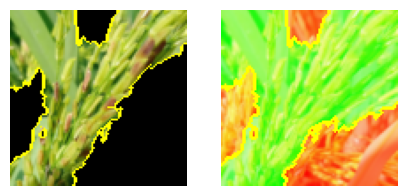

In [76]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (393).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')


1/1 [==============================] - 0s 105ms/step
Accuracy of this prediction is 9.859744e-06


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 185ms/step


  1%|          | 10/1000 [00:00<00:26, 37.27it/s]

1/1 [==============================] - 0s 215ms/step


  2%|▏         | 20/1000 [00:00<00:28, 34.14it/s]

1/1 [==============================] - 0s 217ms/step


  3%|▎         | 30/1000 [00:00<00:29, 32.81it/s]

1/1 [==============================] - 0s 209ms/step


  4%|▍         | 40/1000 [00:01<00:29, 32.15it/s]

1/1 [==============================] - 0s 234ms/step


  5%|▌         | 50/1000 [00:01<00:31, 30.23it/s]

1/1 [==============================] - 0s 239ms/step


  6%|▌         | 60/1000 [00:01<00:32, 28.93it/s]

1/1 [==============================] - 0s 258ms/step


  7%|▋         | 70/1000 [00:02<00:33, 27.55it/s]

1/1 [==============================] - 0s 257ms/step


  8%|▊         | 80/1000 [00:02<00:34, 26.67it/s]

1/1 [==============================] - 0s 257ms/step


  9%|▉         | 90/1000 [00:03<00:35, 25.83it/s]

1/1 [==============================] - 0s 266ms/step


 10%|█         | 100/1000 [00:03<00:35, 25.25it/s]

1/1 [==============================] - 0s 263ms/step


 11%|█         | 110/1000 [00:03<00:35, 25.07it/s]

1/1 [==============================] - 0s 265ms/step


 12%|█▏        | 120/1000 [00:04<00:35, 24.78it/s]

1/1 [==============================] - 0s 259ms/step


 13%|█▎        | 130/1000 [00:04<00:35, 24.84it/s]

1/1 [==============================] - 0s 257ms/step


 14%|█▍        | 140/1000 [00:05<00:34, 24.76it/s]

1/1 [==============================] - 0s 260ms/step


 15%|█▌        | 150/1000 [00:05<00:34, 24.78it/s]

1/1 [==============================] - 0s 272ms/step


 16%|█▌        | 160/1000 [00:06<00:33, 24.72it/s]

1/1 [==============================] - 0s 273ms/step


 17%|█▋        | 170/1000 [00:06<00:34, 24.34it/s]

1/1 [==============================] - 0s 262ms/step


 18%|█▊        | 180/1000 [00:06<00:34, 23.99it/s]

1/1 [==============================] - 0s 265ms/step


 19%|█▉        | 190/1000 [00:07<00:33, 24.08it/s]

1/1 [==============================] - 0s 261ms/step


 20%|██        | 200/1000 [00:07<00:32, 24.27it/s]

1/1 [==============================] - 0s 266ms/step


 21%|██        | 210/1000 [00:08<00:32, 24.38it/s]

1/1 [==============================] - 0s 267ms/step


 22%|██▏       | 220/1000 [00:08<00:32, 24.31it/s]

1/1 [==============================] - 0s 260ms/step


 23%|██▎       | 230/1000 [00:08<00:31, 24.69it/s]

1/1 [==============================] - 0s 257ms/step


 24%|██▍       | 240/1000 [00:09<00:30, 24.57it/s]

1/1 [==============================] - 0s 272ms/step


 25%|██▌       | 250/1000 [00:09<00:30, 24.33it/s]

1/1 [==============================] - 0s 280ms/step


 26%|██▌       | 260/1000 [00:10<00:31, 23.53it/s]

1/1 [==============================] - 0s 262ms/step


 27%|██▋       | 270/1000 [00:10<00:31, 23.35it/s]

1/1 [==============================] - 0s 261ms/step


 28%|██▊       | 280/1000 [00:11<00:30, 23.73it/s]

1/1 [==============================] - 0s 262ms/step


 29%|██▉       | 290/1000 [00:11<00:29, 23.95it/s]

1/1 [==============================] - 0s 254ms/step


 30%|███       | 300/1000 [00:11<00:28, 24.25it/s]

1/1 [==============================] - 0s 248ms/step


 31%|███       | 310/1000 [00:12<00:28, 24.56it/s]

1/1 [==============================] - 0s 260ms/step


 32%|███▏      | 320/1000 [00:12<00:27, 24.41it/s]

1/1 [==============================] - 0s 262ms/step


 33%|███▎      | 330/1000 [00:13<00:27, 24.26it/s]

1/1 [==============================] - 0s 269ms/step


 34%|███▍      | 340/1000 [00:13<00:27, 24.14it/s]

1/1 [==============================] - 0s 256ms/step


 35%|███▌      | 350/1000 [00:13<00:26, 24.46it/s]

1/1 [==============================] - 0s 246ms/step


 36%|███▌      | 360/1000 [00:14<00:25, 24.65it/s]

1/1 [==============================] - 0s 260ms/step


 37%|███▋      | 370/1000 [00:14<00:25, 24.58it/s]

1/1 [==============================] - 0s 265ms/step


 38%|███▊      | 380/1000 [00:15<00:25, 24.45it/s]

1/1 [==============================] - 0s 270ms/step


 39%|███▉      | 390/1000 [00:15<00:25, 23.82it/s]

1/1 [==============================] - 0s 258ms/step


 40%|████      | 400/1000 [00:15<00:25, 23.90it/s]

1/1 [==============================] - 0s 246ms/step


 41%|████      | 410/1000 [00:16<00:24, 24.22it/s]

1/1 [==============================] - 0s 259ms/step


 42%|████▏     | 420/1000 [00:16<00:24, 24.12it/s]

1/1 [==============================] - 0s 318ms/step


 43%|████▎     | 430/1000 [00:17<00:25, 21.97it/s]

1/1 [==============================] - 0s 260ms/step


 44%|████▍     | 440/1000 [00:17<00:25, 22.25it/s]

1/1 [==============================] - 0s 264ms/step


 45%|████▌     | 450/1000 [00:18<00:24, 22.67it/s]

1/1 [==============================] - 0s 264ms/step


 46%|████▌     | 460/1000 [00:18<00:23, 22.97it/s]

1/1 [==============================] - 0s 259ms/step


 47%|████▋     | 470/1000 [00:19<00:22, 23.49it/s]

1/1 [==============================] - 0s 253ms/step


 48%|████▊     | 480/1000 [00:19<00:21, 23.94it/s]

1/1 [==============================] - 0s 257ms/step


 49%|████▉     | 490/1000 [00:19<00:21, 24.27it/s]

1/1 [==============================] - 0s 240ms/step


 50%|█████     | 500/1000 [00:20<00:20, 24.76it/s]

1/1 [==============================] - 0s 268ms/step


 51%|█████     | 510/1000 [00:20<00:19, 24.52it/s]

1/1 [==============================] - 0s 259ms/step


 52%|█████▏    | 520/1000 [00:21<00:19, 24.55it/s]

1/1 [==============================] - 0s 267ms/step


 53%|█████▎    | 530/1000 [00:21<00:19, 24.50it/s]

1/1 [==============================] - 0s 251ms/step


 54%|█████▍    | 540/1000 [00:21<00:18, 24.35it/s]

1/1 [==============================] - 0s 252ms/step


 55%|█████▌    | 550/1000 [00:22<00:18, 24.44it/s]

1/1 [==============================] - 0s 261ms/step


 56%|█████▌    | 560/1000 [00:22<00:17, 24.48it/s]

1/1 [==============================] - 0s 265ms/step


 57%|█████▋    | 570/1000 [00:23<00:17, 24.39it/s]

1/1 [==============================] - 0s 262ms/step


 58%|█████▊    | 580/1000 [00:23<00:17, 24.44it/s]

1/1 [==============================] - 0s 258ms/step


 59%|█████▉    | 590/1000 [00:23<00:16, 24.62it/s]

1/1 [==============================] - 0s 255ms/step


 60%|██████    | 600/1000 [00:24<00:16, 24.72it/s]

1/1 [==============================] - 0s 261ms/step


 61%|██████    | 610/1000 [00:24<00:15, 24.44it/s]

1/1 [==============================] - 0s 264ms/step


 62%|██████▏   | 620/1000 [00:25<00:15, 24.37it/s]

1/1 [==============================] - 0s 264ms/step


 63%|██████▎   | 630/1000 [00:25<00:15, 23.65it/s]

1/1 [==============================] - 0s 259ms/step


 64%|██████▍   | 640/1000 [00:25<00:15, 23.91it/s]

1/1 [==============================] - 0s 263ms/step


 65%|██████▌   | 650/1000 [00:26<00:14, 23.92it/s]

1/1 [==============================] - 0s 256ms/step


 66%|██████▌   | 660/1000 [00:26<00:14, 24.17it/s]

1/1 [==============================] - 0s 255ms/step


 67%|██████▋   | 670/1000 [00:27<00:13, 24.13it/s]

1/1 [==============================] - 0s 263ms/step


 68%|██████▊   | 680/1000 [00:27<00:13, 24.40it/s]

1/1 [==============================] - 0s 259ms/step


 69%|██████▉   | 690/1000 [00:28<00:12, 24.51it/s]

1/1 [==============================] - 0s 272ms/step


 70%|███████   | 700/1000 [00:28<00:12, 24.41it/s]

1/1 [==============================] - 0s 270ms/step


 71%|███████   | 710/1000 [00:28<00:11, 24.27it/s]

1/1 [==============================] - 0s 259ms/step


 72%|███████▏  | 720/1000 [00:29<00:11, 24.16it/s]

1/1 [==============================] - 0s 258ms/step


 73%|███████▎  | 730/1000 [00:29<00:11, 24.40it/s]

1/1 [==============================] - 0s 259ms/step


 74%|███████▍  | 740/1000 [00:30<00:10, 24.47it/s]

1/1 [==============================] - 0s 250ms/step


 75%|███████▌  | 750/1000 [00:30<00:10, 24.96it/s]

1/1 [==============================] - 0s 325ms/step


 76%|███████▌  | 760/1000 [00:31<00:10, 22.48it/s]

1/1 [==============================] - 0s 282ms/step


 77%|███████▋  | 770/1000 [00:31<00:10, 22.05it/s]

1/1 [==============================] - 0s 267ms/step


 78%|███████▊  | 780/1000 [00:31<00:09, 22.38it/s]

1/1 [==============================] - 0s 262ms/step


 79%|███████▉  | 790/1000 [00:32<00:09, 22.82it/s]

1/1 [==============================] - 0s 294ms/step


 80%|████████  | 800/1000 [00:32<00:08, 22.75it/s]

1/1 [==============================] - 0s 257ms/step


 81%|████████  | 810/1000 [00:33<00:08, 22.88it/s]

1/1 [==============================] - 0s 262ms/step


 82%|████████▏ | 820/1000 [00:33<00:07, 23.28it/s]

1/1 [==============================] - 0s 266ms/step


 83%|████████▎ | 830/1000 [00:34<00:07, 23.44it/s]

1/1 [==============================] - 0s 281ms/step


 84%|████████▍ | 840/1000 [00:34<00:06, 23.35it/s]

1/1 [==============================] - 0s 260ms/step


 85%|████████▌ | 850/1000 [00:34<00:06, 23.78it/s]

1/1 [==============================] - 0s 260ms/step


 86%|████████▌ | 860/1000 [00:35<00:05, 23.83it/s]

1/1 [==============================] - 0s 265ms/step


 87%|████████▋ | 870/1000 [00:35<00:05, 23.81it/s]

1/1 [==============================] - 0s 262ms/step


 88%|████████▊ | 880/1000 [00:36<00:04, 24.16it/s]

1/1 [==============================] - 0s 270ms/step


 89%|████████▉ | 890/1000 [00:36<00:04, 23.94it/s]

1/1 [==============================] - 0s 252ms/step


 90%|█████████ | 900/1000 [00:36<00:04, 23.98it/s]

1/1 [==============================] - 0s 276ms/step


 91%|█████████ | 910/1000 [00:37<00:03, 23.77it/s]

1/1 [==============================] - 0s 262ms/step


 92%|█████████▏| 920/1000 [00:37<00:03, 23.80it/s]

1/1 [==============================] - 0s 266ms/step


 93%|█████████▎| 930/1000 [00:38<00:02, 23.57it/s]

1/1 [==============================] - 0s 257ms/step


 94%|█████████▍| 940/1000 [00:38<00:02, 23.66it/s]

1/1 [==============================] - 0s 254ms/step


 95%|█████████▌| 950/1000 [00:39<00:02, 24.02it/s]

1/1 [==============================] - 0s 269ms/step


 96%|█████████▌| 960/1000 [00:39<00:01, 24.28it/s]

1/1 [==============================] - 0s 259ms/step


 97%|█████████▋| 970/1000 [00:39<00:01, 24.16it/s]

1/1 [==============================] - 0s 256ms/step


 98%|█████████▊| 980/1000 [00:40<00:00, 24.45it/s]

1/1 [==============================] - 0s 270ms/step


 99%|█████████▉| 990/1000 [00:40<00:00, 24.03it/s]

1/1 [==============================] - 0s 249ms/step


100%|██████████| 1000/1000 [00:41<00:00, 24.34it/s]


(-0.5, 99.5, 99.5, -0.5)

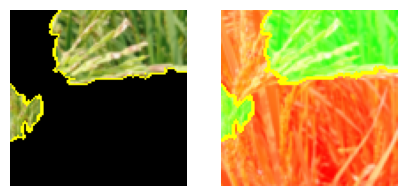

In [77]:
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.preprocessing import image
import numpy as np

def read_and_transform_img(url):
    try:
        img = imread(url)
    except FileNotFoundError:
        print("File not found at the specified location.")
        return None
    
    img = resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

url = r'D:/sem7/project/Rice_Seed_Dataset/Unhealthy_Images/unhealthy (428).jpg'
images = read_and_transform_img(url)

if images is not None:
    preds = resnet_example_model.predict(images)
    prediction = np.argmax(preds)
    pct = np.max(preds)
    print("Accuracy of this prediction is", pct)
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

     

explanation = explainer.explain_instance(images[0].astype('double'), resnet_example_model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)
from skimage.segmentation import mark_boundaries
temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')

ax2.axis('off')
